# Modules externes

In [1]:
import pandas as pd
#import modin.pandas as pd
import numpy as np
import seaborn as sns
import ma_boite_a_outils as outils
import importlib
from importlib.metadata import version
import matplotlib.pyplot as plt
from IPython.display import display_html

# Version

In [2]:
importlib.reload(outils)
print("Module %s version: %s" % (pd.__name__ , pd.__version__))
print("Module %s version: %s" % (np.__name__ , np.__version__))
print("Module %s version: %s" % (sns.__name__ , sns.__version__))
print("Module %s version: %s" % (outils.__name__ , outils.__version__))
print("Module %s version: %s" % (importlib.__name__ , version('wheel')))

Module pandas version: 1.4.4
Module numpy version: 1.21.5
Module seaborn version: 0.11.2
Module ma_boite_a_outils version: 1.49
Module importlib version: 0.37.1


# Pandas displays option

In [3]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_column', 200)
pd.set_option('display.width', 150)
pd.set_option('display.precision', 5)
pd.set_option('display.max_colwidth',150)

           

# Création du dataframe

In [4]:
fichier_csv = 'en.openfoodfacts.org.products_2022.csv'

liste_colonnes_mixed_type = ['code',
                             'abbreviated_product_name',
                             'packaging_text',
                             'origins',
                             'origins_tags',
                             'origins_en',
                             'emb_codes',
                             'emb_codes_tags',
                             'first_packaging_code_geo',
                             'cities_tags',
                             'allergens',
                             'traces',
                             'traces_tags',
                             'traces_en',
                             'brand_owner',
                             'owner']


dict_convert_types = {i:'string' for i in liste_colonnes_mixed_type}

df_raw = pd.read_csv(fichier_csv, sep='\t', dtype = dict_convert_types)

In [5]:
historique_modification_dataframe = []
outils.numero_version = 0
outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'dataframe initial')

Le dataframe contient 2610883 lignes et 196 colonnes et utilise 16.1000 GB de mémoire


[{'version': 1,
  'changement': 'dataframe initial',
  'variables': 196,
  'lignes': 2610883,
  'Mémoire': 16.1}]

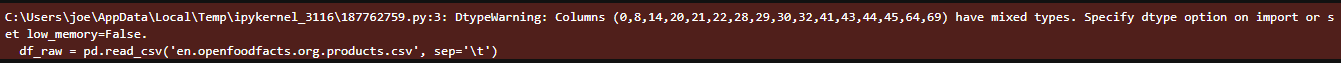
Il y a un problème de type sur certaines colonnes. On va manuellement vérifier et corriger les types des colonnes concernées

https://medium.com/@dataproducts/pandas-detect-mixed-data-types-and-fix-it-7f0bd3b8d071

In [6]:
#On convertit de float 64 à float 32 pour réduire l'allocation mémoire
df_raw[df_raw.select_dtypes(np.float64).columns] = df_raw.select_dtypes(np.float64).astype(np.float32)

In [7]:
outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'conversion des float64 en float32')

Le dataframe contient 2610883 lignes et 196 colonnes et utilise 14.8000 GB de mémoire


[{'version': 1,
  'changement': 'dataframe initial',
  'variables': 196,
  'lignes': 2610883,
  'Mémoire': 16.1},
 {'version': 2,
  'changement': 'conversion des float64 en float32',
  'variables': 196,
  'lignes': 2610883,
  'Mémoire': 14.8}]

## Statistique du dataframe initial

In [8]:
df_raw.describe()

created_t  last_modified_t  cities  allergens_en                       serving_quantity  no_nutriments  additives_n  additives  \
count    2610883.00       2610883.00    0.00          0.00                              563374.00           0.00    796292.00       0.00   
mean  1581880363.02    1621767304.08     NaN           NaN       21697073366005002502263537664.00            NaN         2.00        NaN   
std     60619151.12      37755836.01     NaN           NaN                                    inf            NaN         2.87        NaN   
min   1328021038.00    1353581570.00     NaN           NaN                                   0.00            NaN         0.00        NaN   
25%   1539017289.00    1587670011.50     NaN           NaN                                  28.00            NaN         0.00        NaN   
50%   1587666633.00    1631376151.00     NaN           NaN                                  56.00            NaN         1.00        NaN   
75%   1632125860.00    1652528169.50     NaN           NaN                                 116.00            NaN         3.00        NaN   
max   1667703136.00    1667703141.00     NaN           NaN 12223567262768519794606665583558656.00            NaN        49.00        NaN   

       nutriscore_score  nova_group  ecoscore_score       product_quantity  unique_scans_n  completeness  last_image_t  energy-kj_100g  \
count         827953.00   718654.00       556993.00              628589.00       749976.00    2610882.00    2207989.00       185695.00   
mean               9.06        3.37           43.96      18629156405248.00            3.85          0.42 1601019648.00       439274.28   
std                8.81        1.00           25.67   11483905030881280.00           15.94          0.20   49752016.00    188779712.00   
min              -15.00        1.00          -30.00                   0.00            1.00          0.05 1328986752.00            0.00   
25%                1.00        3.00           27.00                 150.00            1.00          0.28 1572459904.00          389.00   
50%               10.00        4.00           39.00                 283.50            1.00          0.38 1616152704.00          980.00   
75%               16.00        4.00           65.00                 500.00            2.00          0.50 1644073344.00         1618.00   
max               40.00        4.00          125.00 9000000202358128640.00         2544.00          1.10 1667703168.00  81349607424.00   

        energy-kcal_100g        energy_100g  energy-from-fat_100g           fat_100g  saturated-fat_100g  -butyric-acid_100g  -caproic-acid_100g  \
count         2025936.00         2073460.00                991.00         2060829.00          2018648.00                0.00                0.00   
mean         53693656.00       219380256.00                319.01        53417668.00            40306.39                 NaN                 NaN   
std       70521634816.00    291661348864.00                481.61     76625240064.00         57256548.00                 NaN                 NaN   
min               -53.00            -221.00                  0.00              -5.00                0.00                 NaN                 NaN   
25%               100.00             418.00                 42.00               0.78                0.10                 NaN                 NaN   
50%               257.00            1071.00                167.00               7.00                1.76                 NaN                 NaN   
75%               400.00            1674.00                380.00              21.00                7.00                 NaN                 NaN   
max   100000000376832.00 418400010502144.00               3740.00 110000001253376.00      81349607424.00                 NaN                 NaN   

       -caprylic-acid_100g  -capric-acid_100g  -lauric-acid_100g  -myristic-acid_100g  -palmitic-acid_100g  -stearic-acid_100g  \
count                 0.00               0.

In [9]:
outils.count_missing_values(df_raw, True, False)

There is 400825487 missing (NaN) values over 511733068 values, ie 78.33%
----------------------------------------------------------------------------------
Données manquantes par critères


## Suppression des colonnes vides

In [10]:
# Suppresion des colonnes vides
# On elimine les colonnes avec 99% de données manquantes pour palier au problème d'arrondi
df_raw.dropna(axis=1,how = 'all', inplace = True)

In [11]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des lignes vides')

Le dataframe contient 2610883 lignes et 159 colonnes et utilise 14.5000 GB de mémoire


# Analyse des colonnes redondantes

In [12]:
# On recherche les noms de colonnes contenant le mot 'tag'
df_raw_nom_colonnes = list(df_raw.keys())
mot_a_trouver = 'tag'
nom_colonne_contenant_tag = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)

In [13]:
#On va effectuer la recherche des noms de colonnes qui contiennent les mots associés à ceux contenant 'tag'
dictionnaire_correspondance = {}
for nom in nom_colonne_contenant_tag:
    print('Recherche des colonnes contenant le mot: %s' % nom[:-5])
    dictionnaire_correspondance[nom[:-5]] =outils.recherche_mot_liste(nom[:-5],df_raw_nom_colonnes)

Recherche des colonnes contenant le mot: packaging
Recherche des colonnes contenant le mot: brands
Recherche des colonnes contenant le mot: categories
Recherche des colonnes contenant le mot: origins
Recherche des colonnes contenant le mot: manufacturing_places
Recherche des colonnes contenant le mot: labels
Recherche des colonnes contenant le mot: emb_codes
Recherche des colonnes contenant le mot: cities
Recherche des colonnes contenant le mot: countries
Recherche des colonnes contenant le mot: ingredients
Recherche des colonnes contenant le mot: ingredients_analysis
Recherche des colonnes contenant le mot: traces
Recherche des colonnes contenant le mot: additives
Recherche des colonnes contenant le mot: food_groups
Recherche des colonnes contenant le mot: states
Recherche des colonnes contenant le mot: nutrient_levels
Recherche des colonnes contenant le mot: data_quality_errors
Recherche des colonnes contenant le mot: popularity


In [14]:
colonnes_a_suprrimer = []

## Comparaison des colonnes countries

In [15]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'countries')

countries    countries_tags   countries_en
0         en:france         en:france         France
1             en:de        en:germany        Germany
2             Spain          en:spain          Spain
3            France         en:france         France
4            France         en:france         France
5            France         en:france         France
6           Espagne          en:spain          Spain
7             en:es          en:spain          Spain
8             en:es          en:spain          Spain
9  en:United States  en:united-states  United States

There is 21532 missing (NaN) values over 7832649 values, ie 0.27%
----------------------------------------------------------------------------------
Données manquantes par critères


- Les colonnes countries, countries_tages et countries_en contiennent les mêmes info sous des langues et formats diffents.
- La colonne countries a moins de données.

**Conclusion**: On conserve la colonne **countries_en** 

In [16]:
colonnes_a_suprrimer.append('countries_tags')
colonnes_a_suprrimer.append('countries')

## Comparaison des colonnes Packaging

In [17]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'packaging')

packaging           packaging_tags       packaging_en packaging_text first_packaging_code_geo
29   Plastique, Barquette       en:plastic,en:tray       Plastic,Tray           <NA>                     <NA>
70                  Verre                 en:glass              Glass           <NA>                     <NA>
86         Boîte en métal        fr:boite-en-metal  fr:boite-en-metal           <NA>                     <NA>
176      Plastique, Bocal        en:plastic,en:jar        Plastic,Jar           <NA>                     <NA>
183             Plastique               en:plastic            Plastic           <NA>                     <NA>
186          fr:Bouteille                en:bottle             Bottle           <NA>                     <NA>
354     Plastique, Carton  en:plastic,en:cardboard  Plastic,Cardboard           <NA>                     <NA>
355     Plastique, Carton  en:plastic,en:cardboard  Plastic,Cardboard           <NA>                     <NA>
357                 Frais                 en:fresh              Fresh           <NA>                     <NA>
373                 Frais                 en:fresh              Fresh           <NA>                     <NA>

There is 11871962 missing (NaN) values over 13054415 values, ie 90.94%
----------------------------------------------------------------------------------
Données manquantes par critères


Les colonnes packaging, packaging_tas, packaging_en contiennent les mêmes informations sous des langues et formes différentes

La colonne packaging a moins de données.

**Conclusion**: On conserve la colonne **packaging_en** 

In [18]:
colonnes_a_suprrimer.append('packaging')
colonnes_a_suprrimer.append('packaging_tags')
colonnes_a_suprrimer.append('packaging_text')

## Comparaison des colonnes brands

In [19]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'brands')

brands              brands_tags
0                   endives                  endives
3                    Danone                   danone
10            courte paille            courte-paille
26           Jeff de Bruges           jeff-de-bruges
28                    CROUS                    crous
29       Crous Resto',Crous        crous-resto,crous
36  Ferme De La Frémondière  ferme-de-la-fremondiere
40                    Crous                    crous
45              Crous resto              crous-resto
51          Ferme t'y R'nao          ferme-t-y-r-nao

There is 2666720 missing (NaN) values over 5221766 values, ie 51.07%
----------------------------------------------------------------------------------
Données manquantes par critères


**Conclusion**: On conserve la colonne **brands_tags** 

In [20]:
colonnes_a_suprrimer.append('brands')

## Comparaison des colonnes categories

In [21]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'categories')

categories  \
3                             Produits laitiers,Desserts,Produits fermentés,Produits laitiers fermentés,Fromages,Desserts lactés,Fromages à la crème,Skyr   
10                                                                                                                Epicerie, Condiments, Sauces, Moutardes   
18                                                                                                                               en:squeezed-apple-juices   
19                                                                                                                                         Pâtes d'amande   
20                                                                        Plats préparés, Légumes préparés, Carottes râpées, Carottes râpées assaisonnées   
29                                                                                                       Tartes, Tartes sucrées, Tartes à la noix de coco   
40  Aliments et boissons à base de végétaux, Aliments d'origine végétale, Desserts, Aliments à base de fruits et de légumes, Fruits et produits dérivé...   
42                                                                                                    Viandes, Volailles, Poulets, Aiguillettes de poulet   
44                                                                      Plats préparés, Légumes préparés, Entrées, Entrées froides, Macédoines de légumes   
49                                                                                                                                           en:milk-jams   

                                                                                                                                          categories_tags  \
3                              en:dairies,en:desserts,en:fermented-foods,en:fermented-milk-products,en:cheeses,en:dairy-desserts,en:cream-cheeses,en:skyr   
10                                                                                                       en:groceries,en:condiments,en:sauces,en:mustards   
18  en:plant-based-foods-and-beverages,en:beverages,en:plant-based-beverages,en:fruit-based-beverages,en:juices-and-nectars,en:fruit-juices,en:squeeze...   
19                                                                                                                            en:marzipan,en:almond-paste   
20                                                                         en:meals,en:prepared-vegetables,en:grated-carrots,en:seasoned-shredded-carrots   
29                                                                                                                  en:pies,en:sweet-pies,en:coconut-pies   
40  en:plant-based-foods-and-beverages,en:plant-based-foods,en:desserts,en:fruits-and-vegetables-based-foods,en:fruits-based-foods,en:compotes,en:pear...   
42                                                                                            en:meats,en:poultries,en:chickens,fr:aiguillettes-de-poulet   
44                                                                  en:meals,en:prepared-vegetables,en:starters,en:cold-starters,en:vegetables-macedoines   
49                                                                                                 en:spreads,en:breakfasts,en:sweet-spreads,en:milk-jams   

                                                                                                                                            categories_en  
3                                                      Dairies,Desserts,Fermented foods,Fermented milk products,Cheeses,Dairy desserts,Cream cheeses,Skyr  
10                                                                                                                   Groceries,Condiments,Sauces,Mustards  
18  Plant-based foods and beverages,Beverages,Plant-based beverages,Fruit-based beverages,Juices and nectars,Fruit juices,Squeezed juices,Apple juices...  
19                                                             

There is 4586196 missing (NaN) values over 7832649 values, ie 58.55%
----------------------------------------------------------------------------------
Données manquantes par critères


**Conclusion**: On conserve la colonne **categories_en** 

In [22]:
colonnes_a_suprrimer.append('categories')
colonnes_a_suprrimer.append('categories_tags')

## Comparaison des colonnes origines

In [23]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'origins')

origins origins_tags origins_en
2     Spain     en:spain      Spain
354  France    en:france     France
357  Québec    fr:quebec  fr:quebec
373  Québec    fr:quebec  fr:quebec
393  France    en:france     France
404  Québec    fr:quebec  fr:quebec
425  Québec    fr:quebec  fr:quebec
454  Québec    fr:quebec  fr:quebec
455  Québec    fr:quebec  fr:quebec
475  France    en:france     France

There is 7517791 missing (NaN) values over 7832649 values, ie 95.98%
----------------------------------------------------------------------------------
Données manquantes par critères


**Conclusion**: On conserve la colonne **origins_en** 

In [24]:
colonnes_a_suprrimer.append('origins_tags')
colonnes_a_suprrimer.append('origins')

## Comparaison des colonnes manufacturing_places

In [25]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'manufacturing_places')

manufacturing_places manufacturing_places_tags
70         bénivay-ollon             benivay-ollon
176               France                    france
354               France                    france
357      Brossard Québec           brossard-quebec
373      Brossard Québec           brossard-quebec
393       United Kingdom            united-kingdom
404      Brossard Québec           brossard-quebec
425      Brossard,Québec           brossard,quebec
432               Italie                    italie
434               Italie                    italie

There is 4928892 missing (NaN) values over 5221766 values, ie 94.39%
----------------------------------------------------------------------------------
Données manquantes par critères


** Conclusion **: on conserva la colonne **manufacturing_places_tags**

In [26]:
colonnes_a_suprrimer.append('manufacturing_places')

## Comparaison des colonnes labels

In [27]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'labels')

labels                                                   labels_tags  \
10                                              Delois france                                              fr:delois-france   
26                                             Made in France                                             en:made-in-france   
39   No artificial flavors, No colorings, en:no-preservatives  en:no-artificial-flavors,en:no-colorings,en:no-preservatives   
54                              Bio, Bio européen, FR-BIO-01                          en:organic,en:eu-organic,en:fr-bio-01   
59                                                       Bio                                                     en:organic   
87                                                       Bio                                                     en:organic   
89                              Bio, Bio européen, FR-BIO-01                          en:organic,en:eu-organic,en:fr-bio-01   
99                                                       Bio                                                     en:organic   
100                                                      Bio                                                     en:organic   
109                        Sans colorants, Sans conservateurs                           en:no-colorings,en:no-preservatives   

                                               labels_en  
10                                      fr:delois-france  
26                                        Made in France  
39   No artificial flavors,No colorings,No preservatives  
54                          Organic,EU Organic,FR-BIO-01  
59                                               Organic  
87                                               Organic  
89                          Organic,EU Organic,FR-BIO-01  
99                                               Organic  
100                                              Organic  
109                        No colorings,No preservatives

There is 6024447 missing (NaN) values over 7832649 values, ie 76.91%
----------------------------------------------------------------------------------
Données manquantes par critères


In [28]:
colonnes_a_suprrimer.append('labels_tags')
colonnes_a_suprrimer.append('labels')

## Comparaison des colonnes emb_codes

In [29]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'emb_codes')

emb_codes    emb_codes_tags
42   FR 72.264.002 EC  fr-72-264-002-ec
56   FR 56.017.001 EC  fr-56-017-001-ec
70             13089c            13089c
82   FR 60.341.011 EC  fr-60-341-011-ec
122  FR 49.119.001 EC  fr-49-119-001-ec
124        EMB 13089C        emb-13089c
177  FR 81.192.001 EC  fr-81-192-001-ec
339        EMB 37109C        emb-37109c
380        EMB 35275A        emb-35275a
537  FR 85.089.006 EC  fr-85-089-006-ec

There is 4944966 missing (NaN) values over 5221766 values, ie 94.70%
----------------------------------------------------------------------------------
Données manquantes par critères


In [30]:
colonnes_a_suprrimer.append('emb_codes')

## Comparaison des colonnes cities

In [31]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'cities')

cities_tags
42         sable-sur-sarthe-sarthe-france
56                 bignan-morbihan-france
82               lagny-le-sec-oise-france
122        daumeray-maine-et-loire-france
124  saint-andiol-bouches-du-rhone-france
177           murat-sur-vebre-tarn-france
339       fondettes-indre-et-loire-france
380   saint-gilles-ille-et-vilaine-france
537                ferriere-vendee-france
541                  rodez-aveyron-france

There is 2526035 missing (NaN) values over 2610883 values, ie 96.75%
----------------------------------------------------------------------------------
Données manquantes par critères


## Comparaison des colonnes ingrédients

In [32]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'ingredients')

ingredients_text  \
2                       Leche semidesnatada, azucar 6.9%, leche desnatada en polva, fermentos lacticos (contiene Lactobacidus casei), vitaminas (B6 y D).   
9   beta alanine, creatine hcl, ancient peat & apple extract (as elevatp), l-leucine, l-isoleucine, l-valine, betaine anhydrous, arginine silicate ino...   
10  eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre   moût de raisin (6.2%) oignons colorants extraits de carotte et ex...   
28  antioxydant : érythorbate de sodium, colorant : caramel - origine UE), tomate 33,3%, MAYONNAISE 11,1% (huile de colza 78,9%, eau, jaunes d'OEUF 6%...   
36                                                                                                  Lait entier, sucre, amidon de maïs, cacao, Agar agar.   
45  baguette Poite vin Pain baguette 50,6%: farine de BLÉ, eau, sel, levure, GLUTEN, farine de BLE maité, levure désactivée, acide ascorbique, Garnitu...   
57  Paln suédois 42,6%: farine de BLÉ, eau, farine de SEIGLE, sucre, huile de colza non hydrogénée, sirop de sucre, gluten de BLÉ, sel, levure, levain...   
63                                             Taboulé 76,2%, légumes 12%, huile de colza, sel , menthe, jus de citron, sucre, conservateur : E202, arôme   
64                                                           Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.   
65  Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, s...   

                                                                                                                                         ingredients_tags  \
2   en:semi-skimmed-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,es:leche-desnatada-en-polva,en:lactic-ferments,en:ferment,en:microbi...   
9   en:beta-alanine,en:creatine-hcl,en:ancient-peat-and-apple-extract,en:l-leucine,en:l-isoleucine,en:l-valine,en:betaine-anhydrous,en:arginine-silica...   
10  fr:eau-graines-de-teguments-de-moutarde-vinaigre-de-vin-rouge-sel-vin-rouge-sucre-mout-de-raisin,fr:oignons-colorants-extraits-de-carotte-et-extra...   
28  en:antioxidant,en:colour,en:tomato,en:vegetable,en:mayonnaise,en:sauce,en:e316,en:e150,en:colza-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:rap...   
36                                       en:whole-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,en:corn-starch,en:starch,en:cocoa,en:e406   
45  fr:baguette-poite-vin-pain-baguette,en:water,en:salt,en:yeast,en:gluten,fr:farine-de-ble-maite,en:deactivated-yeast,en:e300,fr:garniture-fromage-m...   
57  fr:paln-suedois,en:water,en:rye-flour,en:flour,en:cereal-flour,en:sugar,en:added-sugar,en:disaccharide,en:colza-oil,en:oil-and-fat,en:vegetable-oi...   
63  fr:taboule,en:vegetable,en:colza-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:rapeseed-oil,en:salt,en:mint,en:herb,en:lemon-juice,en:fruit,en:fr...   
64  en:banana,en:fruit,en:vegetable-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:sugar,en:added-sugar,en:disaccharide,en:natural-banana-flavouring,e...   
65  en:peanut,en:nut,en:wheat-flour,en:cereal,en:flour,en:wheat,en:cereal-flour,en:sugar,en:added-sugar,en:disaccharide,en:rice-flour,en:rice,en:tapio...   

                                                           ingredients_analysis_tags  \
2                         en:palm-oil-free,en:non-vegan,en:vegetarian-status-unknown   
9   en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown   
10  en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown   
28                          en:may-contain-palm-oil,en:non-vegan,en:maybe-vegetarian   
36                                       en:palm-oil-free,en:non-vegan,en:vegetarian   
45             en:palm-oil-content-unknown,en:non-vegan,en:vegetarian-status-unknown   
57                        en:palm-oil-content-unknown,en:non-vega

There is 10886045 missing (NaN) values over 15665298 values, ie 69.49%
----------------------------------------------------------------------------------
Données manquantes par critères


**Conclusion **: rien à supprimer en redondance

## Comparaison des colonnes traces

In [33]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'traces')

traces  \
187                                                                                                                                        en:eggs,en:milk   
305                                                                                               en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,en:oatmeal   
357  fr:CONTIENT : OEUF. LAIT. ANCHOIS. SOYA. BLE. SEIGLE.  ORGE. MOUTARDE.  PEUT CONTENIR : AUTRES POISSONS. MOLLUSOUES.  CRUSTACES. NOIX VARIEES. SES...   
404                                                                                                 en:gluten,en:soybeans,en:sulphur-dioxide-and-sulphites   
425                                                                                         en:gluten,fr:Peut contenir:  Noix variés Soya Lait Oeuf Sésame   
434                                                                                                                            en:milk,en:nuts,en:soybeans   
449                                                                                                                    en:nuts,en:sesame-seeds,en:soybeans   
459                                        en:celery,en:crustaceans,en:eggs,en:fish,en:gluten,en:milk,en:nuts,en:soybeans,en:sulphur-dioxide-and-sulphites   
460                                                                                                                                                en:eggs   
470                                              en:eggs,en:gluten,en:milk,en:mustard,en:nuts,en:sesame-seeds,en:soybeans,en:sulphur-dioxide-and-sulphites   

                                                                                                                            traces_tags  \
187                                                                                                                     en:eggs,en:milk   
305                                                                            en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,en:oatmeal   
357  fr:contient-oeuf-lait-anchois-soya-ble-seigle-orge-moutarde-peut-contenir-autres-poissons-mollusoues-crustaces-noix-variees-sesame   
404                                                                              en:gluten,en:soybeans,en:sulphur-dioxide-and-sulphites   
425                                                                        en:gluten,fr:peut-contenir-noix-varies-soya-lait-oeuf-sesame   
434                                                                                                         en:milk,en:nuts,en:soybeans   
449                                                                                                 en:nuts,en:sesame-seeds,en:soybeans   
459                     en:celery,en:crustaceans,en:eggs,en:fish,en:gluten,en:milk,en:nuts,en:soybeans,en:sulphur-dioxide-and-sulphites   
460                                                                                                                             en:eggs   
470                           en:eggs,en:gluten,en:milk,en:mustard,en:nuts,en:sesame-seeds,en:soybeans,en:sulphur-dioxide-and-sulphites   

                                                                                                                              traces_en  
187                                                                                                                           Eggs,Milk  
305                                                                                              Eggs,Gluten,Milk,Nuts,Soybeans,Oatmeal  
357  fr:contient-oeuf-lait-anchois-soya-ble-seigle-orge-moutarde-peut-contenir-autres-poissons-mollusoues-crustaces-noix-variees-sesame  
404                                                                                       Gluten,Soybeans,Sulphur dioxide and sulphites  
425                                                                           Gluten,fr:peut-contenir-noix-varies-soya-lait-oeuf-sesame  
434                                                

There is 7420670 missing (NaN) values over 7832649 values, ie 94.74%
----------------------------------------------------------------------------------
Données manquantes par critères


--------------------**Conclusion**----------------------------

On conserve la variable **traces**

In [34]:
colonnes_a_suprrimer.append('traces_tags')
colonnes_a_suprrimer.append('traces_en')

## Comparaison des colonnes additives

In [35]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'additives')

additives_n                            additives_tags  \
2          0.00                                       NaN   
9          5.00   en:e296,en:e330,en:e552,en:e950,en:e955   
10         0.00                                       NaN   
28         5.00  en:e150,en:e160a,en:e202,en:e316,en:e466   
36         1.00                                   en:e406   
45         0.00                                       NaN   
57         2.00                           en:e300,en:e503   
63         1.00                                   en:e202   
64         0.00                                       NaN   
65         2.00       en:e500,en:e500ii,en:e503,en:e503ii   

                                                                                                                   additives_en  
2                                                                                                                           NaN  
9                             E296 - Malic acid,E330 - Citric acid,E552 - Calcium silicate,E950 - Acesulfame k,E955 - Sucralose  
10                                                                                                                          NaN  
28    E150 - Caramel,E160a - Carotene,E202 - Potassium sorbate,E316 - Sodium erythorbate,E466 - Sodium carboxy methyl cellulose  
36                                                                                                                  E406 - Agar  
45                                                                                                                          NaN  
57                                                                              E300 - Ascorbic acid,E503 - Ammonium carbonates  
63                                                                                                     E202 - Potassium sorbate  
64                                                                                                                          NaN  
65  E500 - Sodium carbonates,E500ii - Sodium hydrogen carbonate,E503 - Ammonium carbonates,E503ii - Ammonium hydrogen carbonate

There is 6124465 missing (NaN) values over 7832649 values, ie 78.19%
----------------------------------------------------------------------------------
Données manquantes par critères


--------------------**Conclusion**----------------------------

On conserve la variable **additives_en**, plus explicite

In [36]:
colonnes_a_suprrimer.append('additives_tags')

## Comparaison des colonnes food_groups

In [37]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'food_groups')

food_groups                              food_groups_tags                          food_groups_en
3         en:dairy-desserts  en:milk-and-dairy-products,en:dairy-desserts  Milk and dairy products,Dairy desserts
10  en:dressings-and-sauces    en:fats-and-sauces,en:dressings-and-sauces    Fats and sauces,Dressings and sauces
18          en:fruit-juices                  en:beverages,en:fruit-juices                  Beverages,Fruit juices
20        en:one-dish-meals          en:composite-foods,en:one-dish-meals          Composite foods,One-dish meals
29    en:biscuits-and-cakes        en:sugary-snacks,en:biscuits-and-cakes        Sugary snacks,Biscuits and cakes
40                en:fruits            en:fruits-and-vegetables,en:fruits            Fruits and vegetables,Fruits
42               en:poultry          en:fish-meat-eggs,en:meat,en:poultry           Fish‚ Meat‚ Eggs,Meat,Poultry
44        en:one-dish-meals          en:composite-foods,en:one-dish-meals          Composite foods,One-dish meals
49                en:sweets                    en:sugary-snacks,en:sweets                    Sugary snacks,Sweets
70   en:sweetened-beverages           en:beverages,en:sweetened-beverages           Beverages,Sweetened beverages

There is 5208576 missing (NaN) values over 7832649 values, ie 66.50%
----------------------------------------------------------------------------------
Données manquantes par critères


--------------------**Conclusion**----------------------------

On conserve la variable **food_groups_en**, plus explicite

In [38]:
colonnes_a_suprrimer.append('food_groups')
colonnes_a_suprrimer.append('food_groups_tags')

## Comparaison des colonnes states

In [39]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'states')

states  \
0  en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-b...   
1  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-comp...   
2  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed,...   
3  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-comp...   
4  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-comp...   
5  en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-b...   
6  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-comp...   
7  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-completed, en:packaging-code-to-be-completed,...   
8  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-comp...   
9  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed,...   

                                                                                                                                             states_tags  \
0  en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-co...   
1  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-complete...   
2  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:c...   
3  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-complete...   
4  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-complete...   
5  en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-co...   
6  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-complete...   
7  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-completed,en:packaging-code-to-be-completed,en:c...   
8  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-complete...   
9  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:c...   

                                                                                                                                               states_en  
0  To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Charact...  
1  To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristi...  
2  To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging code to be completed,Characteristics to ...  
3  To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to 

There is 0 missing (NaN) values over 7832649 values, ie 0.00%
----------------------------------------------------------------------------------
Données manquantes par critères


--------------------**Conclusion**----------------------------

On conserve la variable **states_en**, plus simple à traiter

In [40]:
colonnes_a_suprrimer.append('states')
colonnes_a_suprrimer.append('states_tags')

## Comparaison des colonnes nutrient_levels

In [41]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'nutrient_levels')

nutrient_levels_tags
3                  en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity
10     en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-high-quantity,en:salt-in-high-quantity
18                en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity
19                                                                                                   en:salt-in-low-quantity
20            en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity
29              en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity
40                en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity
44            en:fat-in-moderate-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity
71          en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity
73  en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity

There is 1685569 missing (NaN) values over 2610883 values, ie 64.56%
----------------------------------------------------------------------------------
Données manquantes par critères


## Comparaison des colonnes data_quality_errors

In [42]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'data_quality_errors')

data_quality_errors_tags
28                                  en:nutrition-value-over-105-fruits-vegetables-nuts-estimate-from-ingredients
58                                                                           en:nutrition-value-over-3800-energy
219                                                                            en:nutrition-value-total-over-105
283                                                                            en:nutrition-value-total-over-105
487                                                                  en:nutrition-saturated-fat-greater-than-fat
495                                                                  en:nutrition-saturated-fat-greater-than-fat
525  en:nutrition-value-over-105-carbohydrates,en:nutrition-value-over-105-fat,en:nutrition-value-total-over-105
582                                                                            en:nutrition-value-total-over-105
630                                                                            en:nutrition-value-total-over-105
786                                                   en:nutrition-sugars-plus-starch-greater-than-carbohydrates

There is 2581442 missing (NaN) values over 2610883 values, ie 98.87%
----------------------------------------------------------------------------------
Données manquantes par critères


## Comparaison des colonnes popularity

In [43]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'popularity')

popularity_tags
12  bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-50000-be-scans-2020,top-100000-b...
13  bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-50000-be-scans-2020,top-100000-b...
18             bottom-25-percent-scans-2019,bottom-20-percent-scans-2019,bottom-15-percent-scans-2019,top-90-percent-scans-2019,top-country-fr-scans-2019
22                bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-country-fr-scans-2020
27                bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-country-fr-scans-2020
29  top-country-fr-scans-2019,bottom-25-percent-scans-2020,top-80-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-country-f...
31                                                                                                                              top-country-fr-scans-2019
32  top-100000-scans-2019,top-country-fr-scans-2019,top-75-percent-scans-2021,top-80-percent-scans-2021,top-85-percent-scans-2021,top-90-percent-scans...
38                bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-country-fr-scans-2020
40  top-country-fr-scans-2019,bottom-25-percent-scans-2021,top-80-percent-scans-2021,top-85-percent-scans-2021,top-90-percent-scans-2021,top-country-f...

There is 1868473 missing (NaN) values over 2610883 values, ie 71.56%
----------------------------------------------------------------------------------
Données manquantes par critères


## Comparaison des colonnes name

In [44]:
df_raw_nom_colonnes = list(df_raw.keys())
mot_a_trouver = 'name'
nom_colonne_contenant_name = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)

dictionnaire_correspondance = {}
for nom in nom_colonne_contenant_name:
    print('Recherche des colonnes contenant le mot: %s' % nom[:-5])
    dictionnaire_correspondance[nom[:-5]] =outils.recherche_mot_liste(nom[:-5],df_raw_nom_colonnes)
dictionnaire_correspondance

Recherche des colonnes contenant le mot: product
Recherche des colonnes contenant le mot: abbreviated_product
Recherche des colonnes contenant le mot: generic


{'product': ['product_name', 'abbreviated_product_name', 'product_quantity'],
 'abbreviated_product': ['abbreviated_product_name'],
 'generic': ['generic_name']}

In [45]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'product')

product_name abbreviated_product_name  product_quantity
0                jeunes pousses                     <NA>               NaN
1                         Andrè                     <NA>               NaN
2                       L.casei                     <NA>               NaN
3                          Skyr                     <NA>            480.00
4              Vitória crackers                     <NA>               NaN
5                         Cacao                     <NA>            130.00
6     Filetes de pollo empanado                     <NA>               NaN
7             Burger Meat Pollo                     <NA>               NaN
8  Hamburguesas de ternera 100%                     <NA>               NaN
9                     hyde icon                     <NA>               NaN

There is 4677201 missing (NaN) values over 7832649 values, ie 59.71%
----------------------------------------------------------------------------------
Données manquantes par critères


In [46]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'abbreviated_product')

abbreviated_product_name
19195        Tabasco sriracha 12x256ml
114090       Shortbread triangles 150g
114093          Shortbread rounds 150g
114095     Shortbread highlanders 200g
114117     Fruit & lemon biscuits 150g
114119       Stem ginger biscuits 150g
114124       Shortbread rounds gf 140g
114125    Shortbread choc chip gf 140g
114149  Shortbread chocolate chip 125g
114150      Shortbread pur beurre 125g

There is 2601964 missing (NaN) values over 2610883 values, ie 99.66%
----------------------------------------------------------------------------------
Données manquantes par critères


In [47]:
outils.comparaison_colonnes(df_raw,dictionnaire_correspondance,'generic')

generic_name
354            Blanquette de Volaille et son Riz
357                             Laitue en salade
373                                  Pâtisserie 
393                                        Flute
404                                   Pâtisserie
425                                         Pain
432                          Pesto à La Roquette
434                            Crème d'artichaut
449  Biscuits sablés déclassés fourrage au cacao
454                              Quiche lorraine

There is 2477229 missing (NaN) values over 2610883 values, ie 94.88%
----------------------------------------------------------------------------------
Données manquantes par critères


**Conclusion**:
- Les colonnes product_name,	abbreviated_product_name et generic_name contiennent les mêmes informations, mais la première est la plus remplie. 
- On conserve donc la colonne **product_name**

In [48]:
colonnes_a_suprrimer.append('abbreviated_product_name')
colonnes_a_suprrimer.append('generic_name')

## Comparaison des colonnes category

In [49]:
mot_a_trouver = 'category'
nom_colonne_contenant_category = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)
outils.comparaison_colonnes(df_raw,{mot_a_trouver:nom_colonne_contenant_category},mot_a_trouver)

main_category           main_category_en
3                        en:skyr                       Skyr
10                   en:mustards                   Mustards
18      en:squeezed-apple-juices      Squeezed apple juices
19               en:almond-paste               Almond paste
20  en:seasoned-shredded-carrots  Seasoned-shredded-carrots
29               en:coconut-pies               Coconut pies
40              en:pear-compotes              Pear compotes
42     fr:aiguillettes-de-poulet  fr:Aiguillettes de poulet
44      en:vegetables-macedoines      Vegetables macedoines
49                  en:milk-jams                  Milk jams

There is 3057480 missing (NaN) values over 5221766 values, ie 58.55%
----------------------------------------------------------------------------------
Données manquantes par critères


In [50]:
colonnes_a_suprrimer.append('main_category')

## Comparaison des colonnes ingredients

In [51]:
mot_a_trouver = 'ingredients'
nom_colonne_contenant_category = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)
outils.comparaison_colonnes(df_raw,{mot_a_trouver:nom_colonne_contenant_category},mot_a_trouver)

ingredients_text  \
2                       Leche semidesnatada, azucar 6.9%, leche desnatada en polva, fermentos lacticos (contiene Lactobacidus casei), vitaminas (B6 y D).   
9   beta alanine, creatine hcl, ancient peat & apple extract (as elevatp), l-leucine, l-isoleucine, l-valine, betaine anhydrous, arginine silicate ino...   
10  eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre   moût de raisin (6.2%) oignons colorants extraits de carotte et ex...   
28  antioxydant : érythorbate de sodium, colorant : caramel - origine UE), tomate 33,3%, MAYONNAISE 11,1% (huile de colza 78,9%, eau, jaunes d'OEUF 6%...   
36                                                                                                  Lait entier, sucre, amidon de maïs, cacao, Agar agar.   
45  baguette Poite vin Pain baguette 50,6%: farine de BLÉ, eau, sel, levure, GLUTEN, farine de BLE maité, levure désactivée, acide ascorbique, Garnitu...   
57  Paln suédois 42,6%: farine de BLÉ, eau, farine de SEIGLE, sucre, huile de colza non hydrogénée, sirop de sucre, gluten de BLÉ, sel, levure, levain...   
63                                             Taboulé 76,2%, légumes 12%, huile de colza, sel , menthe, jus de citron, sucre, conservateur : E202, arôme   
64                                                           Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.   
65  Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, s...   

                                                                                                                                         ingredients_tags  \
2   en:semi-skimmed-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,es:leche-desnatada-en-polva,en:lactic-ferments,en:ferment,en:microbi...   
9   en:beta-alanine,en:creatine-hcl,en:ancient-peat-and-apple-extract,en:l-leucine,en:l-isoleucine,en:l-valine,en:betaine-anhydrous,en:arginine-silica...   
10  fr:eau-graines-de-teguments-de-moutarde-vinaigre-de-vin-rouge-sel-vin-rouge-sucre-mout-de-raisin,fr:oignons-colorants-extraits-de-carotte-et-extra...   
28  en:antioxidant,en:colour,en:tomato,en:vegetable,en:mayonnaise,en:sauce,en:e316,en:e150,en:colza-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:rap...   
36                                       en:whole-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,en:corn-starch,en:starch,en:cocoa,en:e406   
45  fr:baguette-poite-vin-pain-baguette,en:water,en:salt,en:yeast,en:gluten,fr:farine-de-ble-maite,en:deactivated-yeast,en:e300,fr:garniture-fromage-m...   
57  fr:paln-suedois,en:water,en:rye-flour,en:flour,en:cereal-flour,en:sugar,en:added-sugar,en:disaccharide,en:colza-oil,en:oil-and-fat,en:vegetable-oi...   
63  fr:taboule,en:vegetable,en:colza-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:rapeseed-oil,en:salt,en:mint,en:herb,en:lemon-juice,en:fruit,en:fr...   
64  en:banana,en:fruit,en:vegetable-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:sugar,en:added-sugar,en:disaccharide,en:natural-banana-flavouring,e...   
65  en:peanut,en:nut,en:wheat-flour,en:cereal,en:flour,en:wheat,en:cereal-flour,en:sugar,en:added-sugar,en:disaccharide,en:rice-flour,en:rice,en:tapio...   

                                                           ingredients_analysis_tags  \
2                         en:palm-oil-free,en:non-vegan,en:vegetarian-status-unknown   
9   en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown   
10  en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown   
28                          en:may-contain-palm-oil,en:non-vegan,en:maybe-vegetarian   
36                                       en:palm-oil-free,en:non-vegan,en:vegetarian   
45             en:palm-oil-content-unknown,en:non-vegan,en:vegetarian-status-unknown   
57                        en:palm-oil-content-unknown,en:non-vega

There is 10886045 missing (NaN) values over 15665298 values, ie 69.49%
----------------------------------------------------------------------------------
Données manquantes par critères


In [52]:
colonnes_a_suprrimer.append('ingredients_text')

## Comparaison des colonnes 'energy'

In [53]:
mot_a_trouver = 'energy'
nom_colonne_contenant_category = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)
outils.comparaison_colonnes(df_raw,{mot_a_trouver:nom_colonne_contenant_category},mot_a_trouver)

energy-kj_100g  energy-kcal_100g  energy_100g  energy-from-fat_100g
6            685.80            163.90       685.80                   NaN
10           936.00               NaN       936.00                   NaN
26          2415.00               NaN      2415.00                   NaN
187         1513.00               NaN      1513.00                   NaN
305         2179.00               NaN      2179.00                   NaN
309            5.00               NaN         5.00                   NaN
354          450.00               NaN       450.00                   NaN
355          455.00               NaN       455.00                   NaN
380         1952.40               NaN      1952.40                   NaN
389         1329.00               NaN      1329.00                   NaN

There is 6157450 missing (NaN) values over 10443532 values, ie 58.96%
----------------------------------------------------------------------------------
Données manquantes par critères


In [54]:
df_raw[['energy_100g', 'energy-kcal_100g']].loc[df_raw['energy_100g'] != df_raw['energy-kcal_100g']]

energy_100g  energy-kcal_100g
0                NaN               NaN
1             690.00            165.00
2                NaN               NaN
3             238.00             57.00
4            1569.00            375.00
...              ...               ...
2610878          NaN               NaN
2610879       100.00             24.00
2610880          NaN               NaN
2610881       100.00             24.00
2610882          NaN               NaN

[2556864 rows x 2 columns]

La colonne **'energy_100g'** correspond au contenu énergétique en kJ, soit kcal*4,184.

Cette dernière est mieux renseignée.

On la conserve et on la renomme.

In [55]:
colonnes_a_suprrimer.append('energy-kj_100g')
colonnes_a_suprrimer.append('energy-kcal_100g')
df_raw.rename(columns={'energy_100g': 'energy_100g_kj_renamed'}, inplace = True)

## Suppression des colonnes redondantes

In [56]:
outils.supprime_colonnes(df_raw, colonnes_a_suprrimer)

In [57]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes redondantes')

Le dataframe contient 2610883 lignes et 132 colonnes et utilise 8.9000 GB de mémoire


# Analyse des colonnes utiles/inutiles

In [58]:
outils.count_missing_values(df_raw, True, False)

There is 256773418 missing (NaN) values over 344636556 values, ie 74.51%
----------------------------------------------------------------------------------
Données manquantes par critères


In [59]:
nom_colonne_dataframe = list(df_raw.keys())
#On recherche toutes les colonnes ne contenant pas le suffixe _100g, ie ne contenant pas d'information nutritionnelle
nom_colonne_sans_100g = [colonne for colonne in nom_colonne_dataframe if '_100g' not in colonne]
for name in nom_colonne_sans_100g:
    print(name)
    display(df_raw[name].loc[df_raw[name].notnull()].head(2))
    print('---------------------------------------------------------')

code


0         00000000000000225
1    0000000000000207025004
Name: code, dtype: string

---------------------------------------------------------
url


0    http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives
1                http://world-en.openfoodfacts.org/product/0000000000000207025004/andre
Name: url, dtype: object

---------------------------------------------------------
creator


0    nutrinet-sante
1           kiliweb
Name: creator, dtype: object

---------------------------------------------------------
created_t


0    1623855208
1    1656948610
Name: created_t, dtype: int64

---------------------------------------------------------
created_datetime


0    2021-06-16T14:53:28Z
1    2022-07-04T15:30:10Z
Name: created_datetime, dtype: object

---------------------------------------------------------
last_modified_t


0    1623855209
1    1656948613
Name: last_modified_t, dtype: int64

---------------------------------------------------------
last_modified_datetime


0    2021-06-16T14:53:29Z
1    2022-07-04T15:30:13Z
Name: last_modified_datetime, dtype: object

---------------------------------------------------------
product_name


0    jeunes pousses
1             Andrè
Name: product_name, dtype: object

---------------------------------------------------------
quantity


3    480 g
5    130 g
Name: quantity, dtype: object

---------------------------------------------------------
packaging_en


29    Plastic,Tray
70           Glass
Name: packaging_en, dtype: object

---------------------------------------------------------
brands_tags


0    endives
3     danone
Name: brands_tags, dtype: object

---------------------------------------------------------
categories_en


3     Dairies,Desserts,Fermented foods,Fermented milk products,Cheeses,Dairy desserts,Cream cheeses,Skyr
10                                                                  Groceries,Condiments,Sauces,Mustards
Name: categories_en, dtype: object

---------------------------------------------------------
origins_en


2       Spain
354    France
Name: origins_en, dtype: string

---------------------------------------------------------
manufacturing_places_tags


70     benivay-ollon
176           france
Name: manufacturing_places_tags, dtype: object

---------------------------------------------------------
labels_en


10    fr:delois-france
26      Made in France
Name: labels_en, dtype: object

---------------------------------------------------------
emb_codes_tags


42    fr-72-264-002-ec
56    fr-56-017-001-ec
Name: emb_codes_tags, dtype: string

---------------------------------------------------------
first_packaging_code_geo


42    47.833333,-0.333333
56    47.883333,-2.766667
Name: first_packaging_code_geo, dtype: string

---------------------------------------------------------
cities_tags


42    sable-sur-sarthe-sarthe-france
56            bignan-morbihan-france
Name: cities_tags, dtype: string

---------------------------------------------------------
purchase_places


70     France
176    France
Name: purchase_places, dtype: object

---------------------------------------------------------
stores


10       courte paille
187    Marks & Spencer
Name: stores, dtype: object

---------------------------------------------------------
countries_en


0     France
1    Germany
Name: countries_en, dtype: object

---------------------------------------------------------
ingredients_tags


2    en:semi-skimmed-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,es:leche-desnatada-en-polva,en:lactic-ferments,en:ferment,en:microbi...
9    en:beta-alanine,en:creatine-hcl,en:ancient-peat-and-apple-extract,en:l-leucine,en:l-isoleucine,en:l-valine,en:betaine-anhydrous,en:arginine-silica...
Name: ingredients_tags, dtype: object

---------------------------------------------------------
ingredients_analysis_tags


2                          en:palm-oil-free,en:non-vegan,en:vegetarian-status-unknown
9    en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown
Name: ingredients_analysis_tags, dtype: object

---------------------------------------------------------
allergens


10            en:mustard
28    en:eggs,en:mustard
Name: allergens, dtype: string

---------------------------------------------------------
traces


187                                             en:eggs,en:milk
305    en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,en:oatmeal
Name: traces, dtype: string

---------------------------------------------------------
serving_size


44         serving
64    28 g (1 ONZ)
Name: serving_size, dtype: object

---------------------------------------------------------
serving_quantity


64   28.00
65   28.00
Name: serving_quantity, dtype: float32

---------------------------------------------------------
additives_n


2   0.00
9   5.00
Name: additives_n, dtype: float32

---------------------------------------------------------
additives_en


9                             E296 - Malic acid,E330 - Citric acid,E552 - Calcium silicate,E950 - Acesulfame k,E955 - Sucralose
28    E150 - Caramel,E160a - Carotene,E202 - Potassium sorbate,E316 - Sodium erythorbate,E466 - Sodium carboxy methyl cellulose
Name: additives_en, dtype: object

---------------------------------------------------------
nutriscore_score


3    -5.00
10   18.00
Name: nutriscore_score, dtype: float32

---------------------------------------------------------
nutriscore_grade


3     a
10    d
Name: nutriscore_grade, dtype: object

---------------------------------------------------------
nova_group


9    4.00
28   4.00
Name: nova_group, dtype: float32

---------------------------------------------------------
pnns_groups_1


0    unknown
1    unknown
Name: pnns_groups_1, dtype: object

---------------------------------------------------------
pnns_groups_2


0    unknown
1    unknown
Name: pnns_groups_2, dtype: object

---------------------------------------------------------
food_groups_en


3     Milk and dairy products,Dairy desserts
10      Fats and sauces,Dressings and sauces
Name: food_groups_en, dtype: object

---------------------------------------------------------
states_en


0    To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Charact...
1    To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristi...
Name: states_en, dtype: object

---------------------------------------------------------
brand_owner


842    LAGG'S
843    LAGG'S
Name: brand_owner, dtype: string

---------------------------------------------------------
ecoscore_score


3    34.00
10   55.00
Name: ecoscore_score, dtype: float32

---------------------------------------------------------
ecoscore_grade


0    unknown
1    unknown
Name: ecoscore_grade, dtype: object

---------------------------------------------------------
nutrient_levels_tags


3                 en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity
10    en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-high-quantity,en:salt-in-high-quantity
Name: nutrient_levels_tags, dtype: object

---------------------------------------------------------
product_quantity


3   480.00
5   130.00
Name: product_quantity, dtype: float32

---------------------------------------------------------
owner


19195     org-unilever-france-gms
114090          org-kambly-france
Name: owner, dtype: string

---------------------------------------------------------
data_quality_errors_tags


28    en:nutrition-value-over-105-fruits-vegetables-nuts-estimate-from-ingredients
58                                             en:nutrition-value-over-3800-energy
Name: data_quality_errors_tags, dtype: object

---------------------------------------------------------
unique_scans_n


12   1.00
13   1.00
Name: unique_scans_n, dtype: float32

---------------------------------------------------------
popularity_tags


12    bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-50000-be-scans-2020,top-100000-b...
13    bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-50000-be-scans-2020,top-100000-b...
Name: popularity_tags, dtype: object

---------------------------------------------------------
completeness


0   0.20
1   0.26
Name: completeness, dtype: float32

---------------------------------------------------------
last_image_t


1   1656948608.00
2   1630483968.00
Name: last_image_t, dtype: float32

---------------------------------------------------------
last_image_datetime


1    2022-07-04T15:30:13Z
2    2021-09-01T08:11:52Z
Name: last_image_datetime, dtype: object

---------------------------------------------------------
main_category_en


3         Skyr
10    Mustards
Name: main_category_en, dtype: object

---------------------------------------------------------
image_url


2    https://images.openfoodfacts.org/images/products/000/000/000/00003429145/front_es.3.400.jpg
3    https://images.openfoodfacts.org/images/products/000/000/000/00026772226/front_fr.3.400.jpg
Name: image_url, dtype: object

---------------------------------------------------------
image_small_url


2    https://images.openfoodfacts.org/images/products/000/000/000/00003429145/front_es.3.200.jpg
3    https://images.openfoodfacts.org/images/products/000/000/000/00026772226/front_fr.3.200.jpg
Name: image_small_url, dtype: object

---------------------------------------------------------
image_ingredients_url


2    https://images.openfoodfacts.org/images/products/000/000/000/00003429145/ingredients_es.6.400.jpg
4           https://images.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg
Name: image_ingredients_url, dtype: object

---------------------------------------------------------
image_ingredients_small_url


2    https://images.openfoodfacts.org/images/products/000/000/000/00003429145/ingredients_es.6.200.jpg
4           https://images.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg
Name: image_ingredients_small_url, dtype: object

---------------------------------------------------------
image_nutrition_url


1    https://images.openfoodfacts.org/images/products/000/000/000/0000207025004/nutrition_de.3.400.jpg
2      https://images.openfoodfacts.org/images/products/000/000/000/00003429145/nutrition_es.7.400.jpg
Name: image_nutrition_url, dtype: object

---------------------------------------------------------
image_nutrition_small_url


1    https://images.openfoodfacts.org/images/products/000/000/000/0000207025004/nutrition_de.3.200.jpg
2      https://images.openfoodfacts.org/images/products/000/000/000/00003429145/nutrition_es.7.200.jpg
Name: image_nutrition_small_url, dtype: object

---------------------------------------------------------


## Suppression des colonnes contenant des liens

In [60]:
#Les colonnes avec des liens ne nous serviront pas, on les supprime donc
mot_a_trouver = 'url'
nom_colonne_contenant_url = outils.recherche_mot_liste(mot_a_trouver,nom_colonne_dataframe)

In [61]:
outils.supprime_colonnes(df_raw, nom_colonne_contenant_url)

In [62]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes contenant des liens')

Le dataframe contient 2610883 lignes et 125 colonnes et utilise 7.2000 GB de mémoire


## Suppresion des colonnes contenant des images

In [63]:
#Les colonnes avec des informations sur les images ne nous serviront pas, on les supprime donc
df_raw_nom_colonnes = list(df_raw.keys())
mot_a_trouver = 'image'
nom_colonne_contenant_image = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)


In [64]:
outils.supprime_colonnes(df_raw, nom_colonne_contenant_image)

In [65]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes contenant des informations sur les images')

Le dataframe contient 2610883 lignes et 123 colonnes et utilise 7.0000 GB de mémoire


## Suppression des colonnes d'information sur la création du produit dans la BD

In [66]:
df_raw_nom_colonnes = list(df_raw.keys())
mot_a_trouver = 'crea'
nom_colonne_contenant_crea = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)

In [67]:
outils.supprime_colonnes(df_raw, nom_colonne_contenant_crea)

In [68]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes contenant des informations sur la création du  produit dans la BD')

Le dataframe contient 2610883 lignes et 120 colonnes et utilise 6.6000 GB de mémoire


## Suppression des colonnes d'information sur la modification du produit dans la BD

In [69]:
df_raw_nom_colonnes = list(df_raw.keys())
mot_a_trouver = 'modif'
nom_colonne_contenant_modif = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)

In [70]:
outils.supprime_colonnes(df_raw, nom_colonne_contenant_modif)

In [71]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes contenant des informations sur la modification du  produit dans la BD')

Le dataframe contient 2610883 lignes et 118 colonnes et utilise 6.4000 GB de mémoire


## Suppression des informations sur les portions

In [72]:
df_raw_nom_colonnes = list(df_raw.keys())
mot_a_trouver = 'serving'
nom_colonne_contenant_serving = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)

In [73]:
outils.supprime_colonnes(df_raw, nom_colonne_contenant_serving)
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes contenant des informations sur les portions')

Le dataframe contient 2610883 lignes et 116 colonnes et utilise 6.3000 GB de mémoire


## Suppression des colonnes contenant 'stores'

In [74]:
nom_colonne_dataframe = list(df_raw.keys())
mot_a_trouver = 'stores'
nom_colonne_contenant_stores = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)
outils.supprime_colonnes(df_raw, nom_colonne_contenant_stores)
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes contenant des informations sur les points de vente')

Le dataframe contient 2610883 lignes et 115 colonnes et utilise 6.2000 GB de mémoire


## Suppression des colonnes emb

In [75]:
nom_colonne_dataframe = list(df_raw.keys())
mot_a_trouver = 'emb'
nom_colonne_contenant_emb = outils.recherche_mot_liste(mot_a_trouver,df_raw_nom_colonnes)
outils.supprime_colonnes(df_raw, nom_colonne_contenant_emb)
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes contenant des informations sur les codes emballages')

Le dataframe contient 2610883 lignes et 114 colonnes et utilise 6.1000 GB de mémoire


## Suppresion des autres colonnes inutiles

In [76]:
autres_colonnes_inutiles = ['popularity_tags',
                            'states_en',
                            'cities_tags',
                            'purchase_places',
                            'owner',
                           'unique_scans_n',
                            'energy-from-fat_100g']

outils.supprime_colonnes(df_raw, autres_colonnes_inutiles)

In [77]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes autres colonnes inutiles')

Le dataframe contient 2610883 lignes et 107 colonnes et utilise 4.3000 GB de mémoire


# Pickling le dataframe

In [78]:
df_raw.to_pickle('./dummy.pkl')

In [79]:
del df_raw

In [132]:
df_raw = pd.read_pickle('./dummy.pkl')
df_raw[df_raw.select_dtypes(np.float64).columns] = df_raw.select_dtypes(np.float64).astype(np.float32)

# Graphiques

In [133]:
nom_colonne_dataframe = list(df_raw.keys())
#On recherche toutes les colonnes contenant le suffixe _100g, les informations nutritionnelles, pour regarder les outliers
nom_colonne_avec_100g = [colonne for colonne in nom_colonne_dataframe if '_100g' in colonne]
#On recherche toutes les colonnes contenant le préfixe energy, pour lequel l'unité est différente (kcal ou kJ, vs g ou ml pour les informations nutri)
nom_colonne_avec_energy = [colonne for colonne in nom_colonne_avec_100g if 'energy' in colonne]

In [134]:
#On créé une liste avec les informations nutritionnelles sans les infos énergétiques
nom_colonne_avec_100g_sans_energy = nom_colonne_avec_100g.copy()
for element in nom_colonne_avec_energy:
    nom_colonne_avec_100g_sans_energy.remove(element)

## Boites à chat des variables quantitatives en g, sauf energy

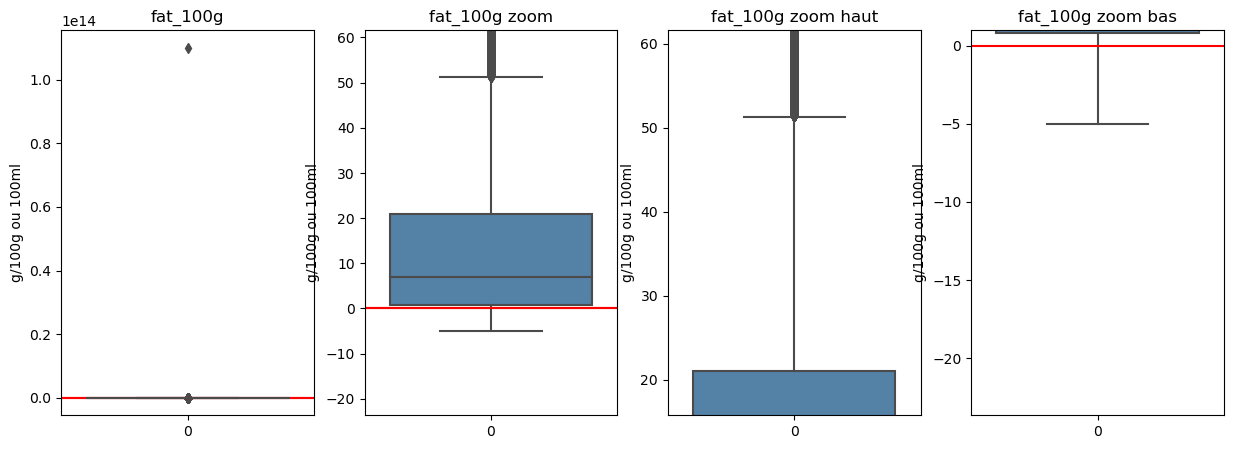

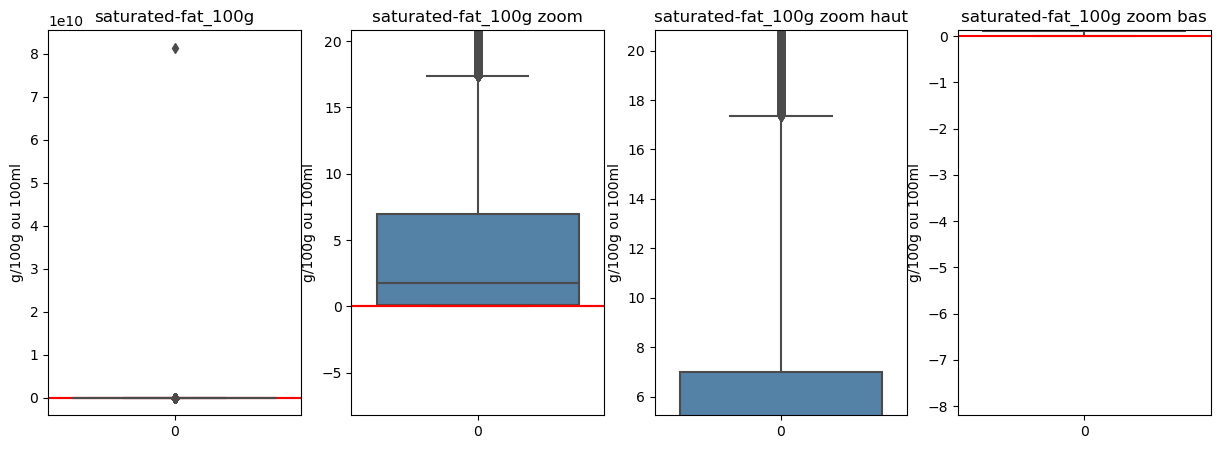

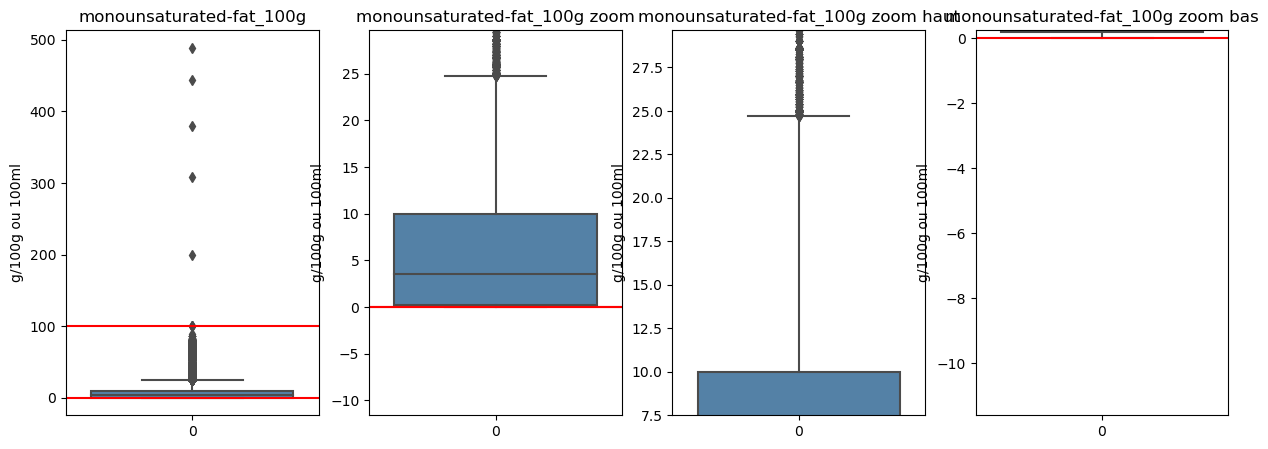

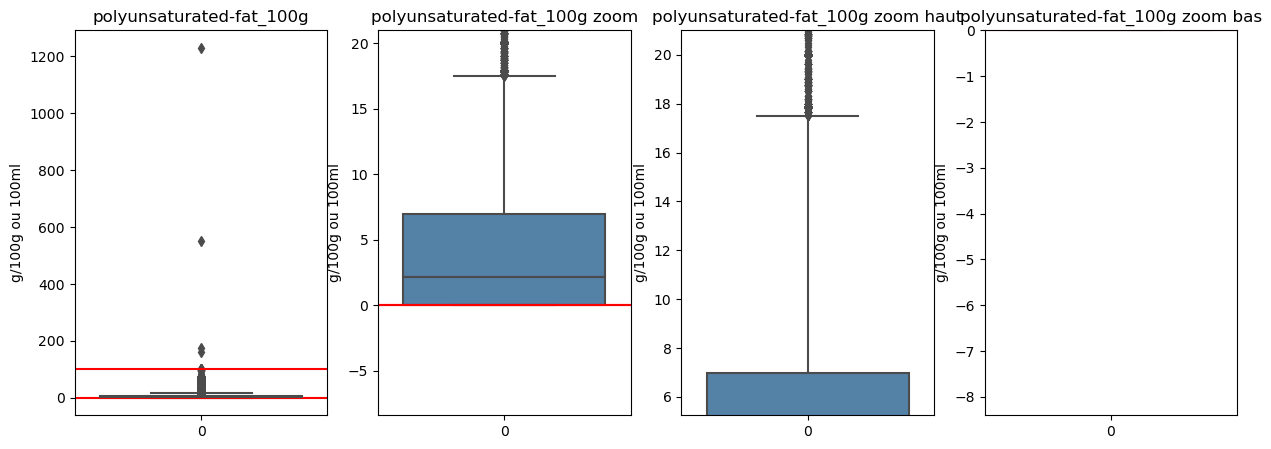

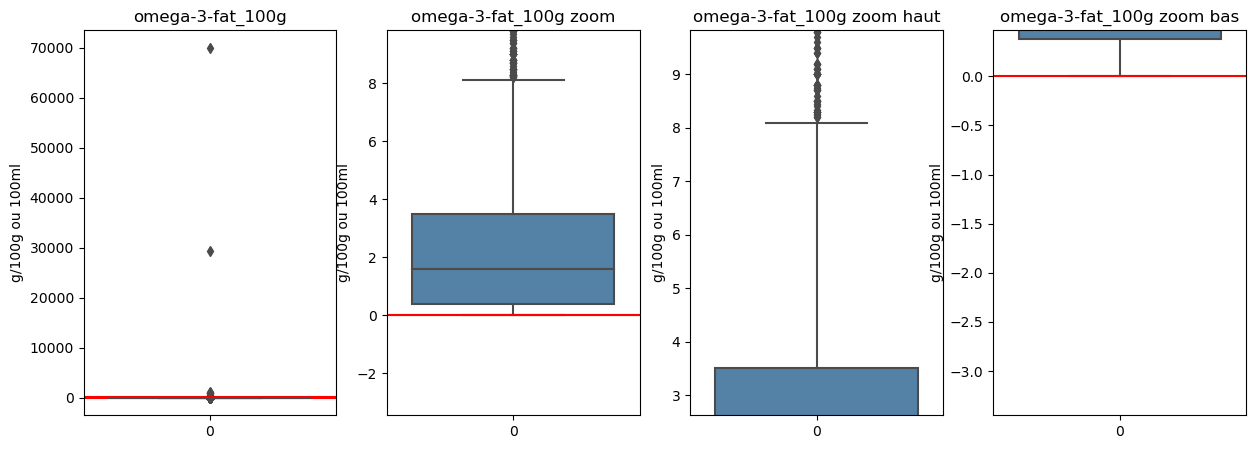

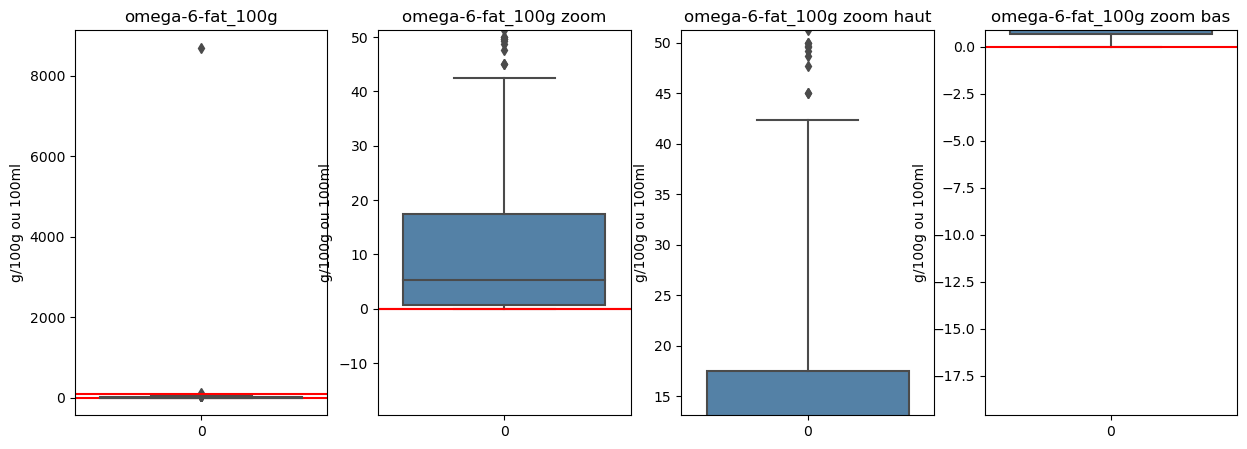

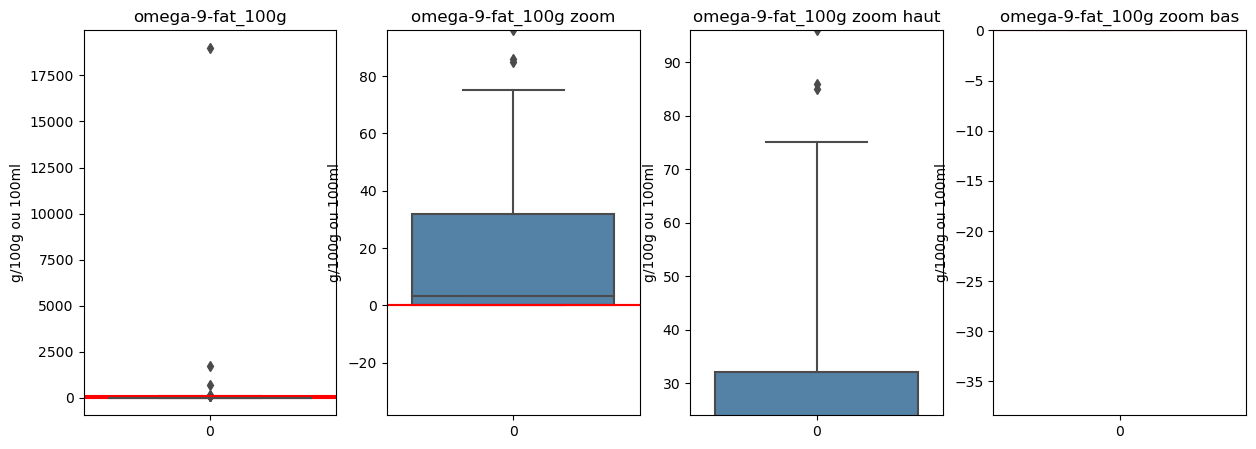

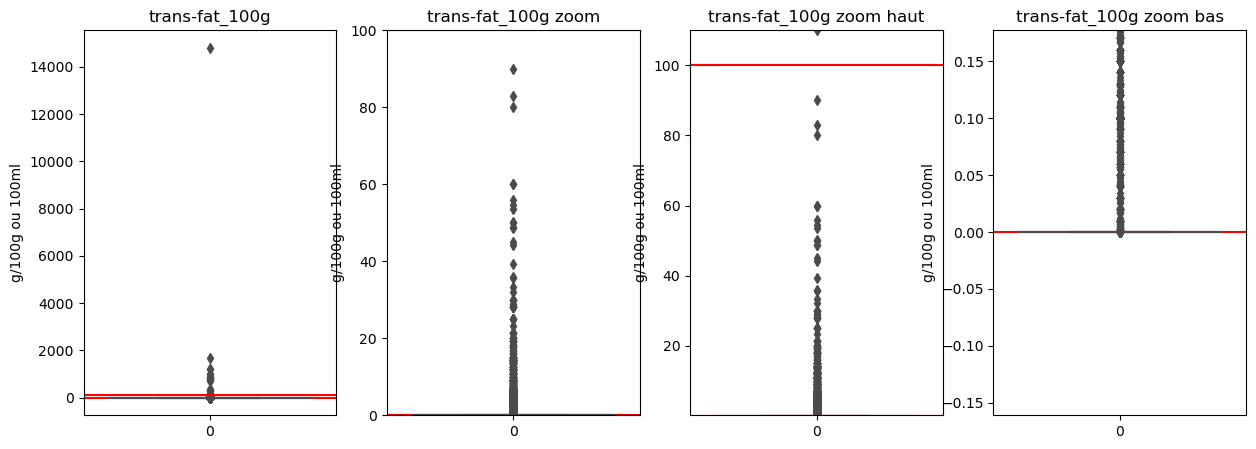

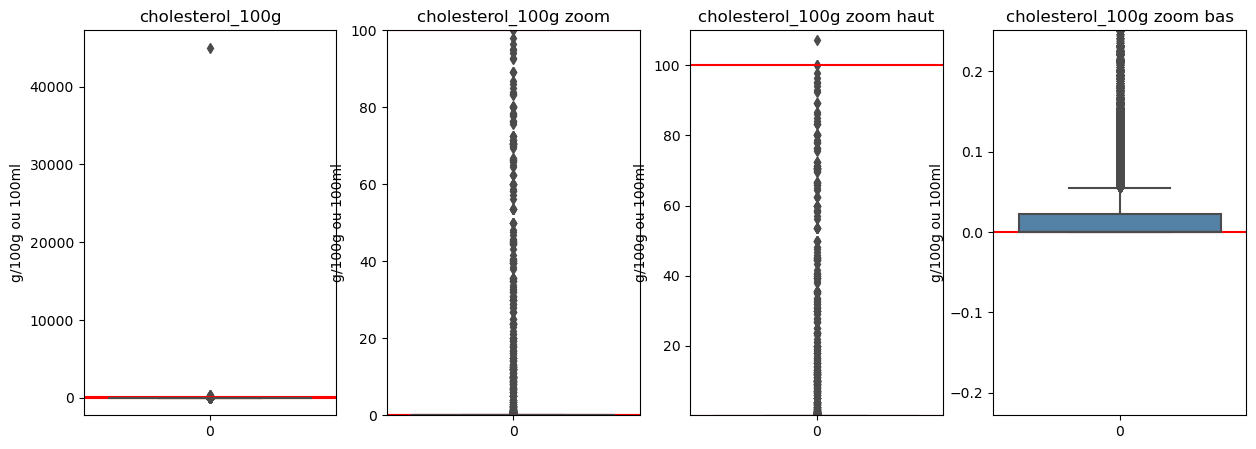

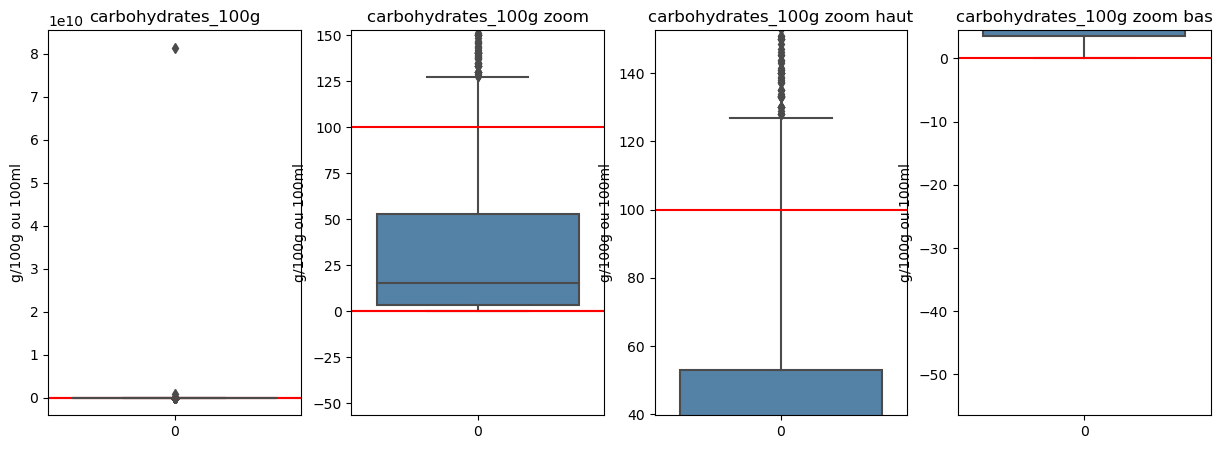

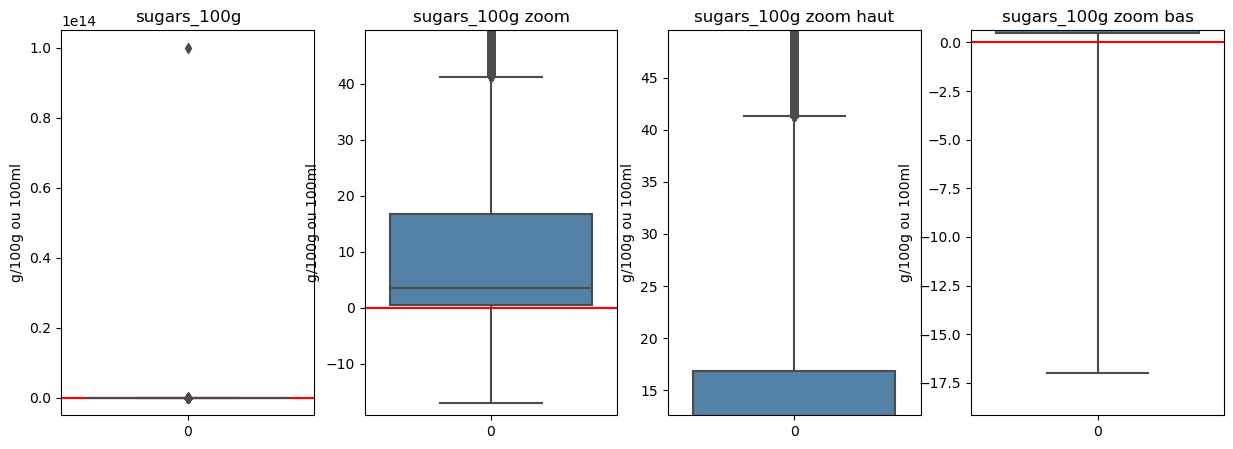

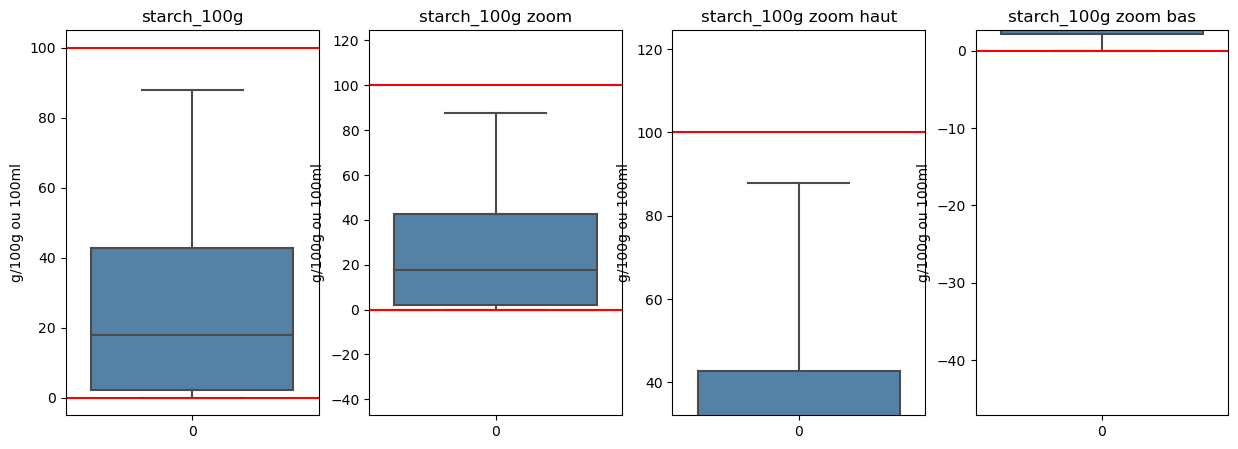

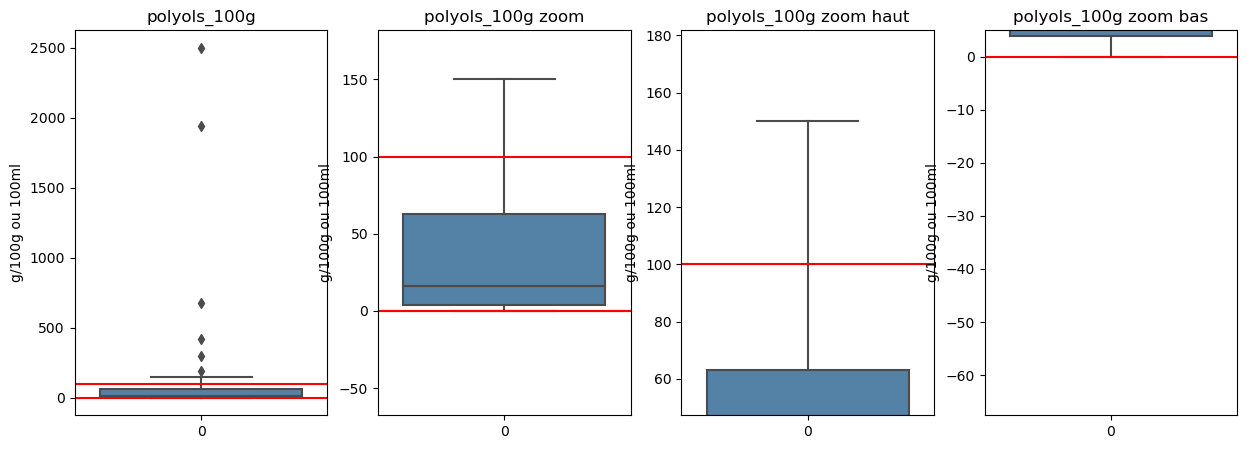

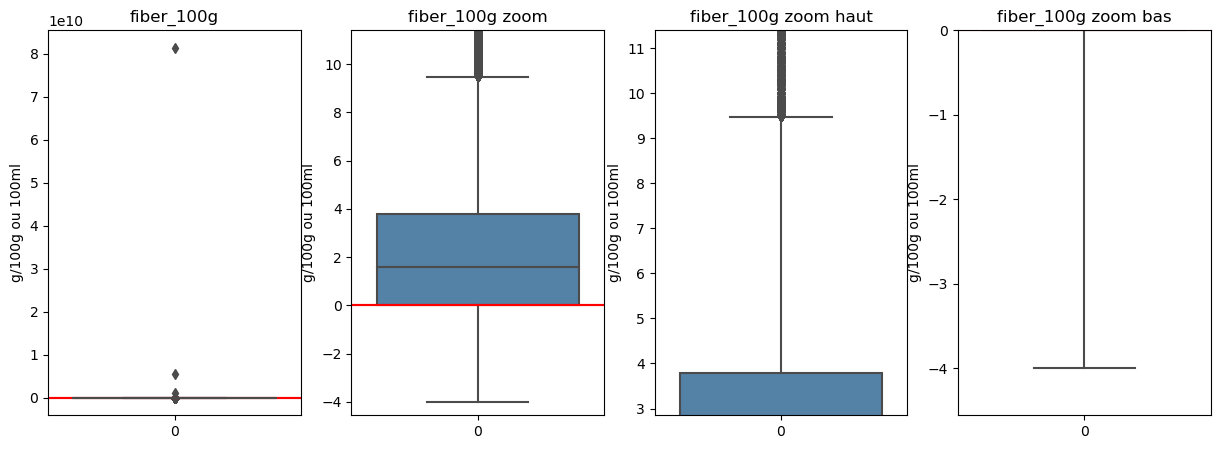

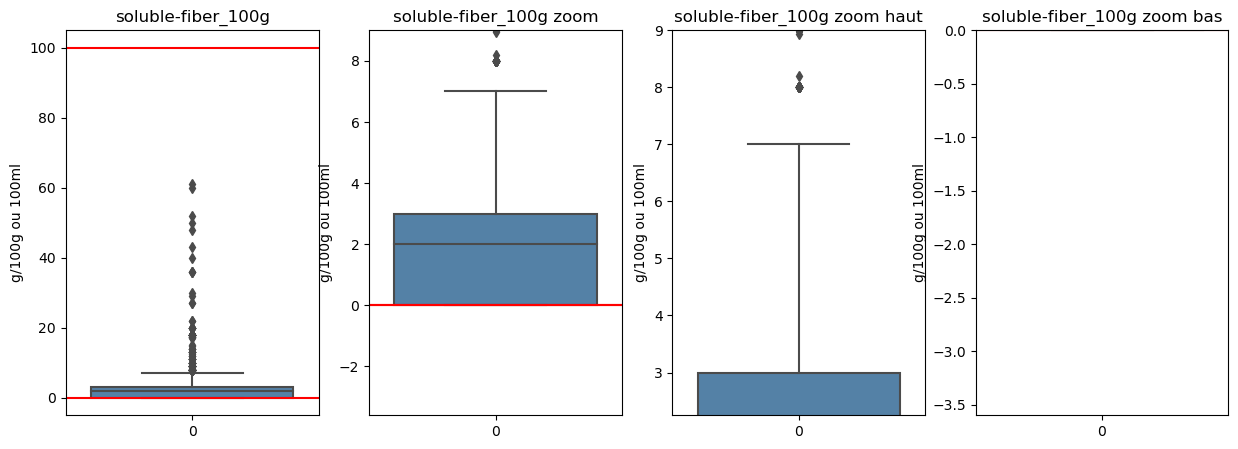

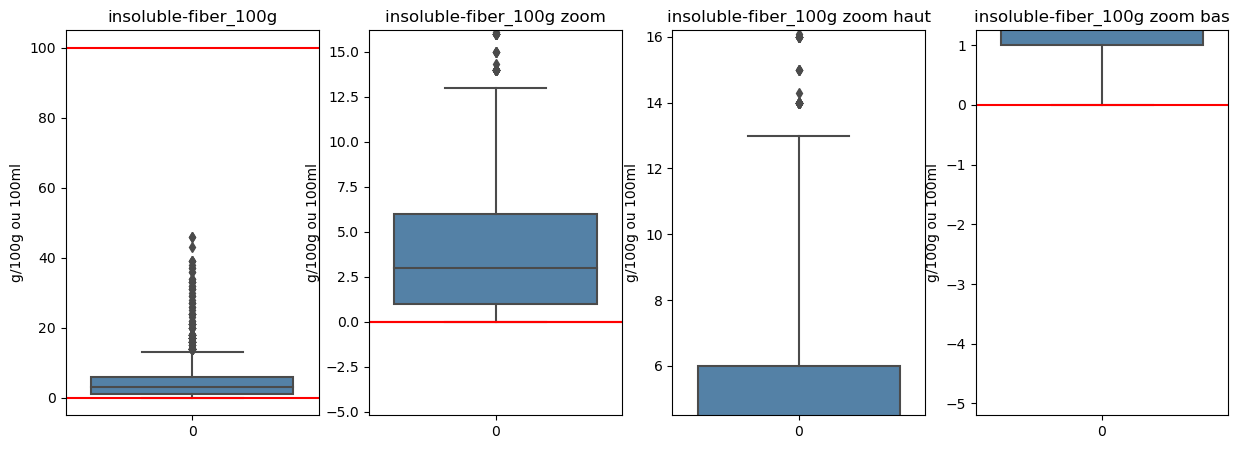

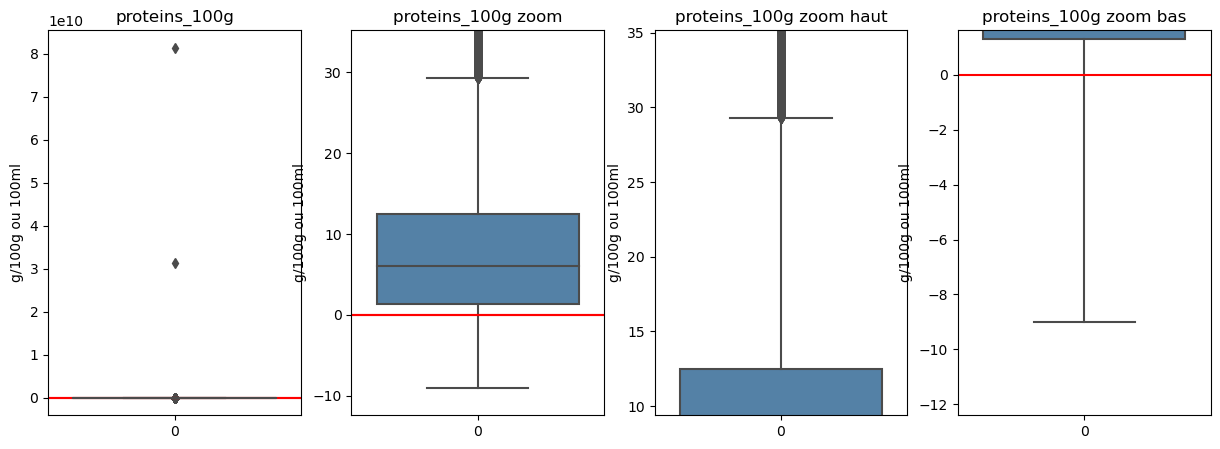

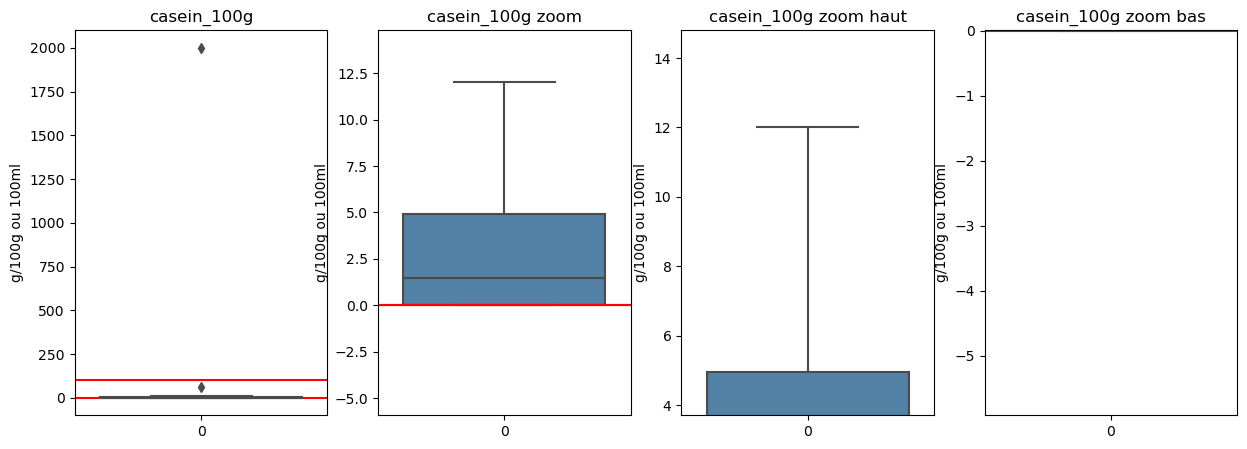

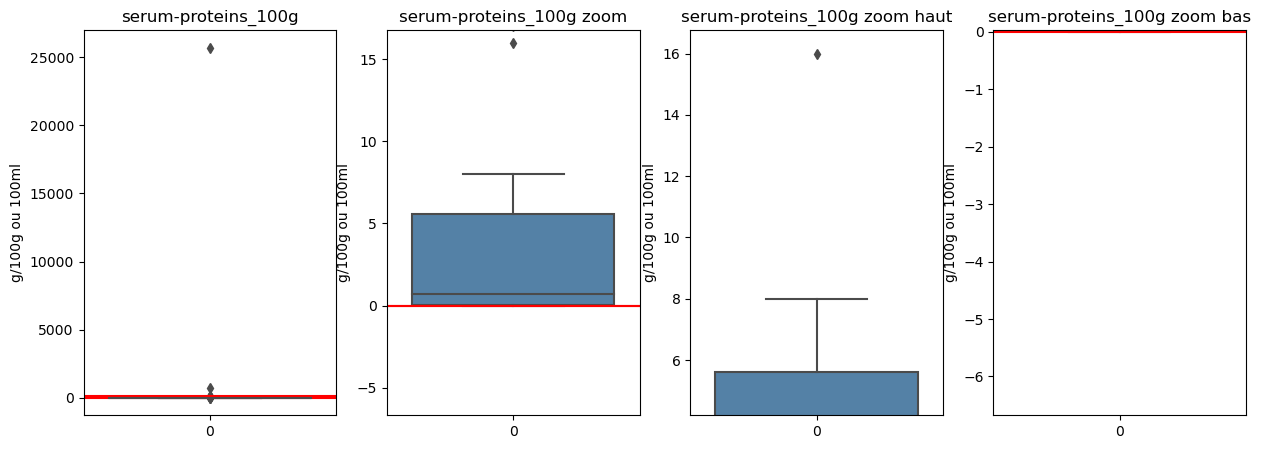

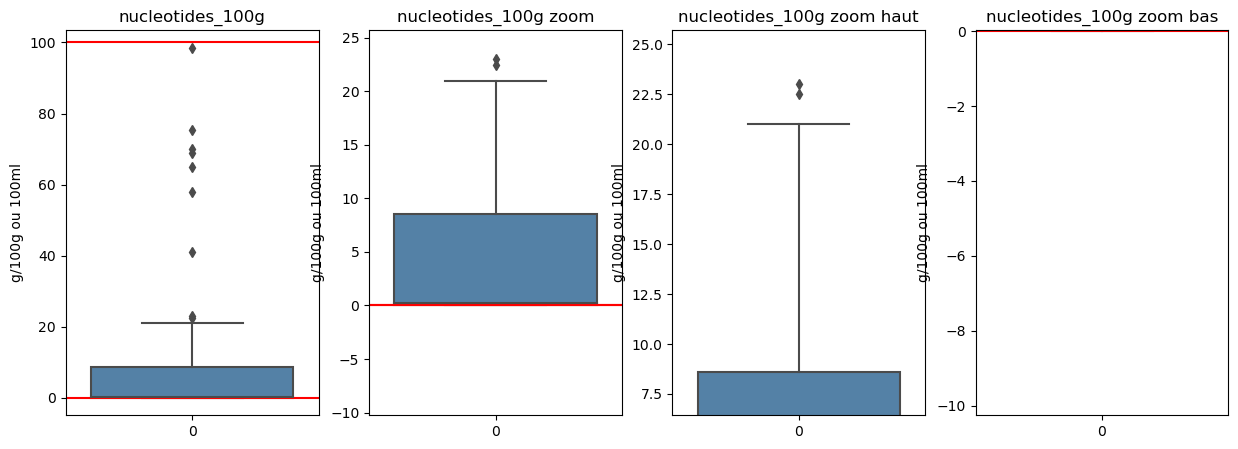

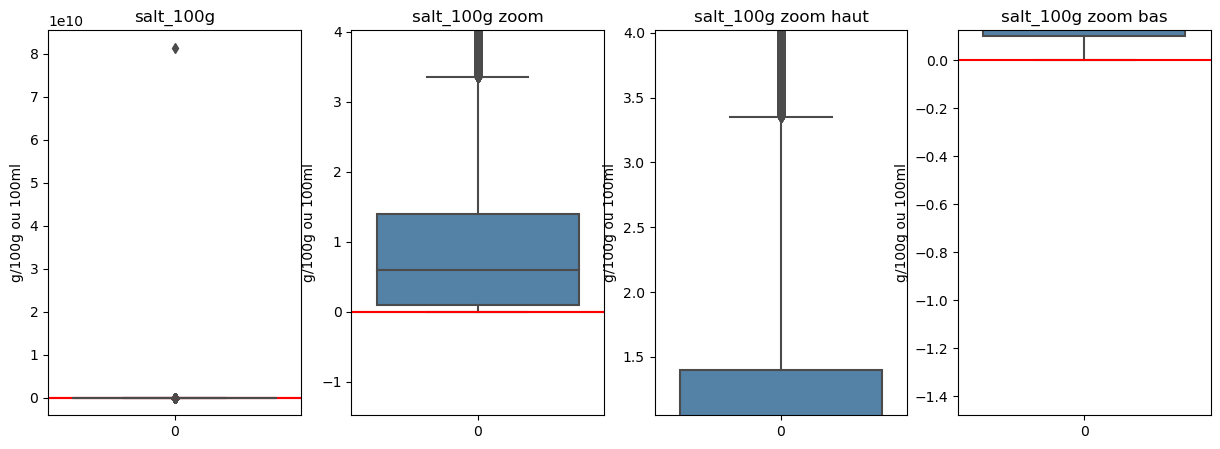

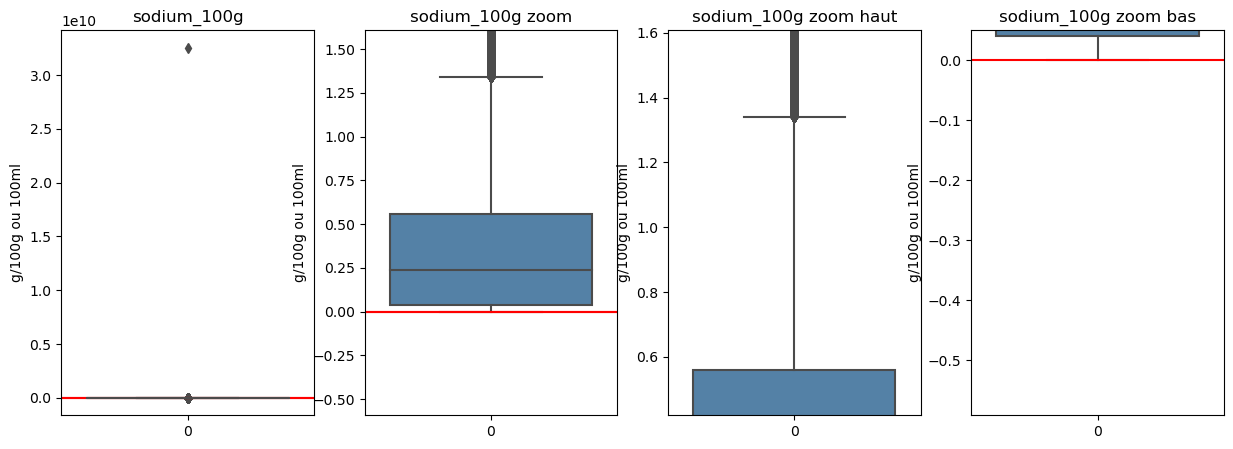

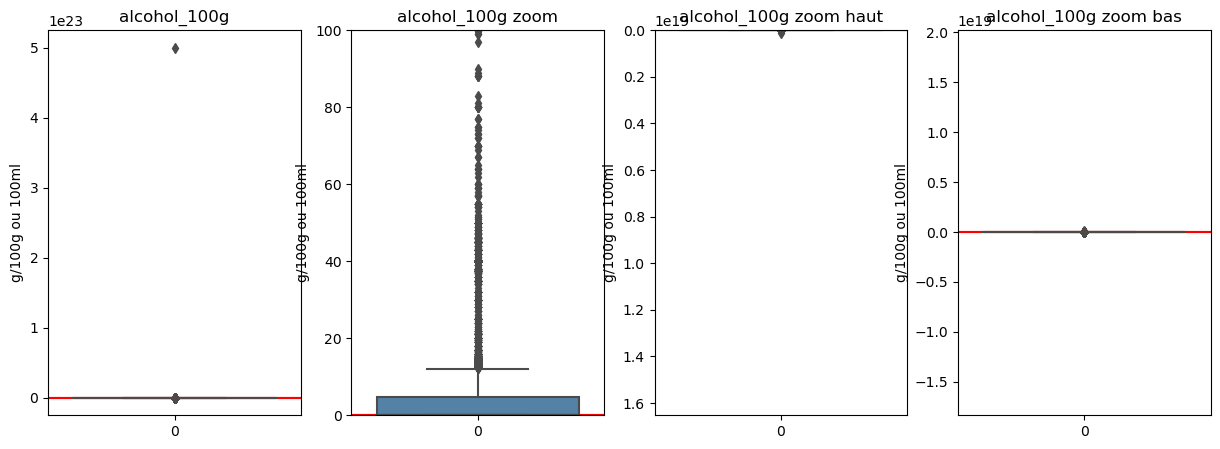

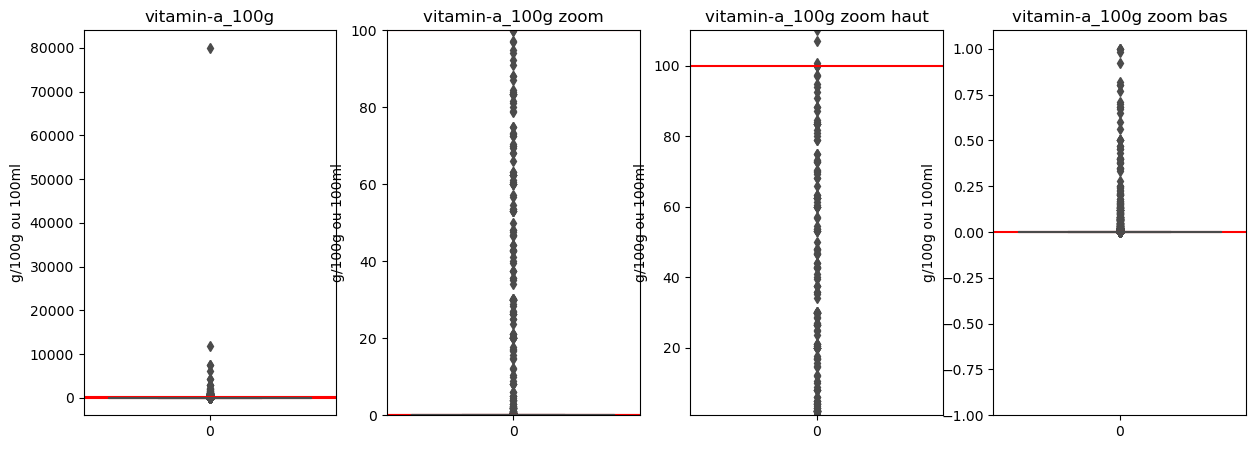

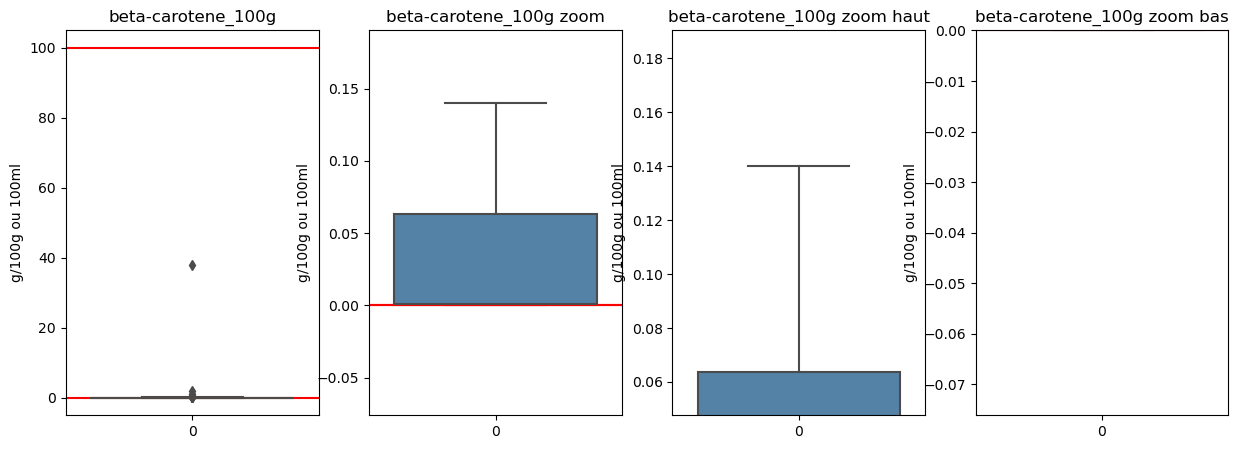

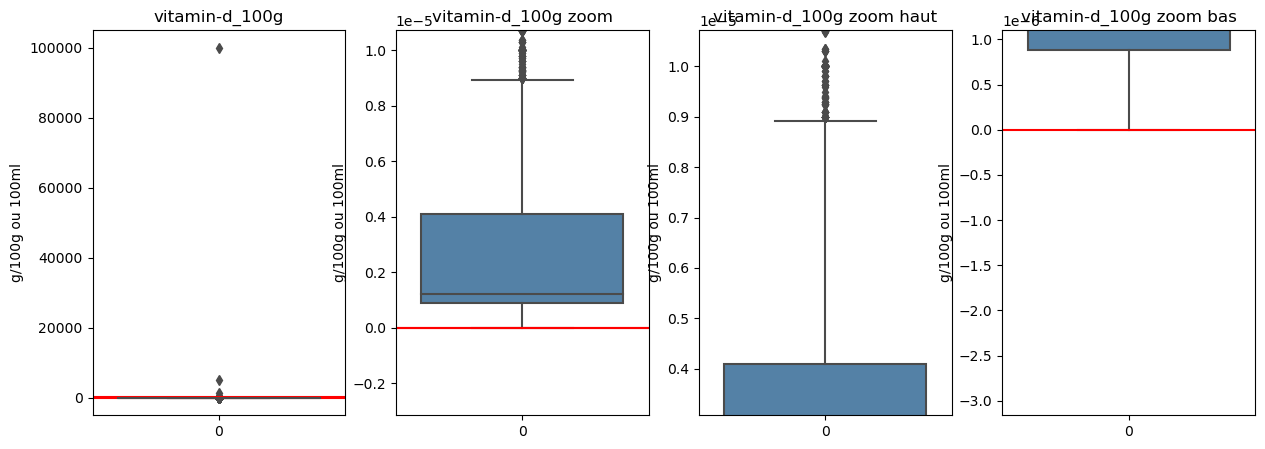

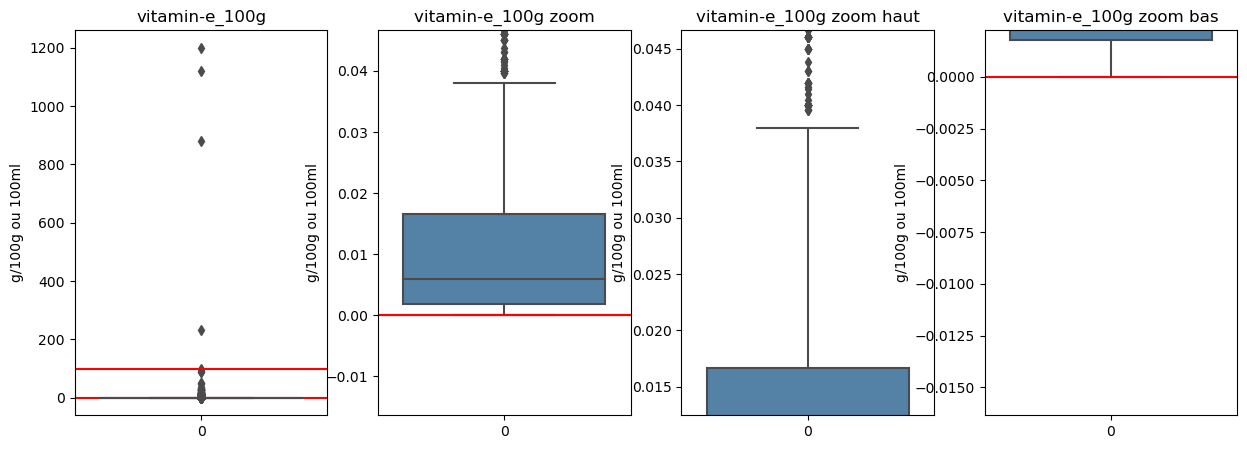

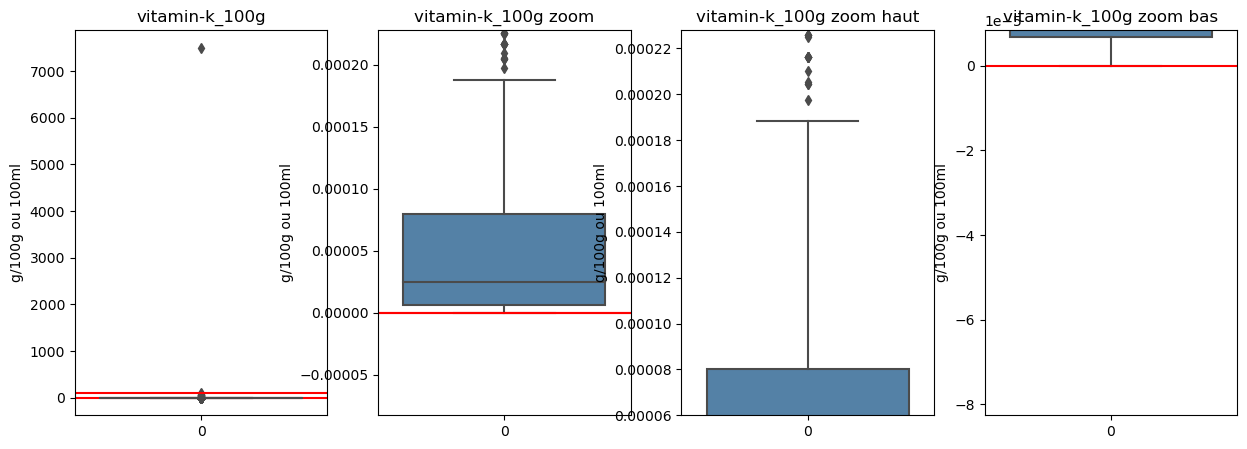

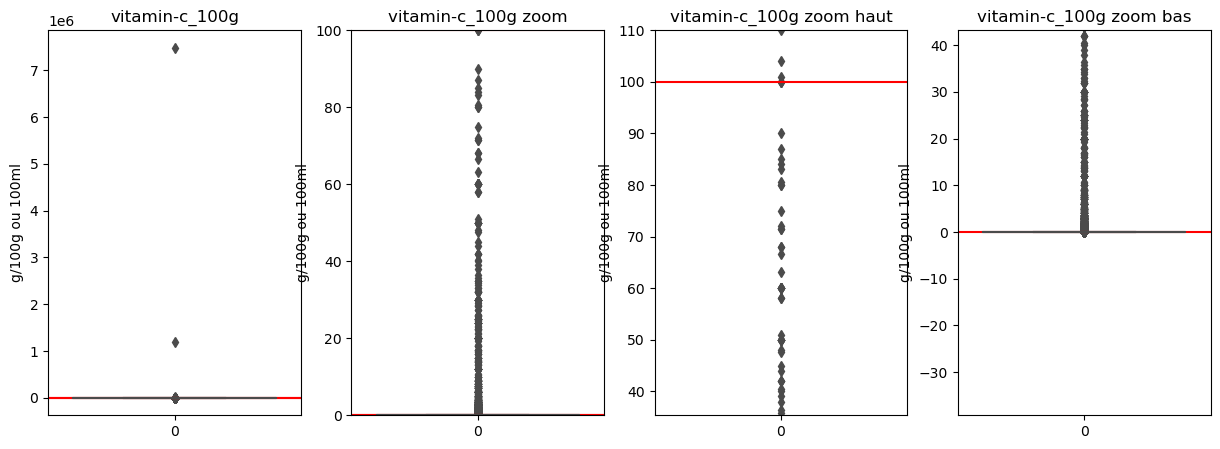

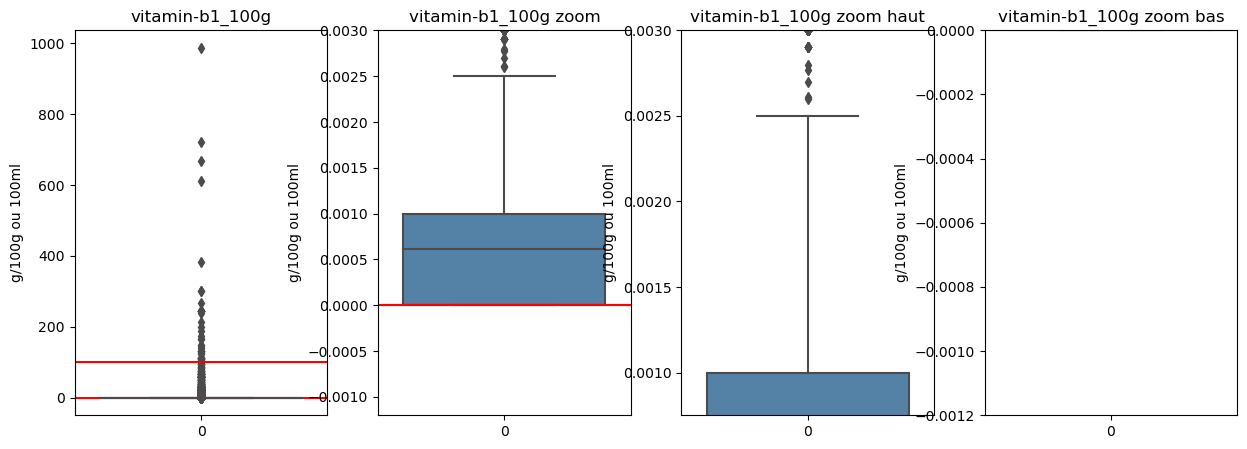

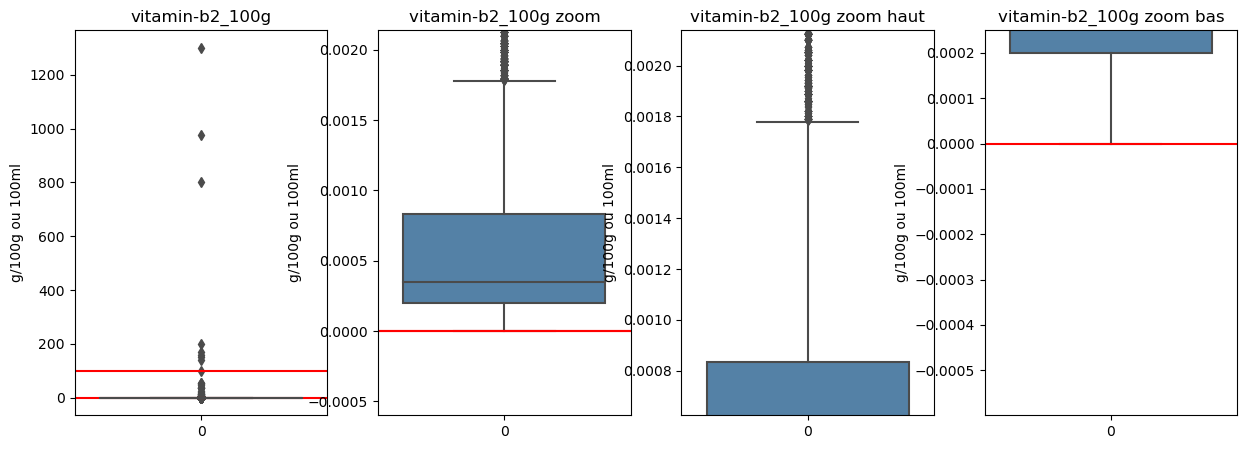

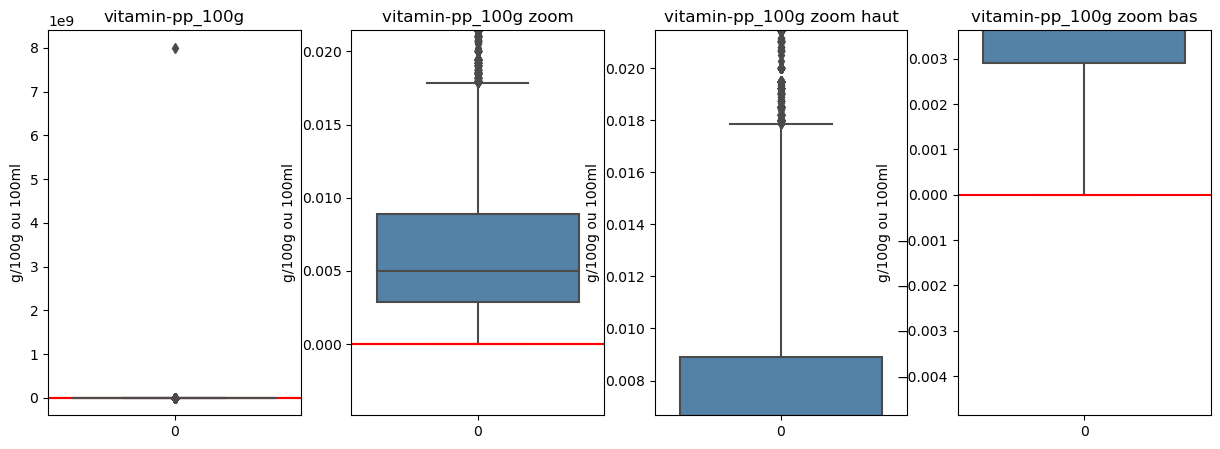

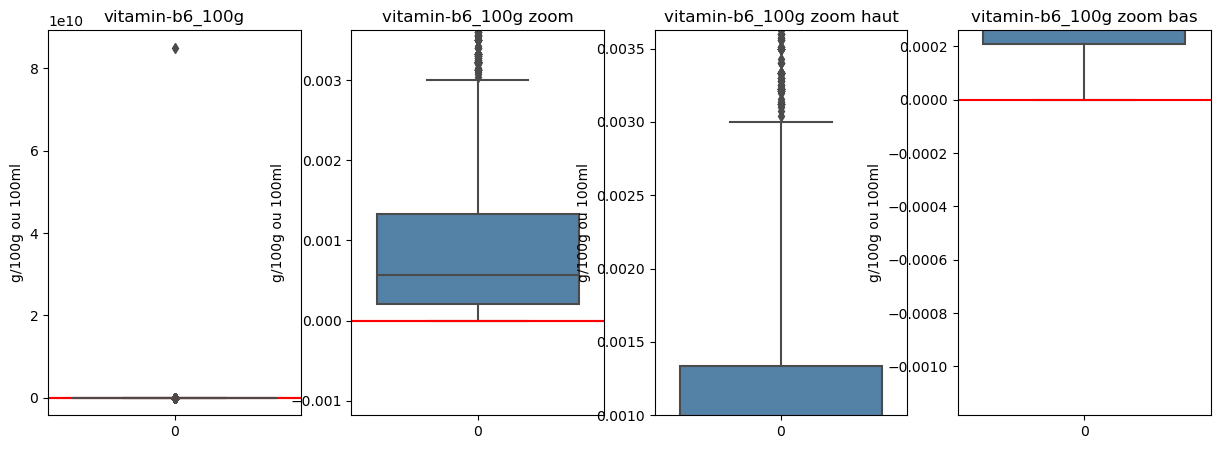

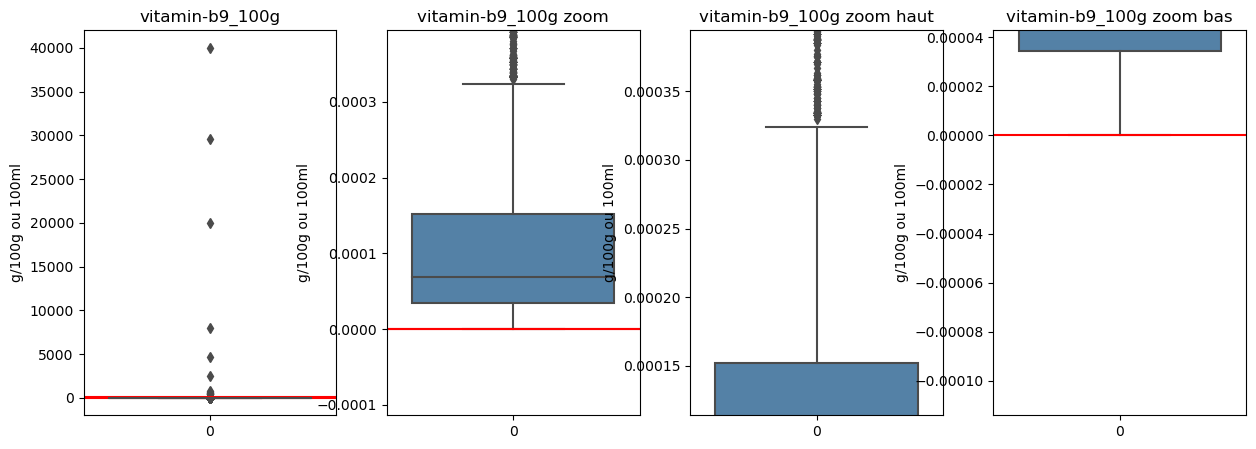

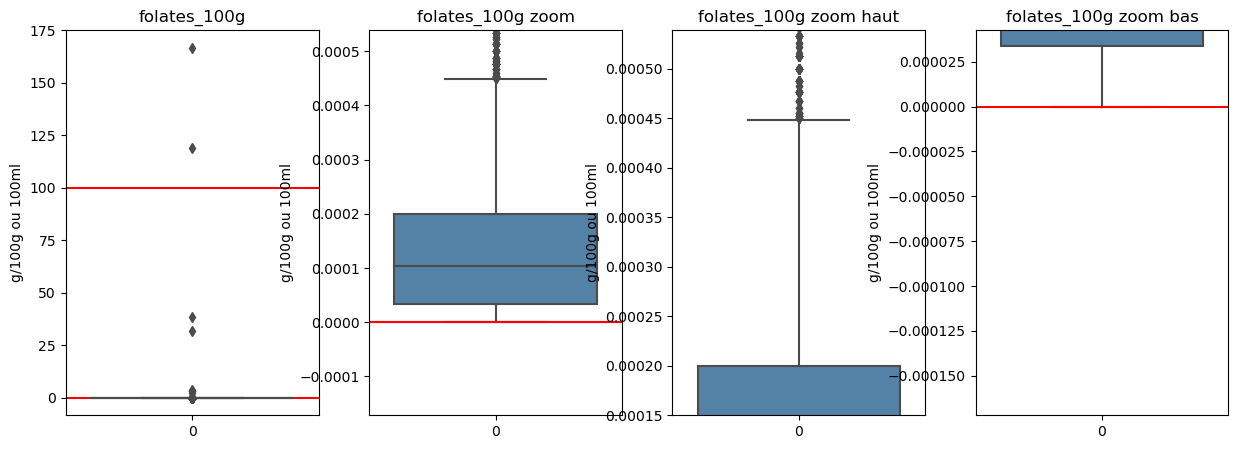

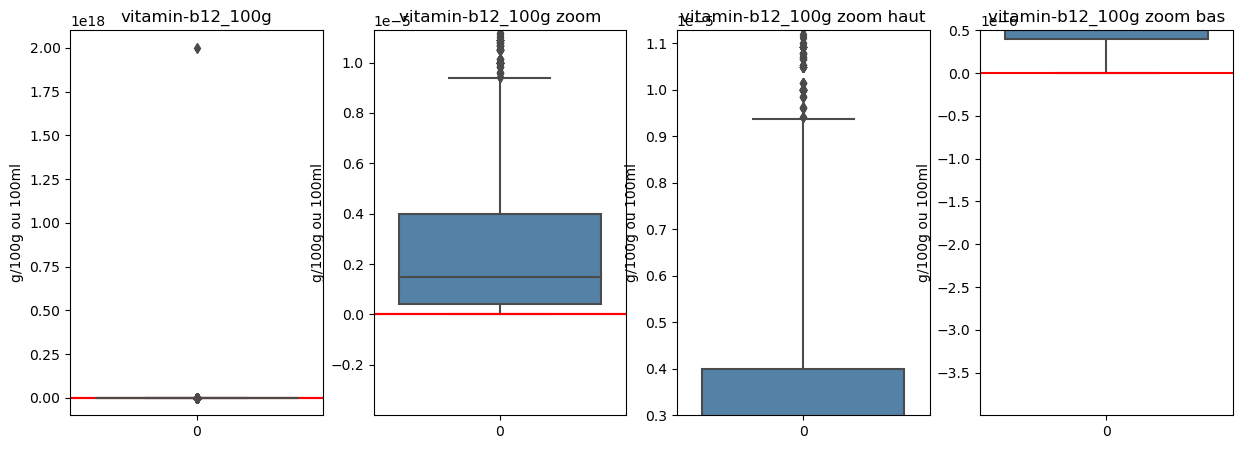

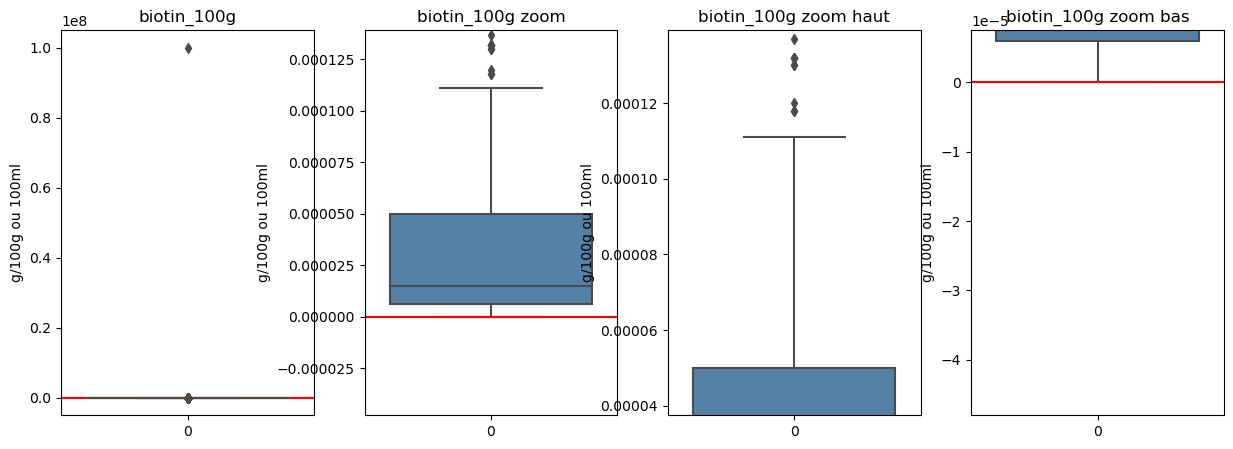

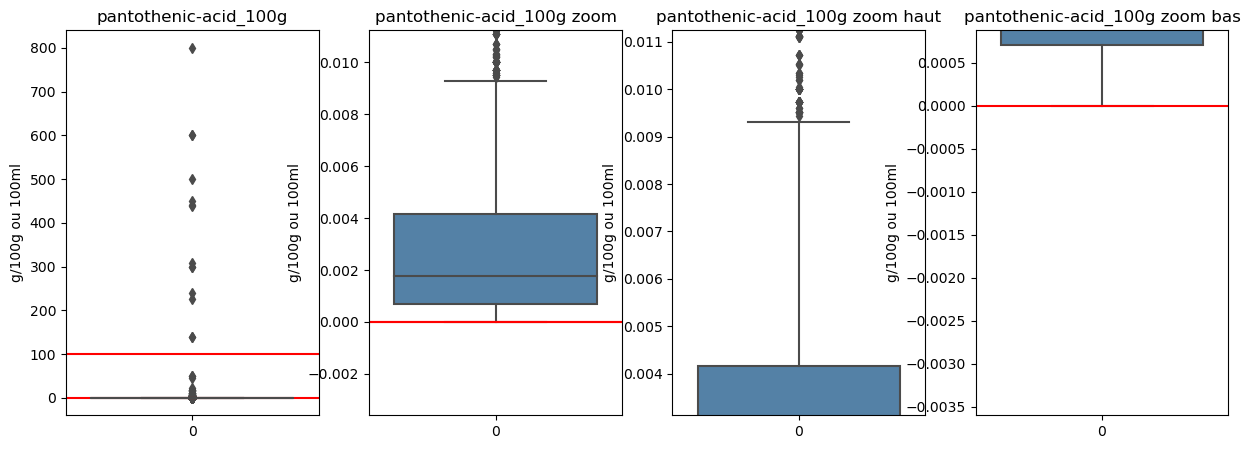

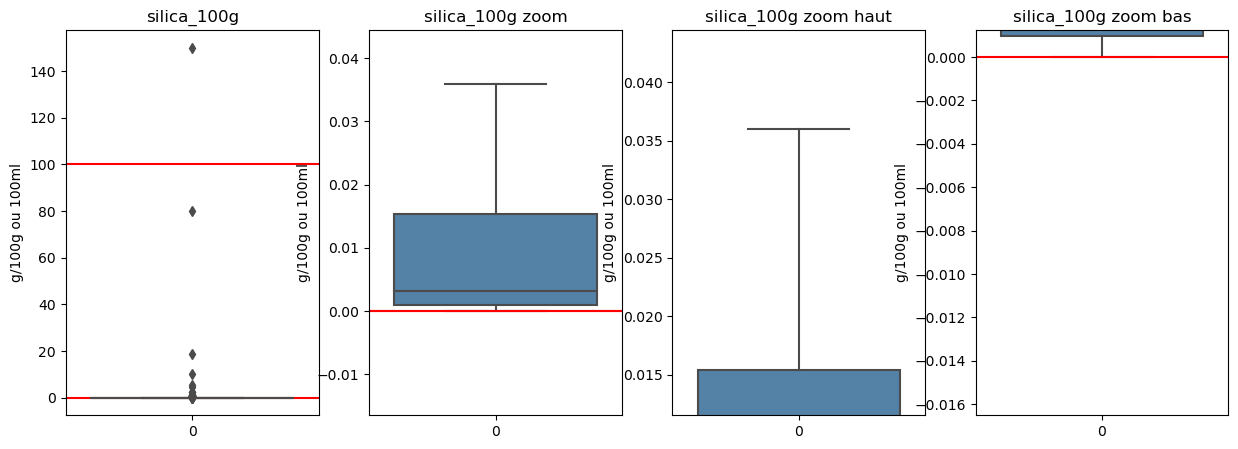

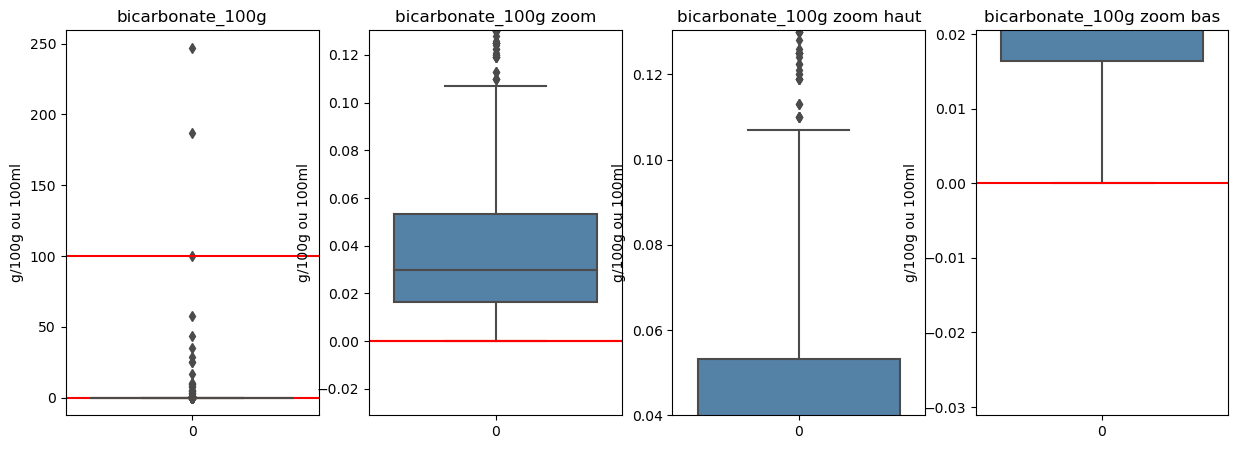

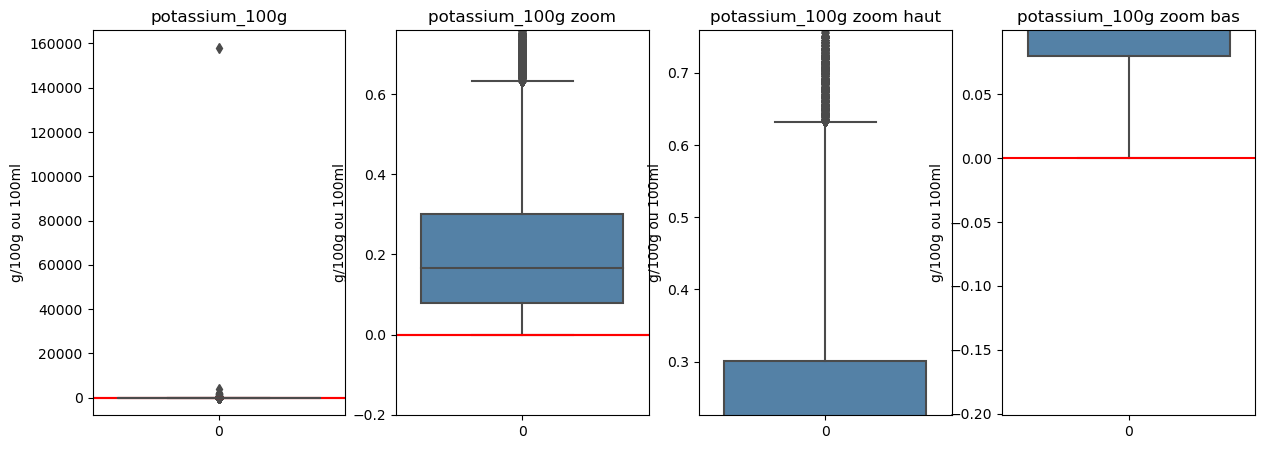

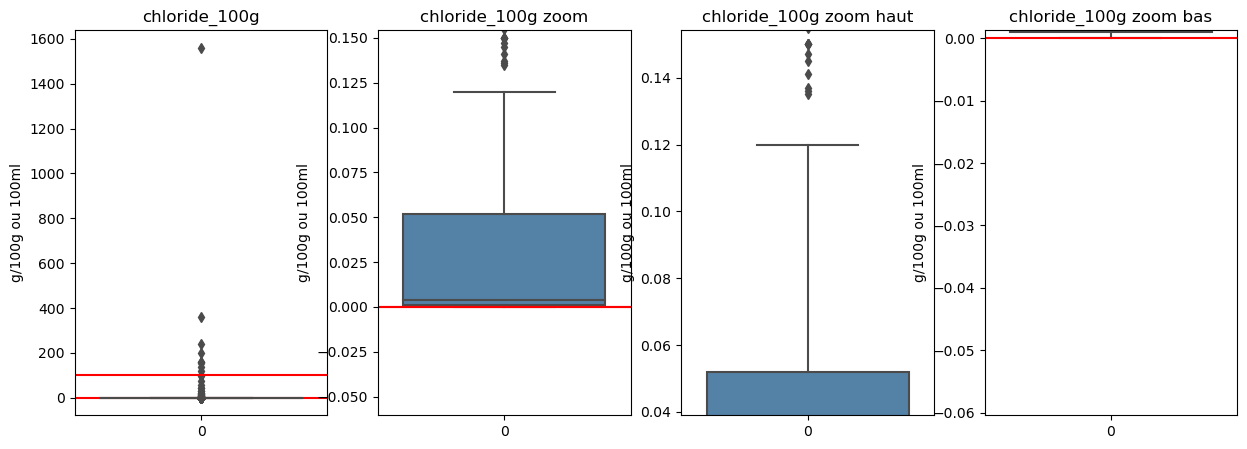

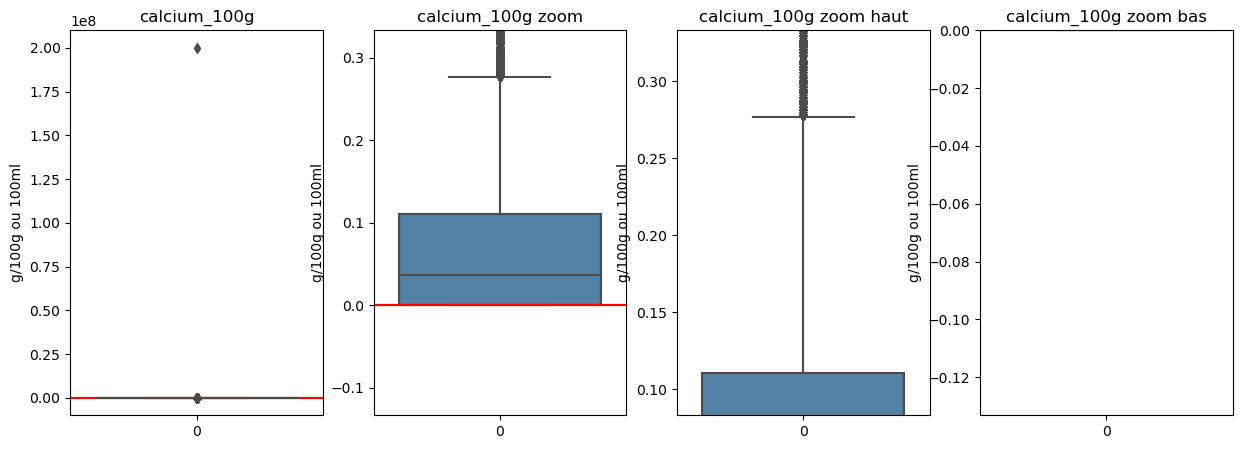

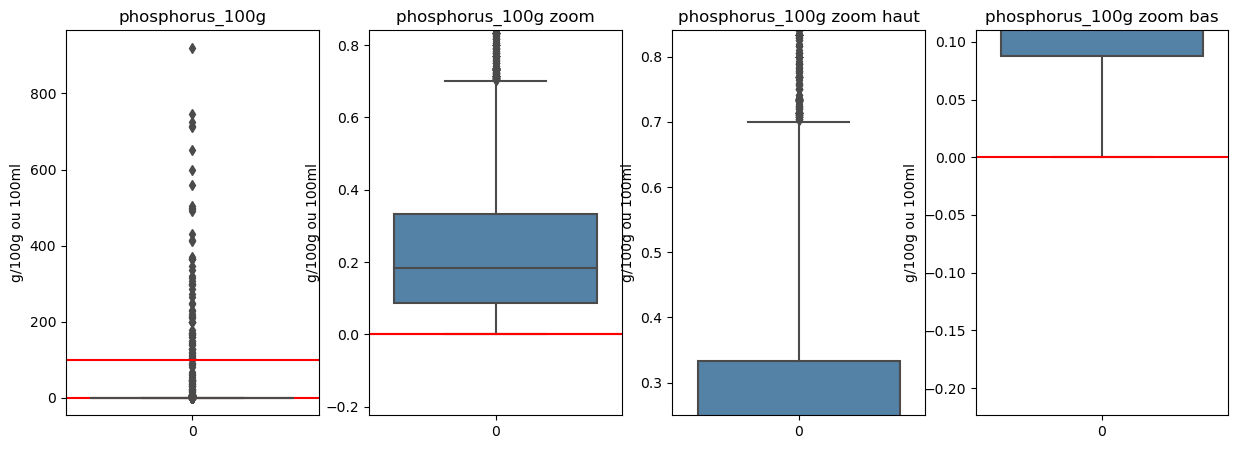

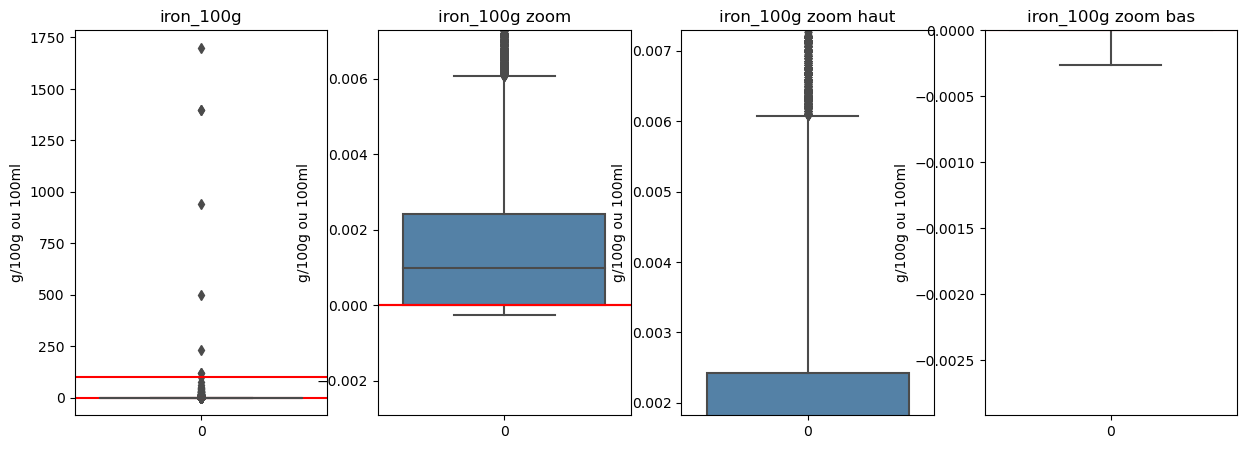

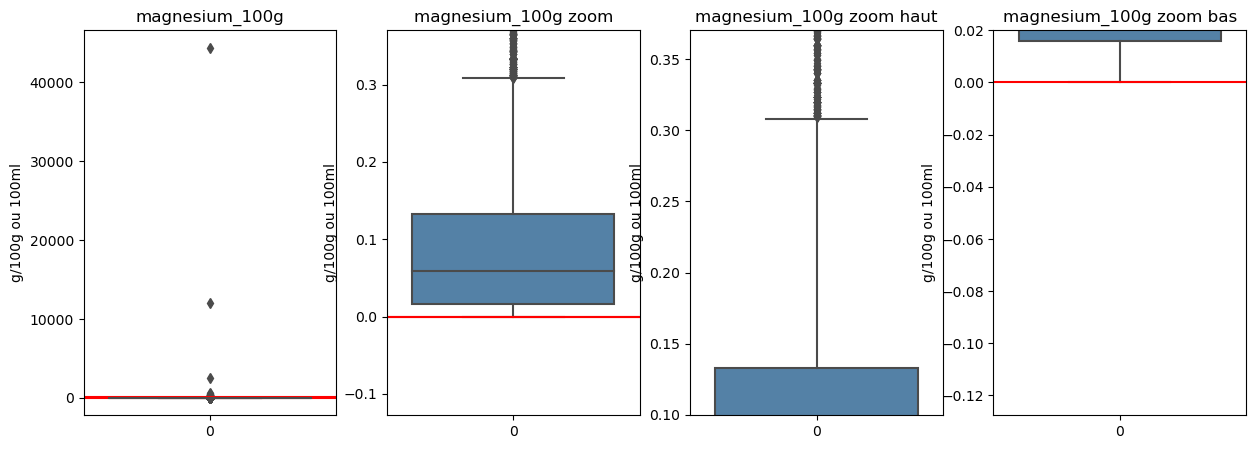

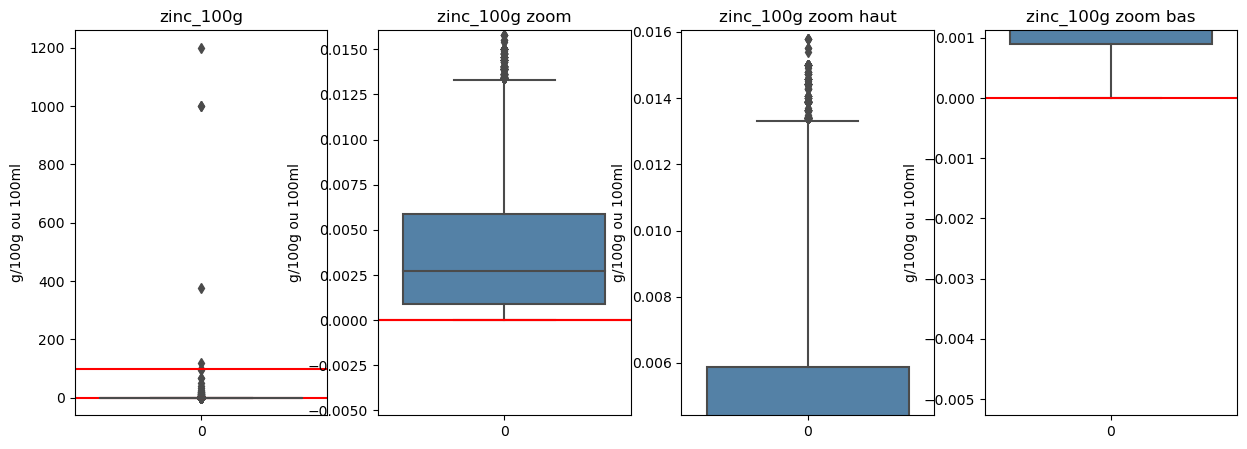

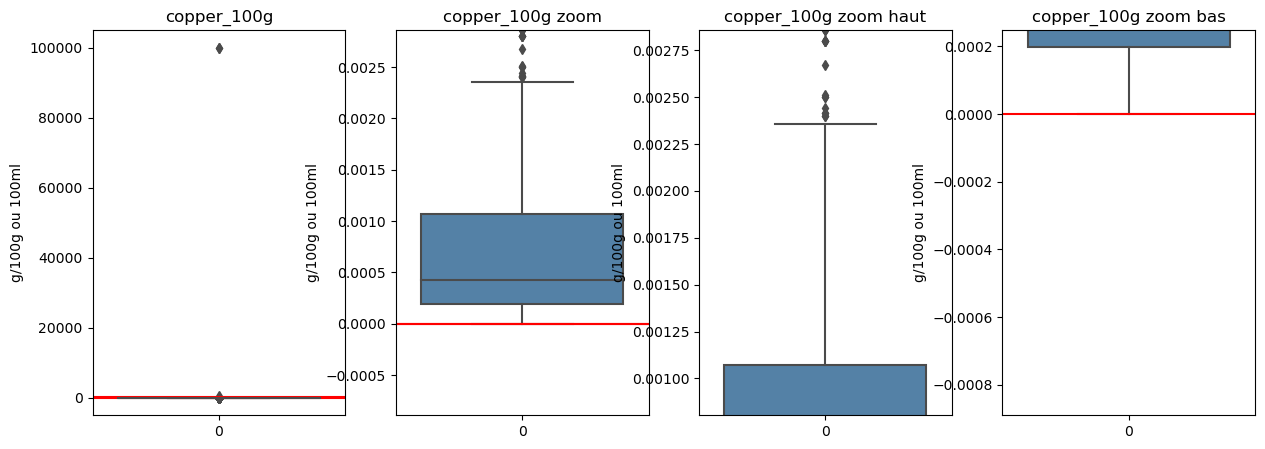

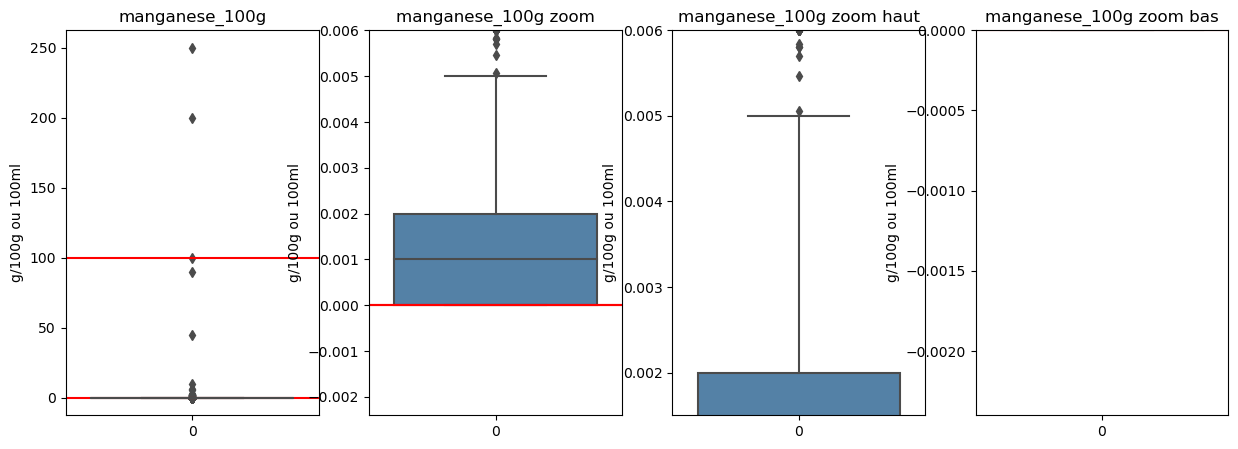

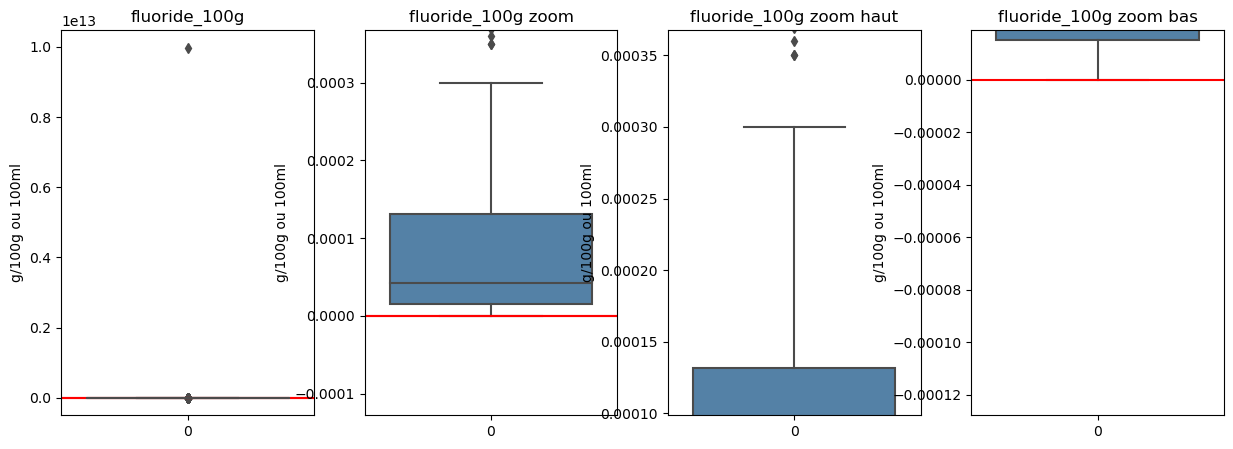

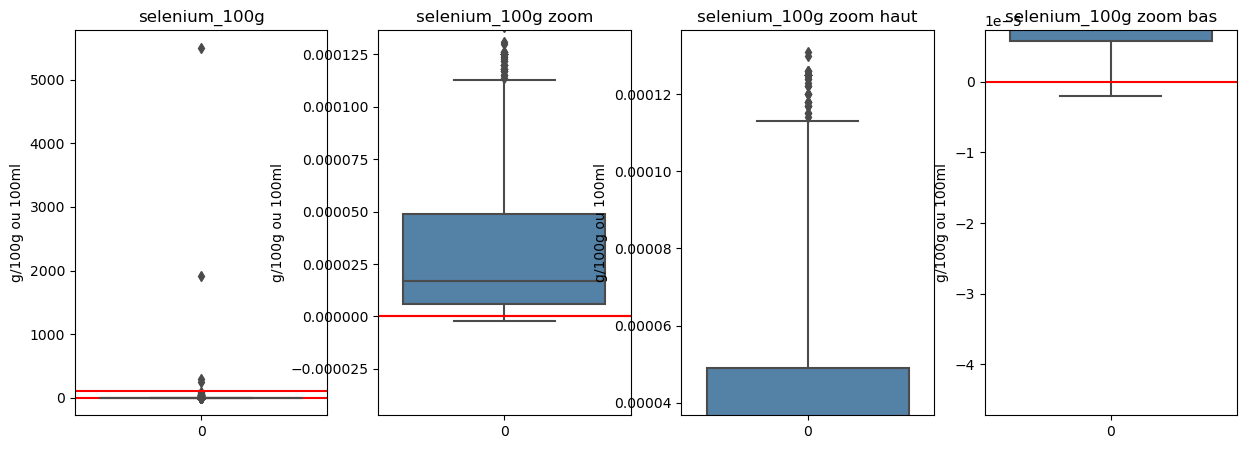

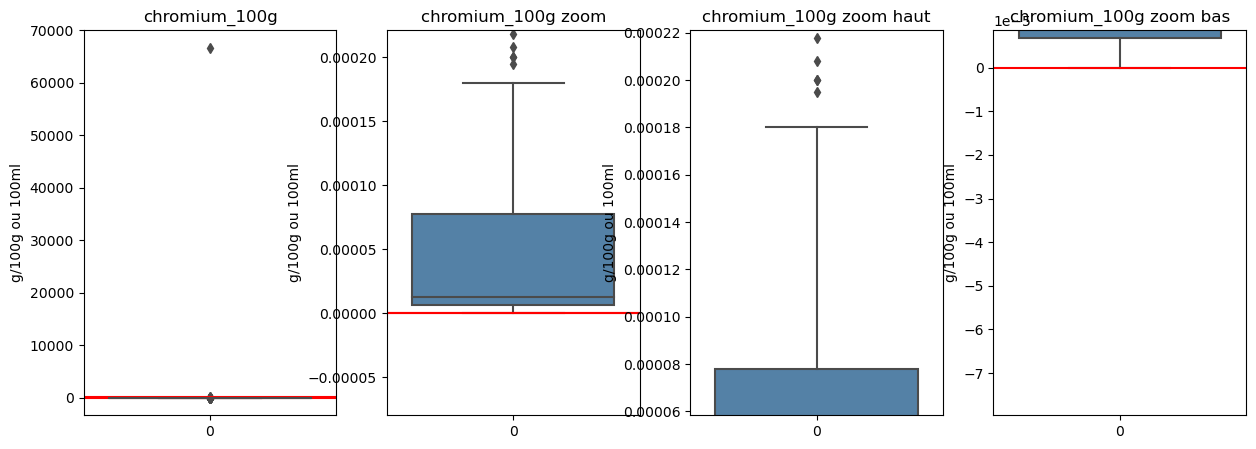

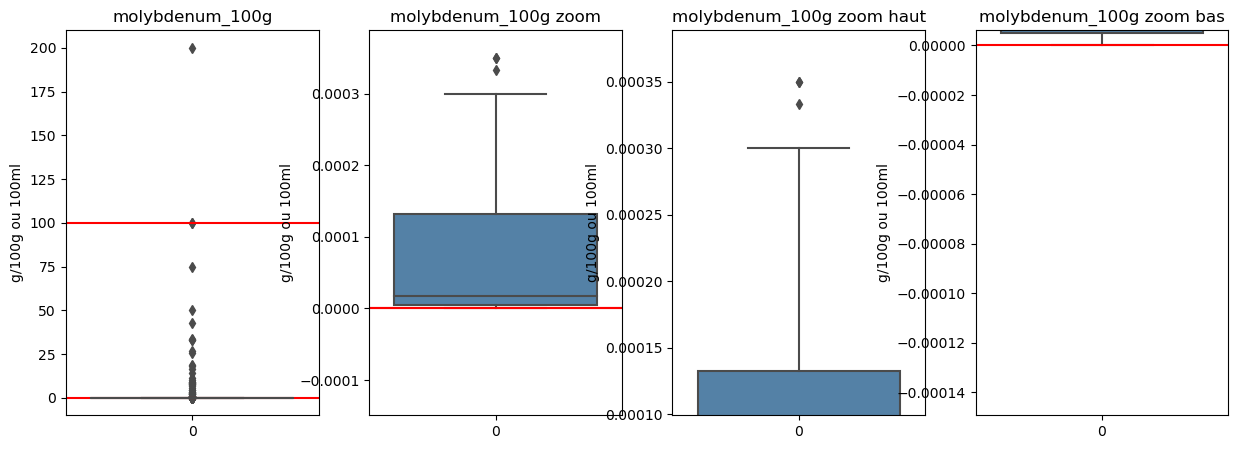

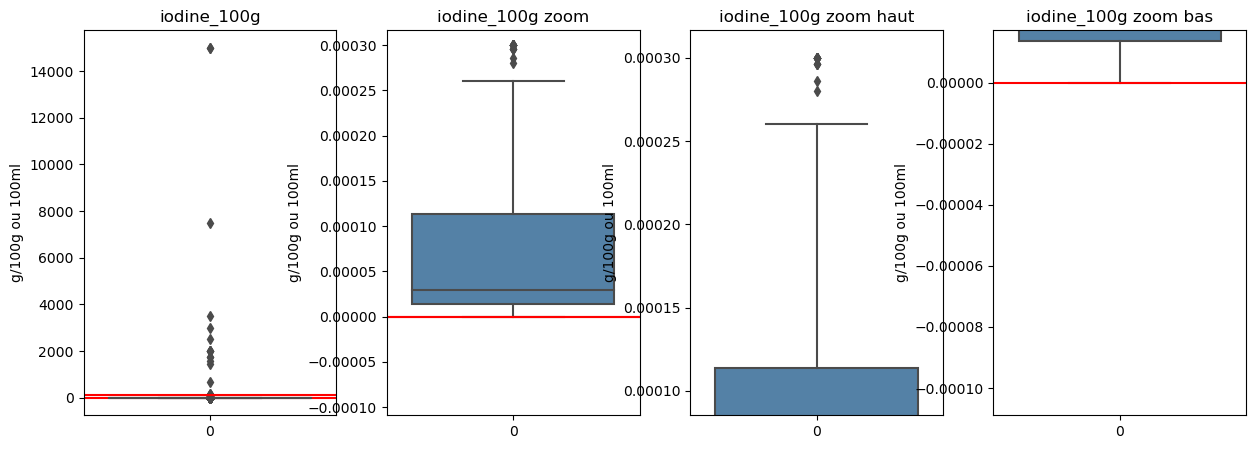

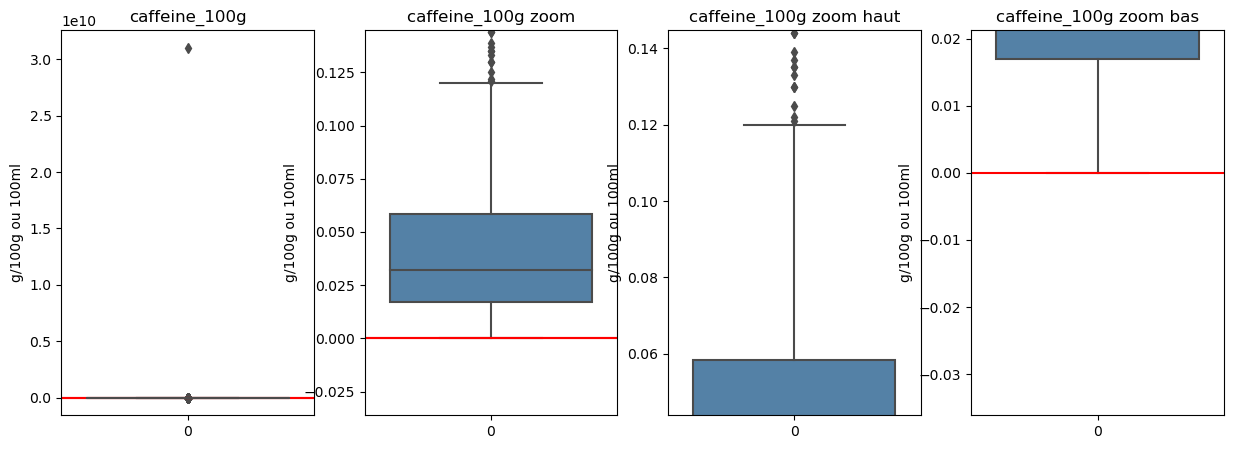

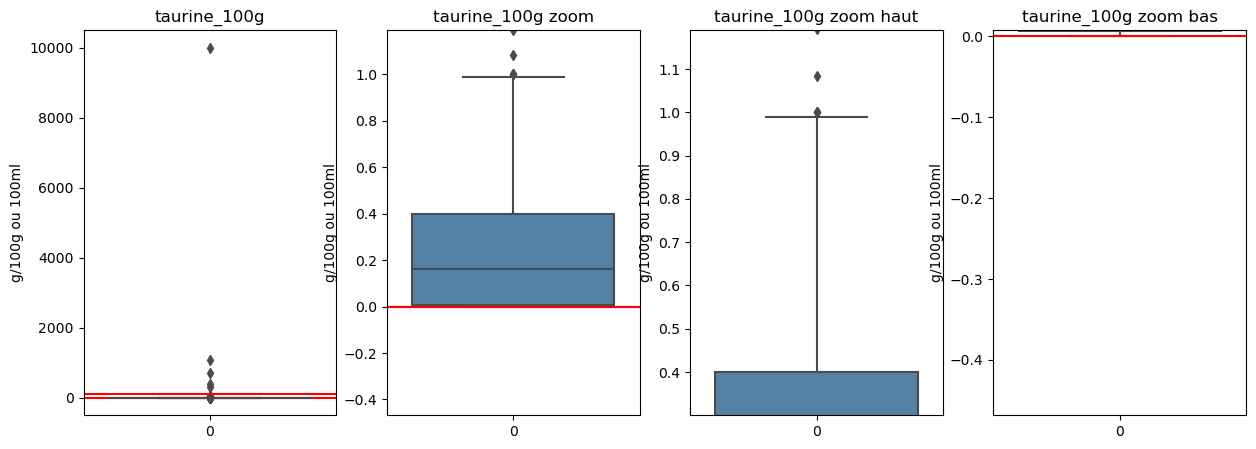

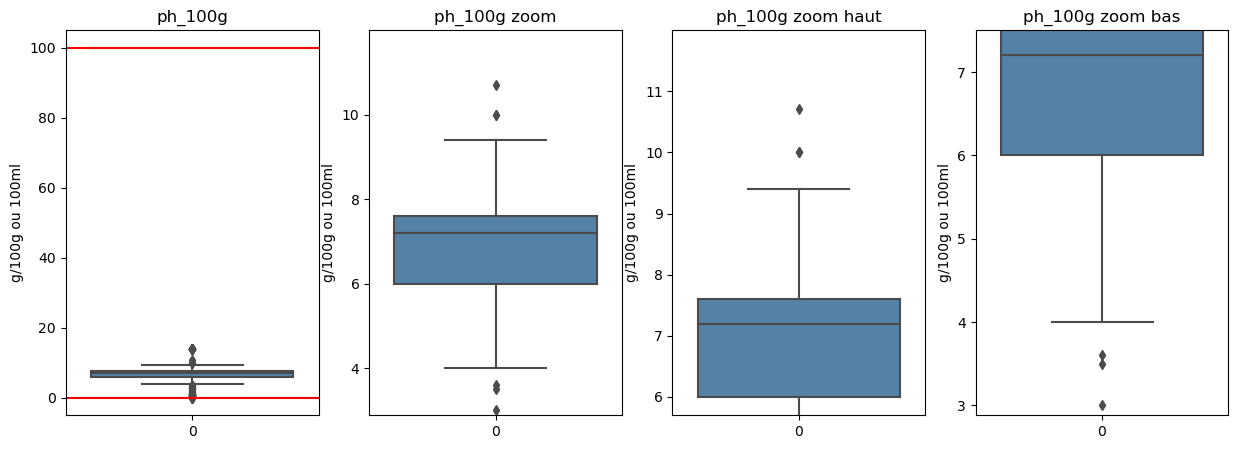

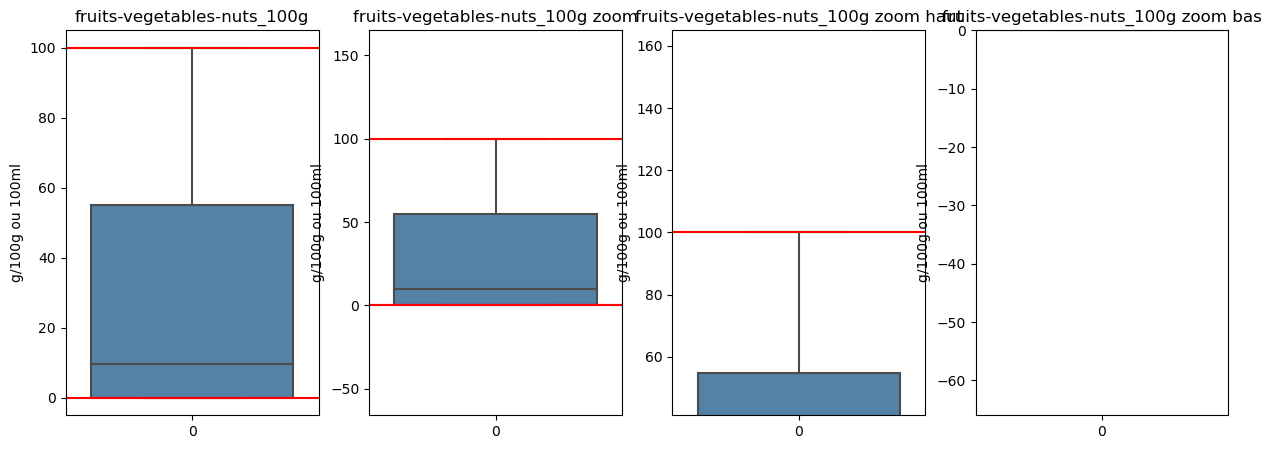

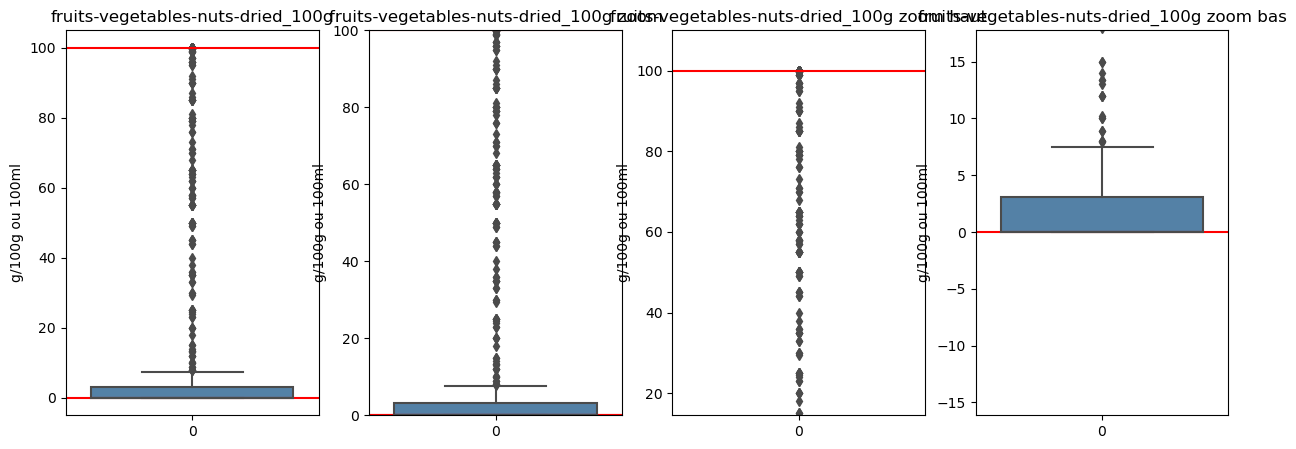

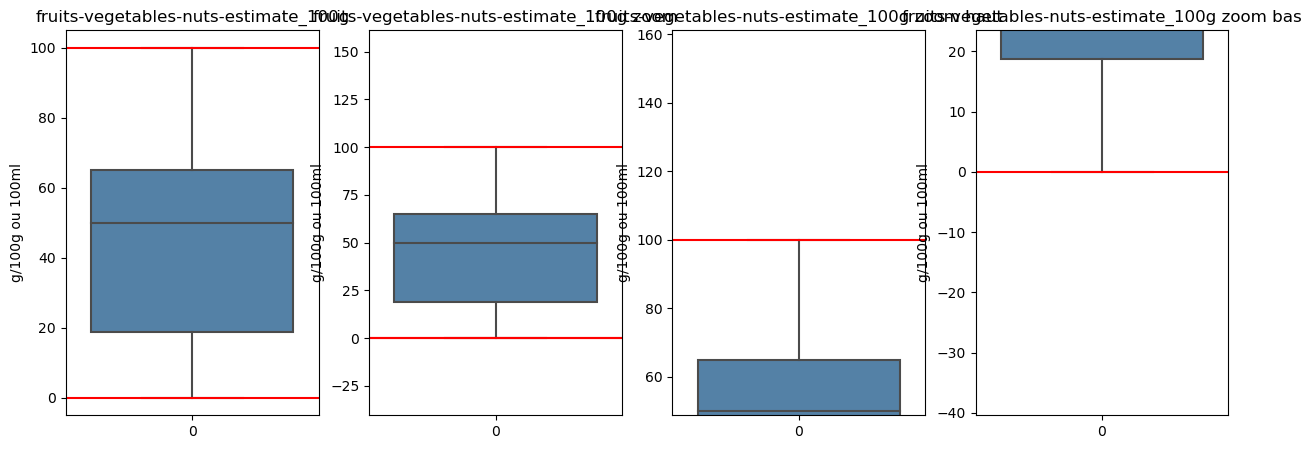

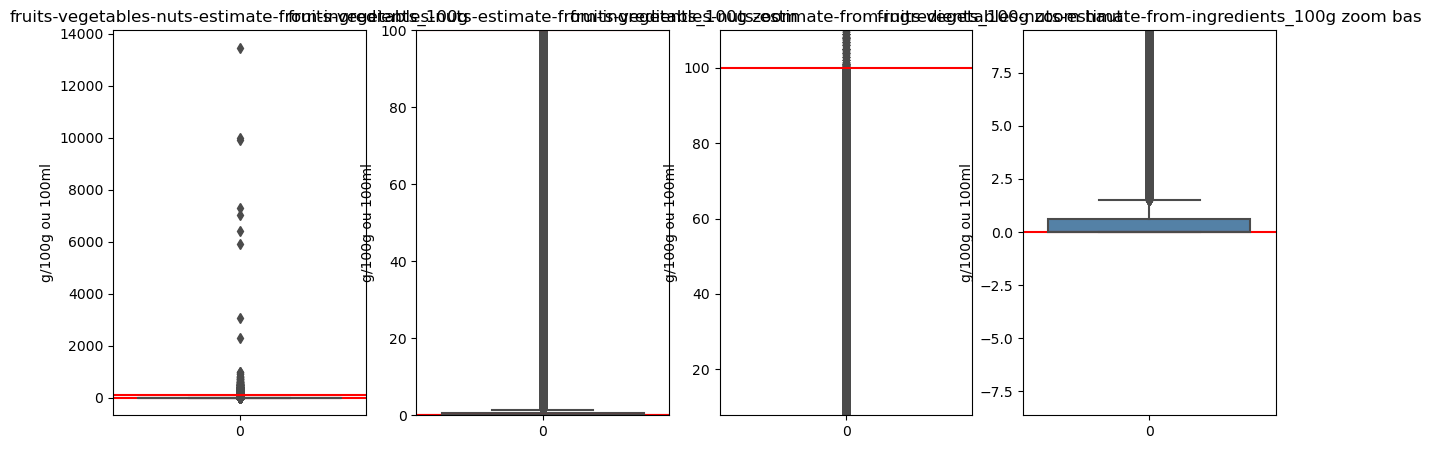

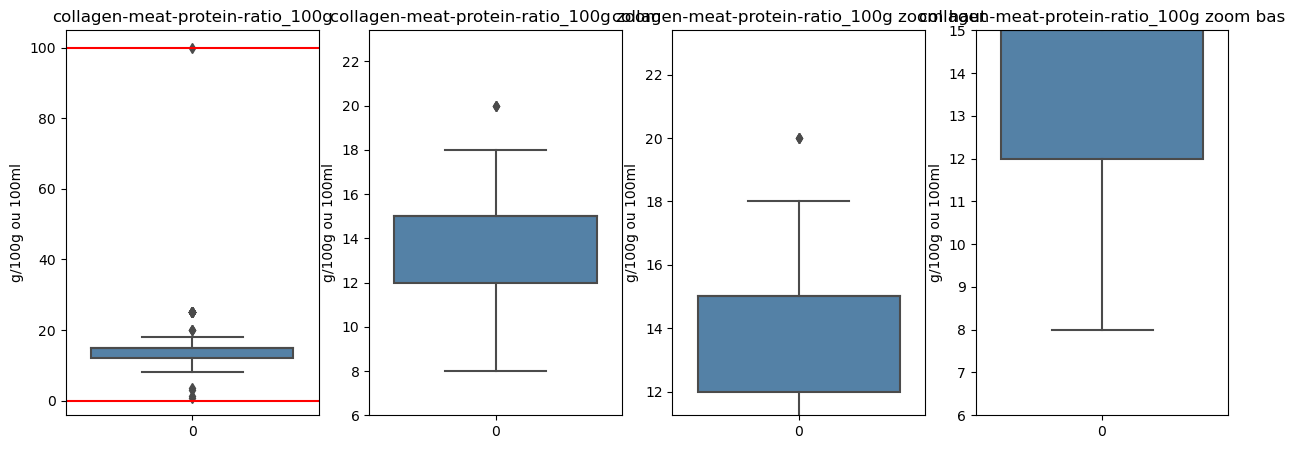

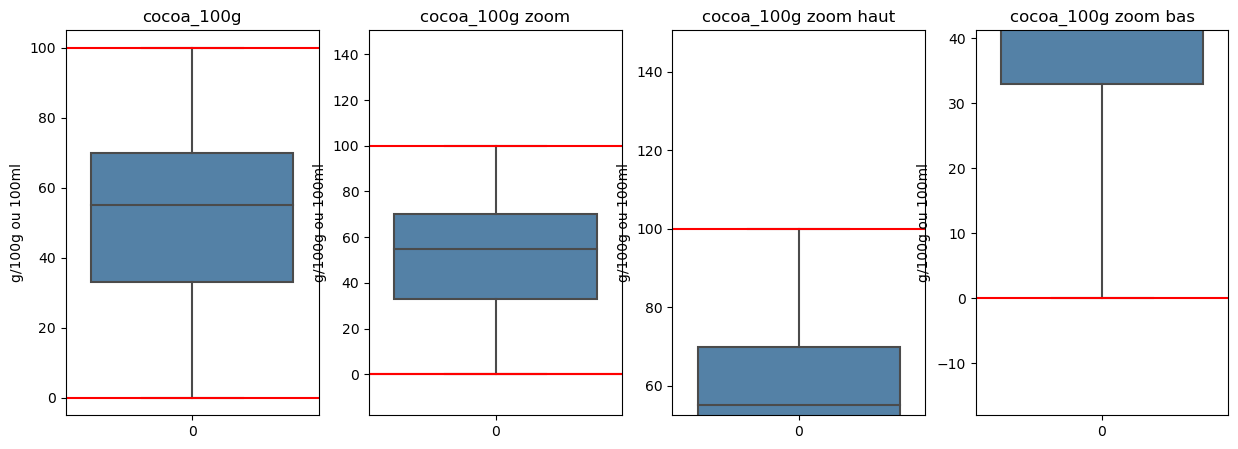

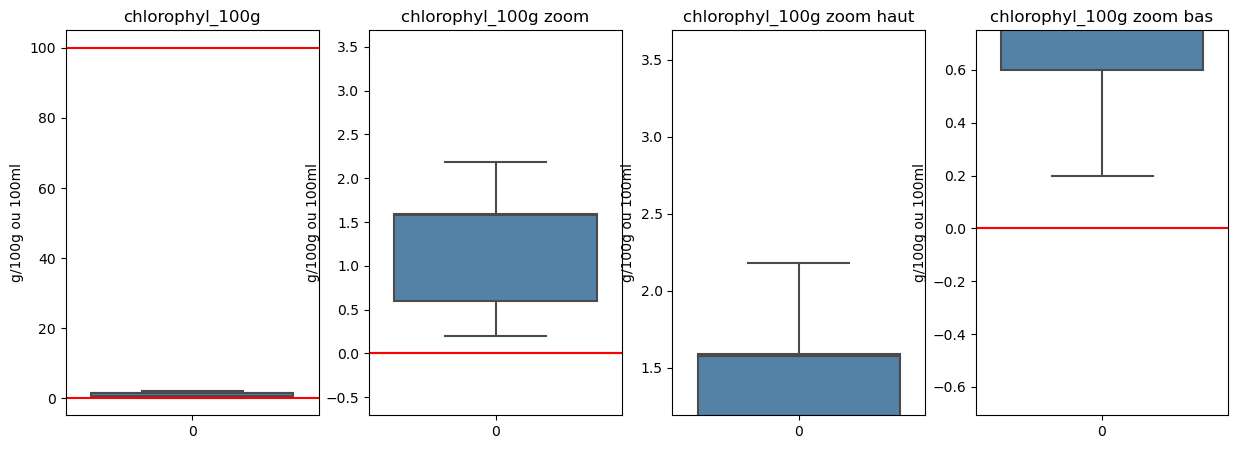

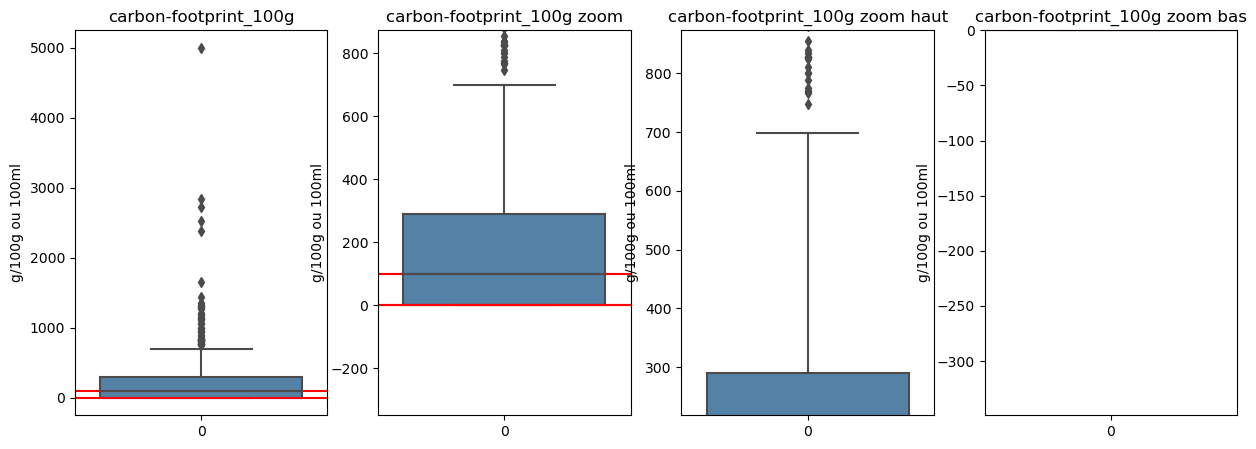

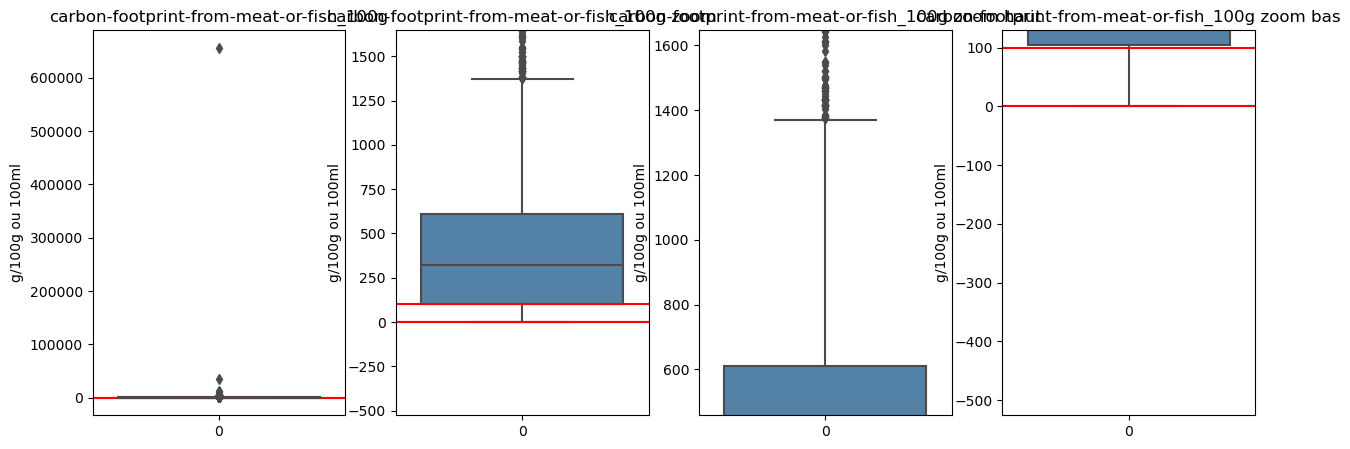

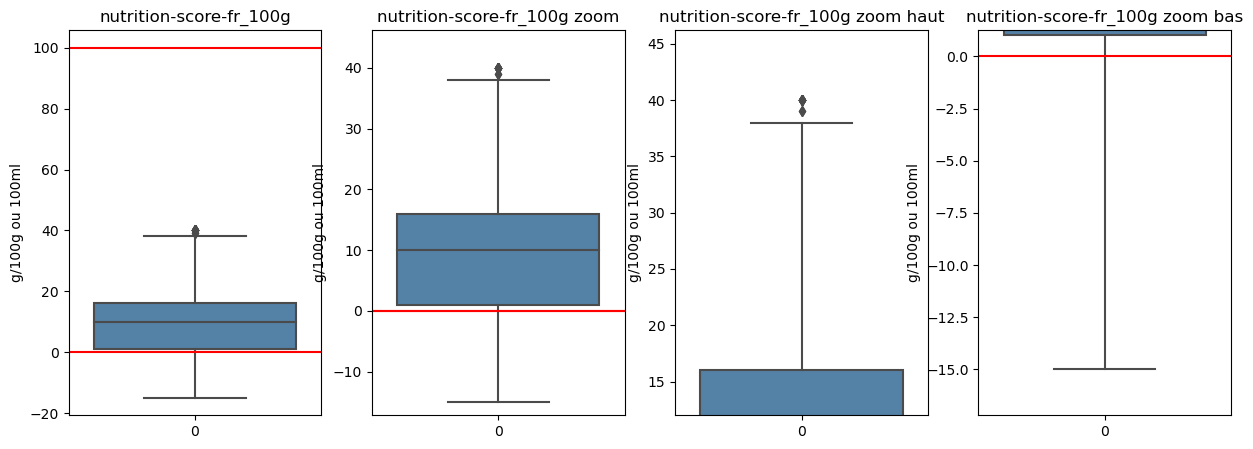

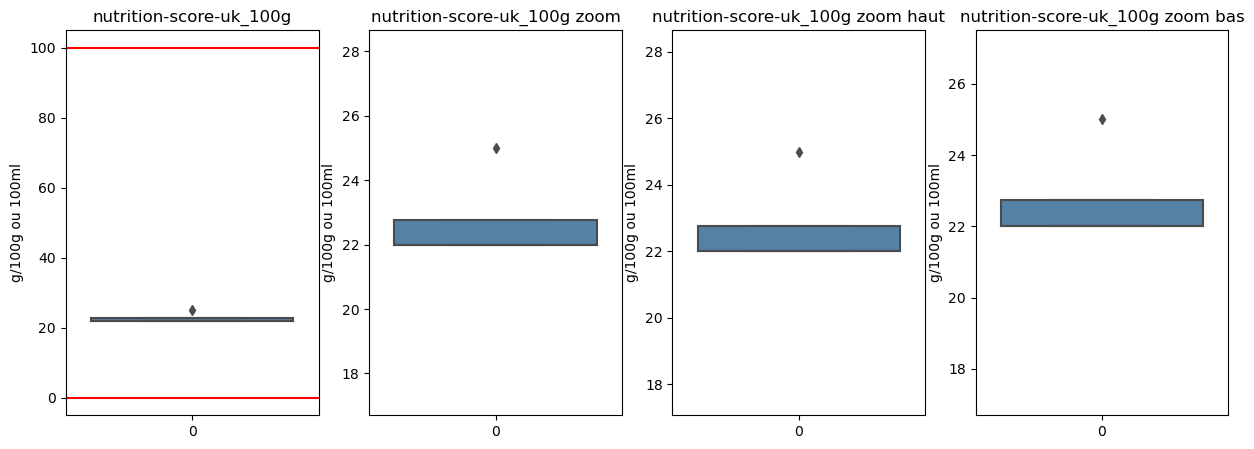

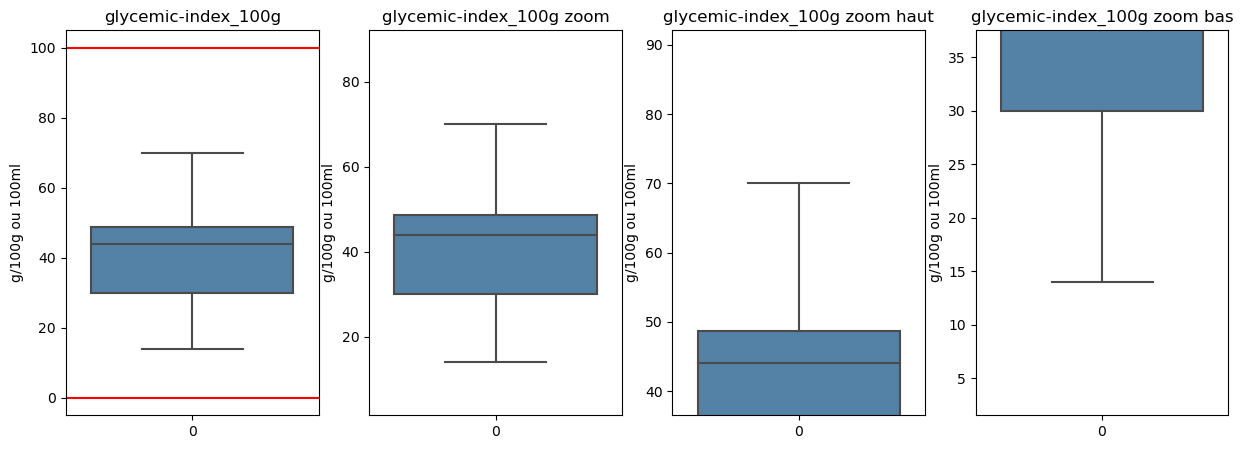

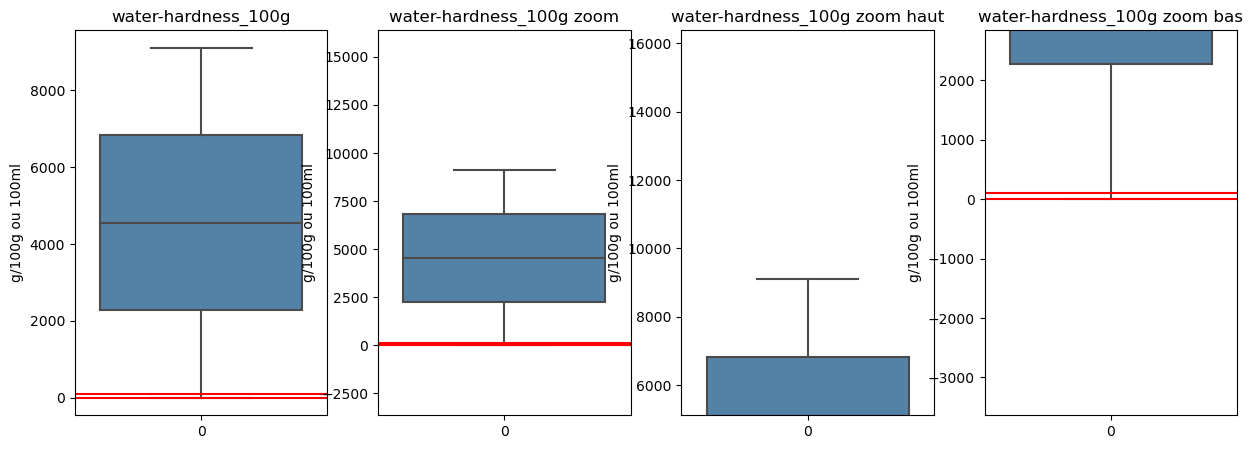

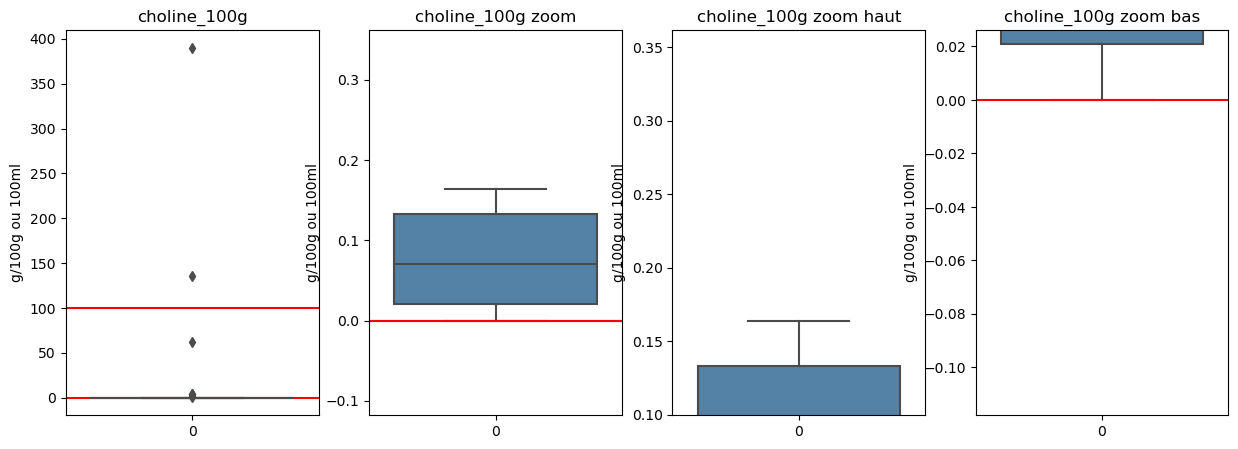

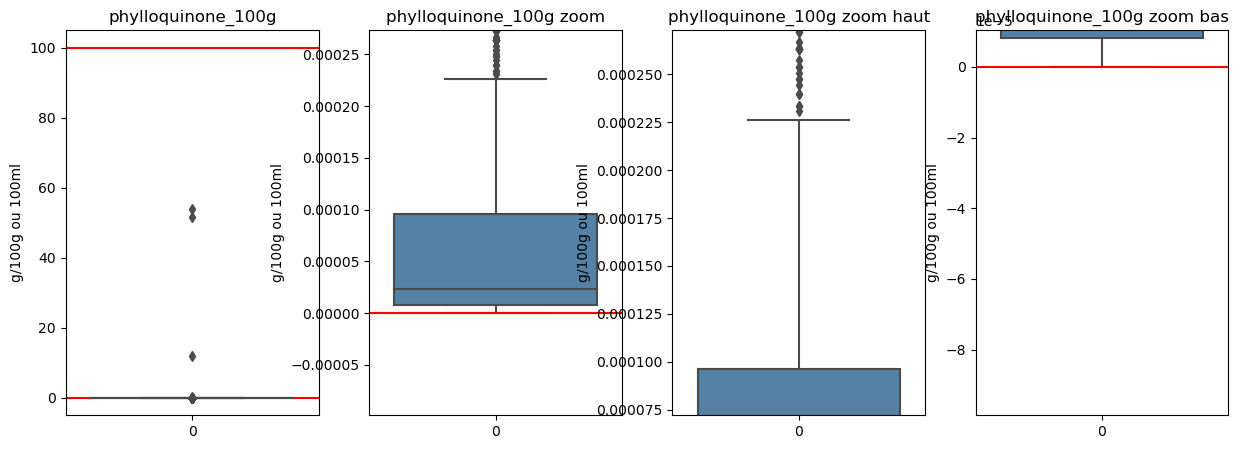

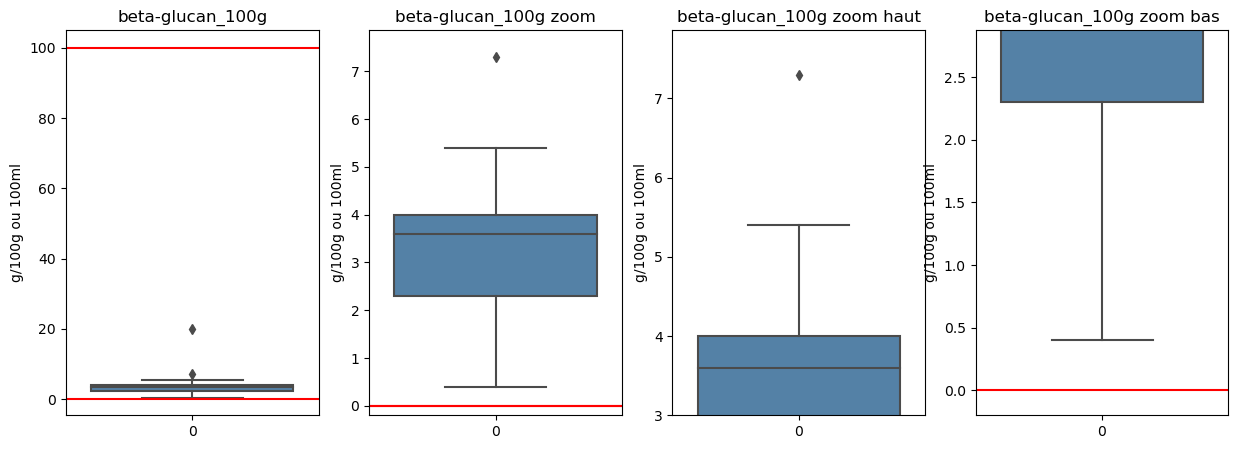

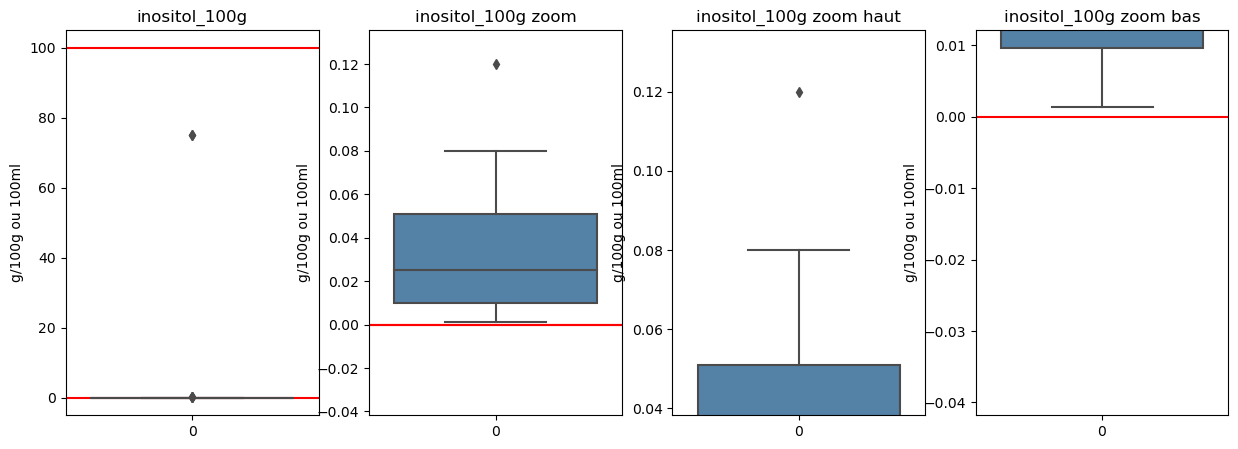

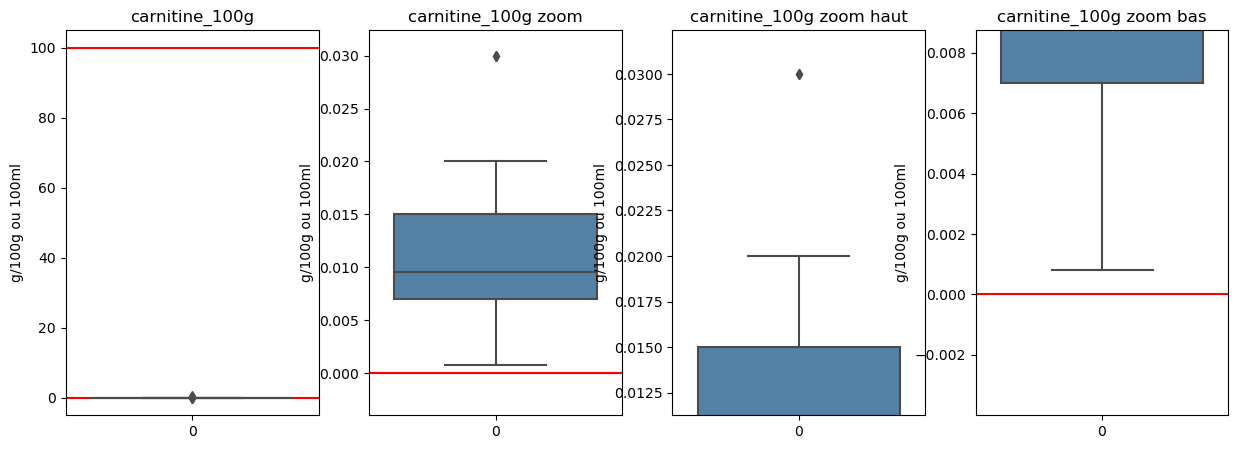

In [135]:
#Boite à chat des variables quantitatives en g
for nom_colonne in (nom_colonne_avec_100g_sans_energy):
    colonne_dataframe = df_raw[nom_colonne]
    outils.plot_boxplot(df_raw,nom_colonne,nom_colonne,'g', 0, 100)

**Conclusion**:

Des valeurs qui dépassent les 100g par portion de 100g. Plutôt que d'utiliser la méthode interquartile, on remplace toutes les valeurs au dessus de 100g par des NaN
On remplace toutes les valeurs négatives par des NaN

## Boites à chat des variables energy

http://www.monmenu.fr/s/calcul-des-calories-d-une-recette-pid145
Le calcul des calories d'un aliment est une simple opération arithmétique de multiplications et d'additions basées sur les quantités de nutriments le composant.
Les principaux nutriments apportant des calories sont les proteines(noté P), les glucides(noté G), les lipides(noté L) ainsi que les alcools(noté A)

Les variables utilisées pour calculer sont :

P -> la quantité de proteine en gr pour 100 gr d'aliment
G -> la quantité de Glucide ou carbohydrade en gr pour 100 gr d'aliment
L -> la quantité de Lipide en gr pour 100 gr d'aliment
A -> la quantité de Alcool en gr pour 100 gr d'aliment

Les valeurs énergétique des nutriments composants les aliments sont les suivantes:

1 gr de proteine apporte 4 kcal
1 gr de glucide (carbohydrate) apporte 4 kcal
1 gr de lipide apporte 9 kcal
1 gr d'alcool apporte 7 kcal

Le max pour 100g est de 900kcal/100g, soit 3766kJ/100g

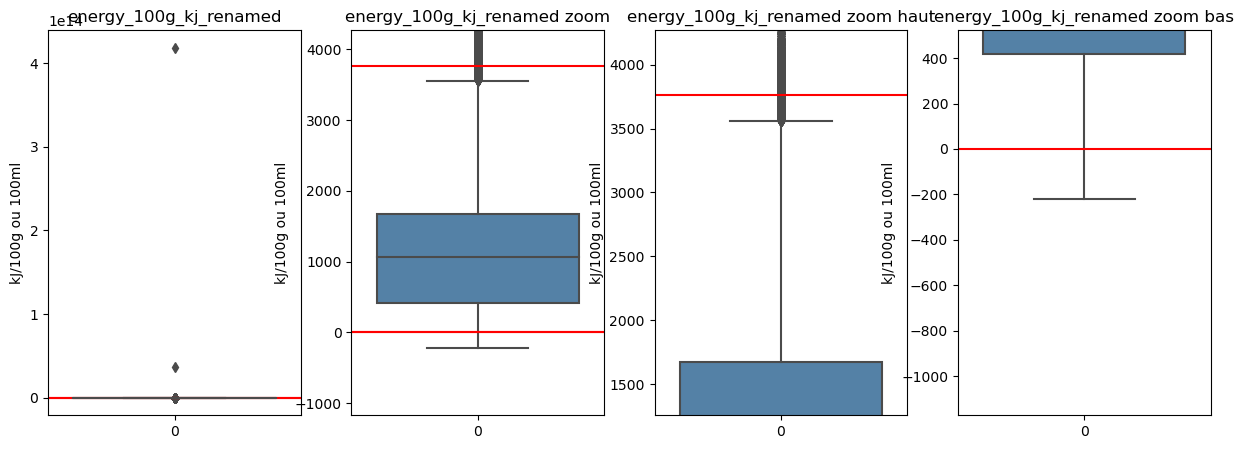

In [136]:
for nom_colonne in (nom_colonne_avec_energy):
    outils.plot_boxplot(df_raw,nom_colonne,nom_colonne,'kJ', 0, 3766)

In [137]:
df_raw['energy_100g_kj_renamed'].describe()

count           2073460.00
mean          219380256.00
std        291661348864.00
min                -221.00
25%                 418.00
50%                1071.00
75%                1674.00
max     418400010502144.00
Name: energy_100g_kj_renamed, dtype: float64

**Conclusion**:

Des valeurs qui dépassent les 3766kJ par portion de 100g. Plutôt que d'utiliser la méthode interquartile, on remplace toutes les valeurs au dessus de 3766 par des NaN
Des valeurs négatives, à remplacer par des NaN

# Nettoyage des données

## Valeurs aberrantes sur les données nutritionnelles

In [138]:
# Les valeurs de plus de 100g ou négatives sont remplacées par des NaN
for nom_colonne in (nom_colonne_avec_100g_sans_energy):
    df_raw[nom_colonne] = [np.nan if (val > 100 or val <0) else val for val in df_raw[nom_colonne]]

In [139]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'correction des valeurs aberrantes sur les info nutri hors energy')

Le dataframe contient 2610883 lignes et 107 colonnes et utilise 5.0000 GB de mémoire


## Valeurs aberrantes sur les données du contenu énergétiques

In [140]:
# Valeurs au dessus de 3766kJ ou négatives => NaN
for nom_colonne in (nom_colonne_avec_energy):
    df_raw[nom_colonne] = [np.nan if (val > 3766 or val <0) else val for val in df_raw[nom_colonne]]
    

In [141]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'correction des valeurs aberrantes sur les info contenu energétique')

Le dataframe contient 2610883 lignes et 107 colonnes et utilise 5.0000 GB de mémoire


## Valeurs aberrantes sur les carbohydrates

In [142]:
# le taux de carbohydrates doit être supérieur au taux de sucre pour 100g
df_raw.drop(df_raw[df_raw['carbohydrates_100g'] < df_raw['sugars_100g']].index, inplace = True)

In [143]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'correction des valeurs aberrantes sur les carbohydrates')

Le dataframe contient 2607425 lignes et 107 colonnes et utilise 5.0000 GB de mémoire


## Valeurs aberrantes sur les gras saturés

In [144]:
# le taux de gras saturé doit être inférieur au taux de gras pour 100g
df_raw.drop(df_raw[df_raw['fat_100g'] < df_raw['saturated-fat_100g']].index, inplace = True)

In [145]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'correction des valeurs aberrantes sur les gras saturés')

Le dataframe contient 2606051 lignes et 107 colonnes et utilise 5.0000 GB de mémoire


## Valeurs aberrantes sur le sodium

In [146]:
df_raw.drop(df_raw[df_raw['sodium_100g'] > df_raw['salt_100g'] *2.5*95.0/100].index, inplace = True)

In [147]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'correction des valeurs aberrantes sur le sodium')

Le dataframe contient 2606035 lignes et 107 colonnes et utilise 5.0000 GB de mémoire


# Nettoyage Nutriscore

## Information sur le nutriscore

On va vérifier ici que les scores correspondent bien au grade

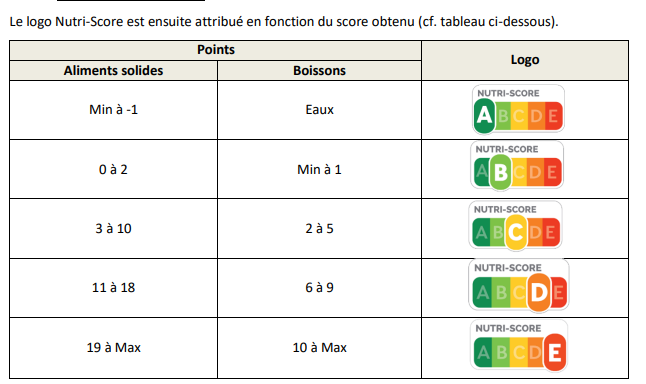

In [148]:
df_nutriscore_info = df_raw[['nutriscore_grade','nutriscore_score','pnns_groups_1','product_name']].copy()
df_nutriscore_info['pnns_groups_1'] = [str(produit).lower() for produit in df_raw['pnns_groups_1']]
df_nutriscore_info.head(10)

nutriscore_grade  nutriscore_score            pnns_groups_1                  product_name
0              NaN               NaN                  unknown                jeunes pousses
1              NaN               NaN                  unknown                         Andrè
2              NaN               NaN                  unknown                       L.casei
3                a             -5.00  milk and dairy products                          Skyr
4              NaN               NaN                  unknown              Vitória crackers
5              NaN               NaN                  unknown                         Cacao
6              NaN               NaN                  unknown     Filetes de pollo empanado
7              NaN               NaN                  unknown             Burger Meat Pollo
8              NaN               NaN                  unknown  Hamburguesas de ternera 100%
9              NaN               NaN                  unknown                     hyde icon

In [149]:
# pnns_group1 donne le type de produit
liste_type_produit = [str(produit) for produit in df_nutriscore_info['pnns_groups_1'].unique()]
liste_type_produit

['unknown',
 'milk and dairy products',
 'fat and sauces',
 'beverages',
 'composite foods',
 'sugary snacks',
 'fruits and vegetables',
 'fish meat eggs',
 'cereals and potatoes',
 'nan',
 'salty snacks',
 'alcoholic beverages',
 'sugary-snacks']

In [150]:
category_beverage = outils.recherche_mot_liste('beverage', liste_type_produit)
print(category_beverage)
df_nutriscore_info['product_category'] = ['beverages' if product in category_beverage else
                                          'unknown' if product == 'unknown' else
                                          'solid food' for product in df_nutriscore_info['pnns_groups_1']]

['beverages', 'alcoholic beverages']


In [151]:
df1 = outils.get_nutriscore_per_category(df_nutriscore_info,'beverages') 
df2 = outils.get_nutriscore_per_category(df_nutriscore_info,'solid food')
df3 = outils.get_nutriscore_per_category(df_nutriscore_info,'unknown')
df1_styler = df1.style.set_table_attributes("style ='display:inline'").set_caption('beverage').format('{:.0f}')
df2_styler = df2.style.set_table_attributes("style ='display:inline'").set_caption('solid food').format('{:.0f}')
df3_styler = df3.style.set_table_attributes("style ='display:inline'").set_caption('unknown').format('{:.0f}')

display_html(df1_styler._repr_html_() +df2_styler._repr_html_() +df3_styler._repr_html_(), raw = True)

beverage 
 
 
   
 A 
 B 
 C 
 D 
 E 
 
 
 
 
 min 
 -9 
 -11 
 2 
 6 
 10 
 
 
 max 
 20 
 2 
 10 
 18 
 40 
 
 
 

 
 solid food 
 
 
   
 A 
 B 
 C 
 D 
 E 
 
 
 
 
 min 
 -15 
 -10 
 2 
 6 
 10 
 
 
 max 
 4 
 2 
 10 
 18 
 40 
 
 
 

 
 unknown 
 
 
   
 A 
 B 
 C 
 D 
 E 
 
 
 
 
 min 
 -14 
 -10 
 2 
 6 
 10 
 
 
 max 
 -1 
 2 
 10 
 18 
 40

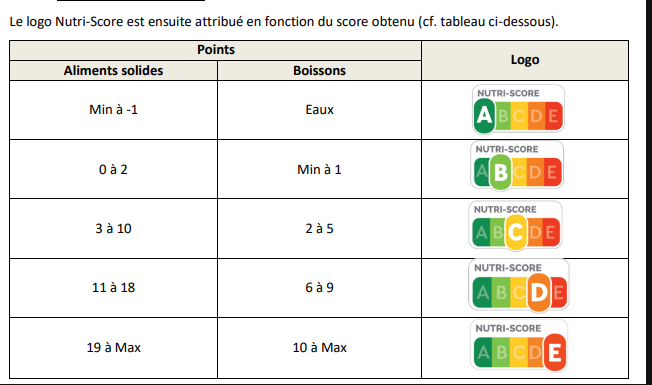

- Pour les boissons, nous avons des valeurs hors limites pour les différents grades, à filtrer donc
- Idem pour les valeurs pour les aliments solides
- Pour les produits inclassables, il se peut que ce soit ou des aliments solides, ou des boissons, et donc les valeurs correspondent bien si on prend le min et le max de chaque catégorie

## Netoyage des valeurs aberrantes

In [152]:
# Filtre sur les aliments solides
#Score grade A
solid_cond1 = (df_nutriscore_info['product_category'] == 'solid food') \
& (df_nutriscore_info['nutriscore_grade'] == 'a') \
& (df_nutriscore_info['nutriscore_score'] > -1)

#Score grade B
solid_cond2 = (df_nutriscore_info['product_category'] == 'solid food')\
& (df_nutriscore_info['nutriscore_grade'] == 'b')\
& (df_nutriscore_info['nutriscore_score'] < 0) 

#Score grade C
solid_cond3 = (df_nutriscore_info['product_category'] == 'solid food')\
& (df_nutriscore_info['nutriscore_grade'] == 'c')\
& ((df_nutriscore_info['nutriscore_score'] > 10) | (df_nutriscore_info['nutriscore_score'] < 3)) 

#Score grade D
solid_cond4 = (df_nutriscore_info['product_category'] == 'solid food')\
& (df_nutriscore_info['nutriscore_grade'] == 'd')\
& ((df_nutriscore_info['nutriscore_score'] > 18) | (df_nutriscore_info['nutriscore_score'] < 11)) 

#Score grade E
solid_cond5 = (df_nutriscore_info['product_category'] == 'solid food')\
& (df_nutriscore_info['nutriscore_grade'] == 'e')\
& (df_nutriscore_info['nutriscore_score'] <19) 

# Filtre sur les aliments liquides
#Score grade B
liquid_cond1 = (df_nutriscore_info['product_category'] == 'beverages') \
& (df_nutriscore_info['nutriscore_grade'] == 'b') \
& (df_nutriscore_info['nutriscore_score'] > 1)
#Score grade C
liquid_cond2 = (df_nutriscore_info['product_category'] == 'beverages') \
& (df_nutriscore_info['nutriscore_grade'] == 'c') \
& ((df_nutriscore_info['nutriscore_score'] < 2) | (df_nutriscore_info['nutriscore_score'] > 5))
#Score grade D
liquid_cond3 = (df_nutriscore_info['product_category'] == 'beverages') \
& (df_nutriscore_info['nutriscore_grade'] == 'd') \
& ((df_nutriscore_info['nutriscore_score'] < 6) | (df_nutriscore_info['nutriscore_score'] > 9))
#Score grade E
liquid_cond4 = (df_nutriscore_info['product_category'] == 'beverages') \
& (df_nutriscore_info['nutriscore_grade'] == 'e') \
& (df_nutriscore_info['nutriscore_score'] < 10)

In [153]:
df_raw.drop(df_raw[solid_cond1 | 
                   solid_cond2 | 
                   solid_cond3 | 
                   solid_cond4 |
                   solid_cond5 | 
                   liquid_cond1 | 
                   liquid_cond2 | 
                   liquid_cond3 | 
                   liquid_cond4].index, inplace = True) 

In [154]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'correction des valeurs aberrantes sur le nutriscore')

Le dataframe contient 2603924 lignes et 107 colonnes et utilise 5.0000 GB de mémoire


## Colonnes redondantes nutriscore

In [155]:
nom_colonne_dataframe = list(df_raw.keys())
mot_a_trouver = 'nutri'
nom_colonne_contenant_nutri = outils.recherche_mot_liste(mot_a_trouver,nom_colonne_dataframe)
outils.comparaison_colonnes(df_raw,{mot_a_trouver:nom_colonne_contenant_nutri},mot_a_trouver)

nutriscore_score nutriscore_grade  \
3              -5.00                a   
10             18.00                d   
18              9.00                d   
20              1.00                b   
29             14.00                d   
40             -2.00                a   
44              1.00                b   
71             14.00                d   
73              4.00                c   
74              0.00                b   

                                                                                                        nutrient_levels_tags  \
3                  en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity   
10     en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-high-quantity,en:salt-in-high-quantity   
18                en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity   
20            en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity   
29              en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity   
40                en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity   
44            en:fat-in-moderate-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity   
71          en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity   
73  en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity   
74       en:fat-in-moderate-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity   

    nutrition-score-fr_100g  nutrition-score-uk_100g  
3                       NaN                      NaN  
10                    18.00                      NaN  
18                     9.00                      NaN  
20                     1.00                      NaN  
29                    14.00                      NaN  
40                      NaN                      NaN  
44                     1.00                      NaN  
71                    14.00                      NaN  
73                     4.00                      NaN  
74                     0.00                      NaN

There is 9754175 missing (NaN) values over 13019620 values, ie 74.92%
----------------------------------------------------------------------------------
Données manquantes par critères


In [156]:
outils.supprime_colonnes(df_raw, ['nutrition-score-fr_100g','nutrition-score-uk_100g'])

In [157]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des colonnes redondantes sur le nutriscore')

Le dataframe contient 2603924 lignes et 105 colonnes et utilise 5.0000 GB de mémoire


# Nettoyage Nova Group

In [158]:
nova_columns = outils.recherche_mot_liste('nova', list(df_raw.keys()))
nova_columns

['nova_group']

In [159]:
display(df_raw['nova_group'].unique())

array([nan,  4.,  3.,  2.,  1.], dtype=float32)

- Aucune valeur aberrante

# Nettoyage EcoScore

In [160]:
#Dataframe avec uniquement les informations ecoscore en lettre et en note
df_ecoscore_info = df_raw[['ecoscore_score','ecoscore_grade']].copy()
df_ecoscore_info.head(5)

ecoscore_score ecoscore_grade
0             NaN        unknown
1             NaN        unknown
2             NaN        unknown
3           34.00              d
4             NaN        unknown

In [161]:
# On crée une liste ordonnée avec les notes ecoscores
ecoscore_grade_liste = list(df_ecoscore_info['ecoscore_grade'].unique())
ecoscore_grade_liste = [item for item in ecoscore_grade_liste if ((str(item) != 'nan') & (str(item) != 'not-applicable')  & (str(item) != 'unknown'))]

ecoscore_grade_liste.sort()
print(ecoscore_grade_liste)

['a', 'b', 'c', 'd', 'e']


In [162]:
temp = df_ecoscore_info.groupby(['ecoscore_grade'])['ecoscore_score']
df_ecoscore = pd.DataFrame([temp.get_group(n).values for n in ecoscore_grade_liste], index = ecoscore_grade_liste).T
df_ecoscore.head(5)

a     b     c     d     e
0 92.00 78.00 55.00 34.00  5.00
1 94.00 76.00 50.00 24.00  4.00
2 88.00 69.00 44.00 29.00  4.00
3 99.00 65.00 50.00 24.00 19.00
4 99.00 74.00 52.00 34.00 18.00

In [163]:
#Création du dataframe contenant les intervalles de note pour chaque grade
ecoscore_etiquette =[]
for column in ecoscore_grade_liste:
    etiquette = [df_ecoscore[column].min(),df_ecoscore[column].max()]
    ecoscore_etiquette.append(etiquette)
    
ecoscore_etiquette = pd.DataFrame(ecoscore_etiquette, index = ecoscore_grade_liste).T
ecoscore_etiquette.index = ['min','max']
ecoscore_etiquette

a     b     c     d      e
min  80.00 60.00 40.00 20.00 -30.00
max 125.00 84.00 59.00 39.00  19.00

- En regardant le tableau, pour la note b, il y a des valeurs au dessus de 79. A corriger

In [164]:
cond1 = (df_ecoscore_info['ecoscore_grade'] == 'b') \
& (df_ecoscore_info['ecoscore_score'] > 79)

In [165]:
df_raw.drop(df_raw[cond1].index, inplace = True) 

In [166]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'correction des valeurs aberrantes sur l\'écoscore')

Le dataframe contient 2603923 lignes et 105 colonnes et utilise 5.0000 GB de mémoire


# Doublons

In [167]:
# Les codes sont l'identifiant unique des produits, on vérifie si il y a des doublons
liste_code_duplicate = list(df_raw.loc[df_raw.duplicated(subset=['code'], keep = False)]['code'].unique())
liste_code_duplicate
index_a_supprimer =[]
for code in liste_code_duplicate:
    df_overview = df_raw.loc[df_raw['code'] == code][['code','product_name','completeness']]
    index_a_supprimer.append(df_overview.loc[df_overview['completeness'] == df_overview['completeness'].min()].index.values[0])
    
index_a_supprimer    

[273331,
 455741,
 930549,
 961108,
 973700,
 975184,
 996010,
 1018905,
 1217469,
 1248649,
 1264435,
 1321214,
 1324161,
 1423319,
 1686138,
 1913297,
 1926575,
 1937733,
 2084694,
 2124408,
 2127536,
 2167262,
 2209490,
 2308277,
 2398756,
 2416188,
 2519793,
 2565158]

In [168]:
df_raw.drop(index_a_supprimer, axis = 0, inplace = True)

In [169]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'suppression des doublons')

Le dataframe contient 2603895 lignes et 105 colonnes et utilise 5.0000 GB de mémoire


# Imputation

## Imputation par zéro

On va considérer que les variables de quantité pour 100g non renseignées valent zéro

In [170]:
nom_colonne_dataframe = list(df_raw.keys())
mot_a_trouver = '_100g'
nom_colonne_contenant_100g = outils.recherche_mot_liste(mot_a_trouver,nom_colonne_dataframe)
nom_colonne_contenant_100g.remove('energy_100g_kj_renamed')
nom_colonne_contenant_100g

['fat_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'omega-6-fat_100g',
 'omega-9-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 'soluble-fiber_100g',
 'insoluble-fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'biotin_100g',
 'pantothenic-acid_100g',
 'silica_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chloride_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'fluoride_100g',
 'selenium_100g',
 'chromium_100g

In [171]:
df_raw[nom_colonne_contenant_100g] = df_raw[nom_colonne_contenant_100g].fillna(0)

In [172]:
for colonne in nom_colonne_contenant_100g:
    nom_colonne_dataframe.remove(colonne)

In [173]:
for colonne in nom_colonne_dataframe:
    display(df_raw.loc[df_raw[colonne].notnull()][colonne].head(2))

0         00000000000000225
1    0000000000000207025004
Name: code, dtype: string

0    jeunes pousses
1             Andrè
Name: product_name, dtype: object

3    480 g
5    130 g
Name: quantity, dtype: object

29    Plastic,Tray
70           Glass
Name: packaging_en, dtype: object

0    endives
3     danone
Name: brands_tags, dtype: object

3     Dairies,Desserts,Fermented foods,Fermented milk products,Cheeses,Dairy desserts,Cream cheeses,Skyr
10                                                                  Groceries,Condiments,Sauces,Mustards
Name: categories_en, dtype: object

2       Spain
354    France
Name: origins_en, dtype: string

70     benivay-ollon
176           france
Name: manufacturing_places_tags, dtype: object

10    fr:delois-france
26      Made in France
Name: labels_en, dtype: object

42    47.833333,-0.333333
56    47.883333,-2.766667
Name: first_packaging_code_geo, dtype: string

0     France
1    Germany
Name: countries_en, dtype: object

2    en:semi-skimmed-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,es:leche-desnatada-en-polva,en:lactic-ferments,en:ferment,en:microbi...
9    en:beta-alanine,en:creatine-hcl,en:ancient-peat-and-apple-extract,en:l-leucine,en:l-isoleucine,en:l-valine,en:betaine-anhydrous,en:arginine-silica...
Name: ingredients_tags, dtype: object

2                          en:palm-oil-free,en:non-vegan,en:vegetarian-status-unknown
9    en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown
Name: ingredients_analysis_tags, dtype: object

10            en:mustard
28    en:eggs,en:mustard
Name: allergens, dtype: string

187                                             en:eggs,en:milk
305    en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,en:oatmeal
Name: traces, dtype: string

2   0.00
9   5.00
Name: additives_n, dtype: float32

9                             E296 - Malic acid,E330 - Citric acid,E552 - Calcium silicate,E950 - Acesulfame k,E955 - Sucralose
28    E150 - Caramel,E160a - Carotene,E202 - Potassium sorbate,E316 - Sodium erythorbate,E466 - Sodium carboxy methyl cellulose
Name: additives_en, dtype: object

3    -5.00
10   18.00
Name: nutriscore_score, dtype: float32

3     a
10    d
Name: nutriscore_grade, dtype: object

9    4.00
28   4.00
Name: nova_group, dtype: float32

0    unknown
1    unknown
Name: pnns_groups_1, dtype: object

0    unknown
1    unknown
Name: pnns_groups_2, dtype: object

3     Milk and dairy products,Dairy desserts
10      Fats and sauces,Dressings and sauces
Name: food_groups_en, dtype: object

842    LAGG'S
843    LAGG'S
Name: brand_owner, dtype: string

3    34.00
10   55.00
Name: ecoscore_score, dtype: float32

0    unknown
1    unknown
Name: ecoscore_grade, dtype: object

3                 en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity
10    en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-high-quantity,en:salt-in-high-quantity
Name: nutrient_levels_tags, dtype: object

3   480.00
5   130.00
Name: product_quantity, dtype: float32

28    en:nutrition-value-over-105-fruits-vegetables-nuts-estimate-from-ingredients
58                                             en:nutrition-value-over-3800-energy
Name: data_quality_errors_tags, dtype: object

0   0.20
1   0.26
Name: completeness, dtype: float32

3         Skyr
10    Mustards
Name: main_category_en, dtype: object

1   690.00
3   238.00
Name: energy_100g_kj_renamed, dtype: float64

On considère que l'information sur les additifs est nulle si non renseignée

In [174]:
df_raw['additives_n'] = df_raw['additives_n'].fillna(0)

In [175]:
df_raw.head(5)

code      product_name quantity packaging_en brands_tags  \
0       00000000000000225    jeunes pousses      NaN          NaN     endives   
1  0000000000000207025004             Andrè      NaN          NaN         NaN   
2    00000000000003429145           L.casei      NaN          NaN         NaN   
3    00000000000026772226              Skyr    480 g          NaN      danone   
4           0000000000017  Vitória crackers      NaN          NaN         NaN   

                                                                                        categories_en origins_en manufacturing_places_tags  \
0                                                                                                 NaN       <NA>                       NaN   
1                                                                                                 NaN       <NA>                       NaN   
2                                                                                                 NaN      Spain                       NaN   
3  Dairies,Desserts,Fermented foods,Fermented milk products,Cheeses,Dairy desserts,Cream cheeses,Skyr       <NA>                       NaN   
4                                                                                                 NaN       <NA>                       NaN   

  labels_en first_packaging_code_geo countries_en  \
0       NaN                     <NA>       France   
1       NaN                     <NA>      Germany   
2       NaN                     <NA>        Spain   
3       NaN                     <NA>       France   
4       NaN                     <NA>       France   

                                                                                                                                        ingredients_tags  \
0                                                                                                                                                    NaN   
1                                                                                                                                                    NaN   
2  en:semi-skimmed-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,es:leche-desnatada-en-polva,en:lactic-ferments,en:ferment,en:microbi...   
3                                                                                                                                                    NaN   
4                                                                                                                                                    NaN   

                                    ingredients_analysis_tags allergens traces  additives_n additives_en  nutriscore_score nutriscore_grade  \
0                                                         NaN      <NA>   <NA>         0.00          NaN               NaN              NaN   
1                                                         NaN      <NA>   <NA>         0.00          NaN               NaN              NaN   
2  en:palm-oil-free,en:non-vegan,en:vegetarian-status-unknown      <NA>   <NA>         0.00          NaN               NaN              NaN   
3                                                         NaN      <NA>   <NA>         0.00          NaN             -5.00                a   
4                                                         NaN      <NA>   <NA>         0.00          NaN               NaN              NaN   

   nova_group            pnns_groups_1   pnns_groups_2                          food_groups_en brand_owner  ecoscore_score ecoscore_grade  \
0         NaN                  unknown         unknown                                     NaN        <NA>             NaN        unknown   
1         NaN                  unknown         unknown                                     NaN        <NA>             NaN        unknown   
2         NaN                  unknown         unknown                                     NaN        <NA>             NaN        unknown   
3 

In [176]:
historique = outils.dataframe_historique_dimensions(df_raw, historique_modification_dataframe, 'imputation des variables')

Le dataframe contient 2603895 lignes et 105 colonnes et utilise 5.0000 GB de mémoire


In [177]:

# col_numerics_input = col_numerics.copy()
# col_numerics_input.remove('nutriscore_score')
# col_numerics_input.remove('nova_group')
# col_numerics_input.remove('ecoscore_score')
# import numpy as np
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imp_mean = IterativeImputer(random_state=0)
# imp_mean.fit(df_raw[col_numerics_input])
# IterativeImputer(random_state=0)


# Sauvegarde du dataframe

In [178]:
df_raw.to_pickle('./df_clean.pkl')

In [179]:
df_historique= pd.DataFrame(historique).set_index('version')
df_historique.to_pickle('./df_historique.pkl')

In [180]:
df_historique = pd.read_pickle('./df_historique.pkl')
df_historique['changement'] = df_historique['changement'].astype("string")
df_historique['surface'] = df_historique['variables'] * df_historique['lignes'] 
df_historique['dimensions'] = df_historique['lignes'].astype('string') + ' lignes - ' + df_historique['variables'].astype('string') + ' colonnes'

df_historique


changement  variables   lignes  Mémoire    surface                     dimensions
version                                                                                                                                           
1          correction des valeurs aberrantes sur les info nutri hors energy        107  2610883     5.00  279364481  2610883 lignes - 107 colonnes
2        correction des valeurs aberrantes sur les info contenu energétique        107  2610883     5.00  279364481  2610883 lignes - 107 colonnes
3                   correction des valeurs aberrantes sur les carbohydrates        107  2607425     5.00  278994475  2607425 lignes - 107 colonnes
4                    correction des valeurs aberrantes sur les gras saturés        107  2606051     5.00  278847457  2606051 lignes - 107 colonnes
5                           correction des valeurs aberrantes sur le sodium        107  2606035     5.00  278845745  2606035 lignes - 107 colonnes
6                       correction des valeurs aberrantes sur le nutriscore        107  2603924     5.00  278619868  2603924 lignes - 107 colonnes
7                    suppression des colonnes redondantes sur le nutriscore        105  2603924     5.00  273412020  2603924 lignes - 105 colonnes
8                          correction des valeurs aberrantes sur l'écoscore        105  2603923     5.00  273411915  2603923 lignes - 105 colonnes
9                                                  suppression des doublons        105  2603895     5.00  273408975  2603895 lignes - 105 colonnes
10                                                 imputation des variables        105  2603895     5.00  273408975  2603895 lignes - 105 colonnes
11         correction des valeurs aberrantes sur les info nutri hors energy        107  2610883     5.00  279364481  2610883 lignes - 107 colonnes
12       correction des valeurs aberrantes sur les info contenu energétique        107  2610883     5.00  279364481  2610883 lignes - 107 colonnes
13                  correction des valeurs aberrantes sur les carbohydrates        107  2607425     5.00  278994475  2607425 lignes - 107 colonnes
14                   correction des valeurs aberrantes sur les gras saturés        107  2606051     5.00  278847457  2606051 lignes - 107 colonnes
15                          correction des valeurs aberrantes sur le sodium        107  2606035     5.00  278845745  2606035 lignes - 107 colonnes
16                      correction des valeurs aberrantes sur le nutriscore        107  2603924     5.00  278619868  2603924 lignes - 107 colonnes
17                   suppression des colonnes redondantes sur le nutriscore        105  2603924     5.00  273412020  2603924 lignes - 105 colonnes
18                         correction des valeurs aberrantes sur l'écoscore        105  2603923     5.00  273411915  2603923 lignes - 105 colonnes
19                                                 suppression des doublons        105  2603895     5.00  273408975  2603895 lignes - 105 colonnes
20                                                 imputation des variables        105  2603895     5.00  273408975  2603895 lignes - 105 colonnes

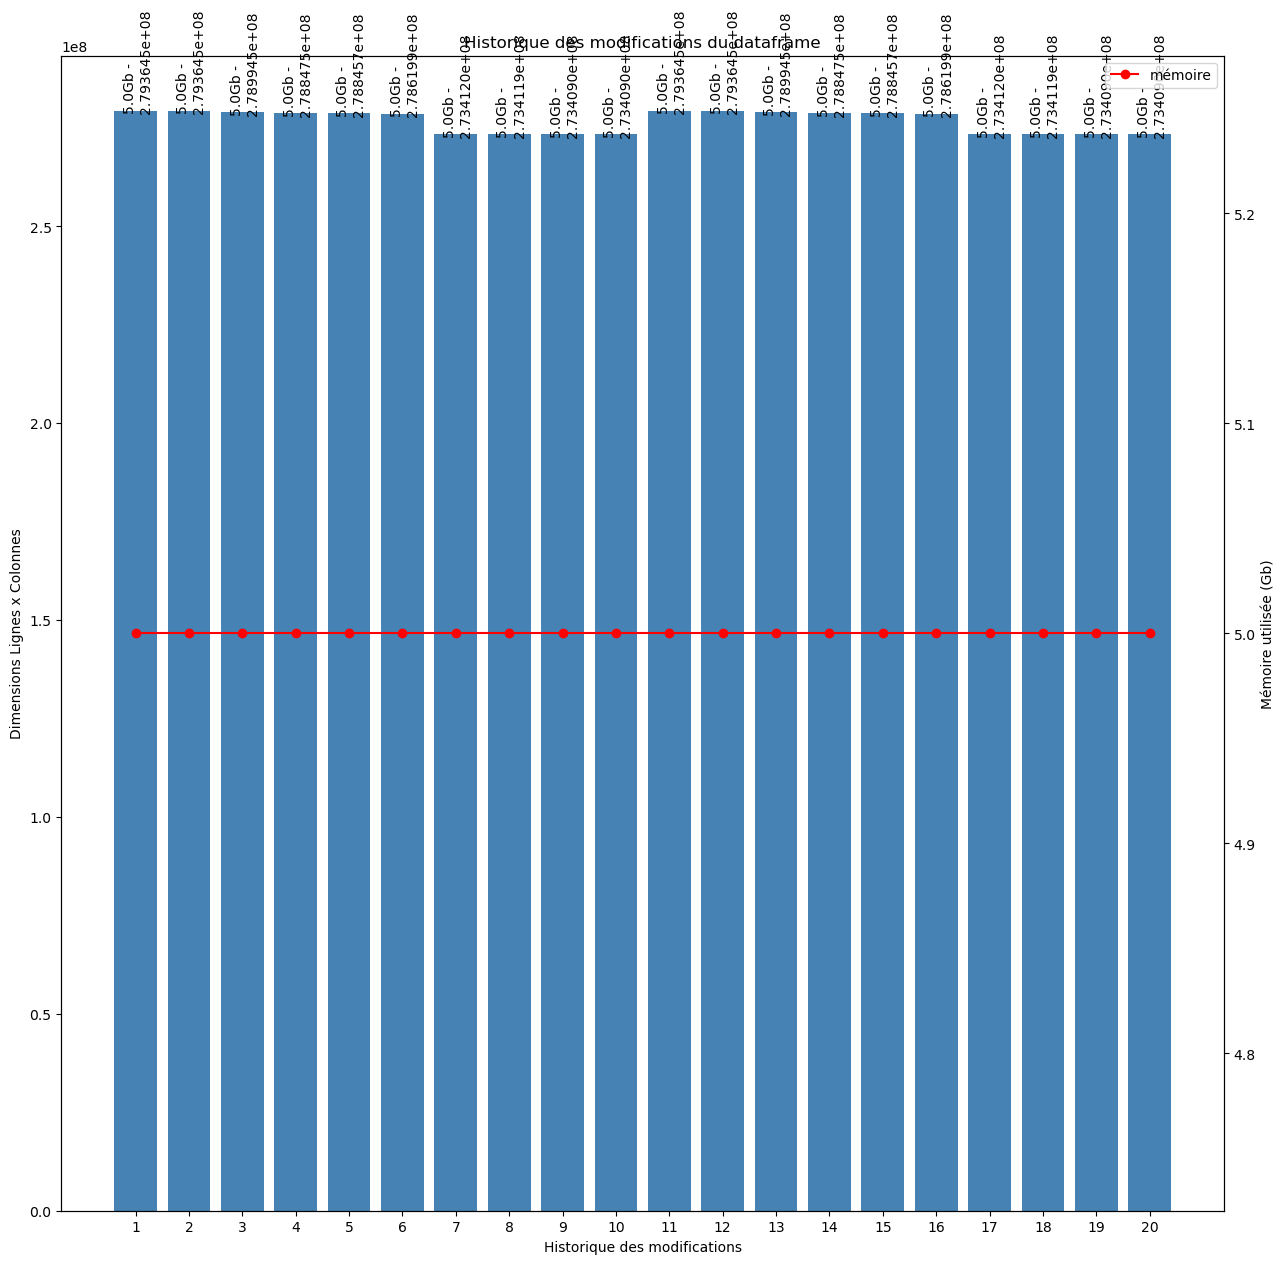

In [181]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# fig, ax = plt.subplots(2,1, figsize=(16,16))

# ax1 = sns.barplot(data=df_historique, x='surface', y='changement', color = 'SteelBlue', ax=ax[0])#, order=df_historique.sort_values('Mémoire').changement)
# ax1.bar_label(ax1.containers[0], labels= df_historique.dimensions, rotation=0, label_type='center')
# ax1.set_xlabel('Dimensions = lignes x colonnes')
# ax1.tick_params(rotation=0, size=5)
# plt.savefig('historique_dimensions.png', dpi=100)
# #ax2 = ax1.twinx()
# ax2 = sns.barplot(data = df_historique, x='Mémoire', y='changement', color = 'SteelBlue', ax=ax[1])
# ax2.bar_label(ax2.containers[0], labels= df_historique.Mémoire, rotation=0, label_type='center')
# ax2.set_xlabel('Mémoire utilisée par le dataframe - Gb')
# ax2.tick_params(rotation=0, size=9)
# plt.savefig('historique_mémoire.png', dpi=100)

# plt.show()


plt.figure(figsize=(15, 15))

plt.bar(np.arange(len(df_historique['surface'])) , df_historique['surface'], color='SteelBlue')
ax1 = plt.gca()
ax1.set_xticks(np.arange(0, len(df_historique['surface']), 1))

ax1.set_xticklabels( [changement for changement in df_historique.index], rotation = 0)
ax2 = ax1.twinx()

ax2.plot(np.arange(len(df_historique['Mémoire'])), df_historique['Mémoire'], c='red', marker='o')
ax2.set_ylabel('Mémoire utilisée (Gb)')
ax1.set_xlabel('Historique des modifications')
ax1.set_ylabel('Dimensions Lignes x Colonnes')
for i, p in enumerate(ax1.patches):
    ax1.text(
        p.get_width() /
        5 +
        p.get_x(),
        p.get_height() +
        p.get_y() +
        0.3,
        '{:.1f}'.format(
            df_historique['Mémoire'][i+1]) + 'Gb - \n' + '{:e}'.format(df_historique['surface'][i+1]) ,
        fontsize=10,
        color='k',
    rotation = 90)
plt.title('Historique des modifications du dataframe')
# plt.grid(False)
# plt.show(block=False)
plt.legend(labels = ['mémoire'])
plt.savefig('historique_mémoire.png', dpi=200)

plt.show()

In [182]:
outils.count_missing_values(df_raw, True, False)

There is 47097397 missing (NaN) values over 273408975 values, ie 17.23%
----------------------------------------------------------------------------------
Données manquantes par critères
